# **Cricket Data Chronicles – A deep dive into IPL statistics.**    -



##### **Project Type**    - EDA
##### **Contribution**    - Nikesh singh


# **Project Summary -**

## **IPL Dataset Analysis – Project Summary**

This project focuses on analyzing IPL match data to extract meaningful insights about player performances, team trends, and bowling efficiency across different seasons. The goal is to transform raw data into visual insights that highlight patterns in batting, bowling, and overall team strategies.

### **Project Objectives**
- **Batting Analysis** – Evaluating top run-scorers, strike rates, and batting performance in different phases of the game (powerplay vs. death overs).
- **Bowling Performance** – Analyzing team economy rates to assess bowling efficiency over multiple seasons.
- **Seasonal Team Trends** – Understanding how different teams have performed over the years.

### **Data Cleaning & Processing**
The dataset underwent preprocessing steps such as handling missing values, standardizing player and team names, and ensuring accuracy in match statistics. Duplicate player entries were managed so that each instance was visualized separately for detailed analysis.

### **Key Visualizations & Insights**
- **Strike Rate vs. Total Runs** – Scatter plots revealed the most aggressive batsmen in different game phases.
- **Economy Rates Over Seasons** – Line charts highlighted bowling teams’ ability to control runs across years.
- **Subplots for Team-Wise Bowling Performance** – Separate visualizations provided clearer team comparisons.

### **Challenges & Solutions**
- **Duplicate Entries** – Managed by treating each occurrence separately in visualizations.
- **Team Comparisons** – Used subplots and unique color schemes for better readability.

### **Future Scope**
- **Predictive Modeling** – Using machine learning to forecast player performances.
- **Advanced Statistical Analysis** – Conducting deeper tests to measure consistency and impact.
- **Interactive Dashboards** – Creating dynamic, user-friendly dashboards with Power BI or Tableau.

### **Conclusion**
This project effectively translates IPL data into actionable insights, providing a deeper understanding of team strategies, player impact, and seasonal trends. The analysis benefits cricket enthusiasts, analysts, and strategists by offering data-driven perspectives on IPL performance.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The Indian Premier League (IPL) generates a vast amount of match data every season, including player performances, team statistics, and game dynamics. However, deriving meaningful insights from this raw data remains a challenge due to its volume and complexity. Traditional scorecards and reports provide only basic summaries, making it difficult to assess long-term trends, player efficiency, and team strategies.

This project aims to bridge this gap by conducting a detailed exploratory data analysis (EDA) on IPL match data. The focus is on identifying patterns in batting and bowling performances, evaluating strike rates and economy rates across different seasons, and visualizing key metrics to enhance cricket analytics. By leveraging data visualization techniques, this project provides a structured, data-driven approach to understanding team dynamics, player contributions, and seasonal trends, which can be beneficial for analysts, franchises, and fans.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [565]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore", UserWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Dataset Loading

In [566]:
from google.colab import drive
drive.mount('/content/drive')


# Load Dataset
deliveries_df  = pd.read_csv('/content/drive/MyDrive/almabetter project/deliveries.csv')
match_df  = pd.read_csv('/content/drive/MyDrive/almabetter project/matches (1).csv')
# merging dataset
ipl = deliveries_df.merge(match_df,how='left',left_on='match_id',right_on='id')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [567]:
# Dataset First Look
ipl.head(5)

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  \
0           1     legbyes          0              NaN            NaN     NaN   
1           0         NaN          0              NaN            NaN     NaN   
2           1       wides          0              NaN            NaN     NaN   
3           0         NaN          0              NaN            NaN     NaN   
4           0         NaN          0              NaN            NaN     NaN   

       id   season       city        date match_type player_of_match  \
0  335982  2007/08  Bangalore  2008-04-18     League     BB McCullum   
1  335982  2007/08  Bangalore  2008-04-18     League     BB McCullum   
2  335982  2007/08  Bangalore  2008-04-18     League     BB McCullum   
3  335982  2007/08  Bangalore  2008-04-18     League     BB McCullum   
4  335982  2007/08  Bangalore  2008-04-18     League     BB McCullum   

                   venue                        team1                  team2  \
0  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
1  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
2  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
3  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
4  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
2  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
3  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
4  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   

   result_margin  target_runs  target_overs super_over method    umpire1  \
0          140.0        223.0          20.0          N    NaN  Asad Rauf   
1          140.0        223.0          20.0          N    NaN  Asad Rauf   
2          140.0        223.0          20.0          N    NaN  Asad Rauf   
3          140.0        223.0          20.0          N    NaN  Asad Rauf   
4          140.0        223.0          20.0          N    NaN  Asad Rauf   

       umpire2  
0  RE Koertzen  
1  RE Koertzen  
2  RE Koertzen  
3  RE Koertzen  
4  RE Koertzen

In [568]:
# Dataset First Look

# ipl.groupby('season')['match_id'].nunique().to_frame().T


# ipl.pivot_table(index='season',columns='winner',aggfunc='size',fill_value=0,values='nunique')
# ipl.pivot_table(index='season', columns='winner', aggfunc={'winner': 'nunique'}, fill_value=0)


### Dataset Rows & Columns count

In [569]:
# Dataset Rows & Columns count
ipl.shape

(260920, 37)

### Dataset Information

In [570]:
# Dataset Info
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

#### Duplicate Values

In [571]:
# Dataset Duplicate Value Count
ipl.duplicated().sum()

np.int64(0)

In [572]:
# ipl.T.duplicated().sum()

#### Missing Values/Null Values

In [573]:
# Missing Values/Null Values Count
ipl.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
id                       0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
dtype: int64

<Axes: >

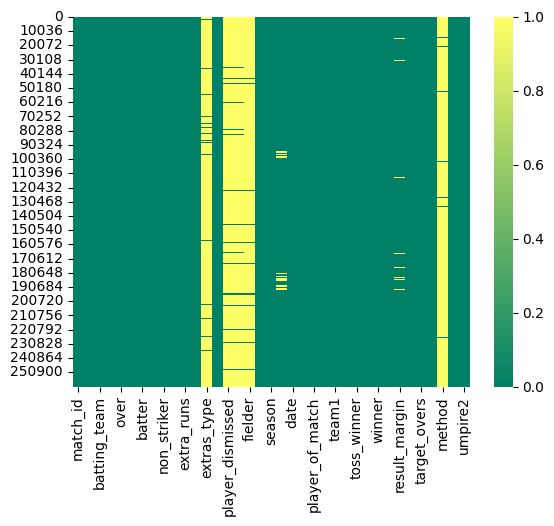

In [574]:
# Visualizing the missing values
sns.heatmap(ipl.isnull(), cmap="summer") #cbar=False, yticklabels=False)

### What did you know about your dataset?


extras_type - 246,795 missing values (Likely missing when no extras are given in a ball)

player_dismissed - 247,970 missing values (Expected since most balls don't result in a dismissal)

dismissal_kind - 247,970 missing values (Missing for non-wicket deliveries)

fielder - 251,566 missing values (Likely missing when no fielder is involved in the play)

city - 12,397 missing values (Could be due to missing data or neutral venues)

player_of_match - 490 missing values (May be missing for abandoned or incomplete matches)

winner - 490 missing values (Likely missing for matches without a winner, such as no result)

result_margin - 4,124 missing values (Could be missing for matches that ended in a tie or no result)

target_runs - 309 missing values (Likely missing for first innings matches)

target_overs - 309 missing values (Likely missing for first innings matches)

method - 257,274 missing values (Likely missing when no DLS method was applied)

All other columns have 0 missing values.

## ***2. Understanding Your Variables***

In [575]:
# Dataset Columns
ipl.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date',
       'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'method', 'umpire1',
       'umpire2'],
      dtype='object')

In [576]:
# column data types
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [577]:
# Dataset Describe
ipl.describe()

match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  \
count  260920.000000  260920.000000  260920.000000  260920.000000   
mean        1.265001       0.067806       1.332807       0.049632   
std         1.639298       0.343265       1.626416       0.217184   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         6.000000       7.000000       7.000000       1.000000   

                 id  result_margin    target_runs   target_overs  
count  2.609200e+05  256796.000000  260611.000000  260611.000000  
mean   9.070665e+05      17.279451     167.290406      19.846742  
std    3.679913e+05      21.600307      32.165944       1.224266  
min    3.359820e+05       1.000000      43.000000       5.000000  
25%    5.483340e+05       6.000000     148.000000      20.000000  
50%    9.809670e+05       8.000000     167.000000      20.000000  
75%    1.254066e+06      20.000000     188.000000      20.000000  
max    1.426312e+06     146.000000     288.000000      20.000000

### Variables Description

match_id – Unique identifier for each match.

inning – Inning number (1st or 2nd).

batting_team – Name of the team currently batting.

bowling_team – Name of the team currently bowling.

over – The over number in the match (1-20 in T20 cricket).

ball – Ball number within the over (1-6, or more if extra balls are bowled).

batter – Name of the batsman facing the delivery.

bowler – Name of the bowler delivering the ball.

non_striker – Name of the non-striker batsman.

batsman_runs – Runs scored by the batsman from this delivery.

extra_runs – Additional runs awarded due to extras (wide, no-ball, byes, leg-byes).

total_runs – Total runs scored from the delivery (batsman runs + extras).

extras_type – Type of extra run given (wide, no-ball, etc.).

is_wicket – Indicates if a wicket fell on this ball (1 if wicket, 0 otherwise).

player_dismissed – Name of the dismissed player (if a wicket fell).

dismissal_kind – Mode of dismissal (bowled, caught, LBW, run-out, etc.).

fielder – Name of the fielder involved in the dismissal (if applicable).

season – Year in which the match took place.

city – City where the match was played.

date – Date of the match.

match_type – Format of the match (e.g., T20).

player_of_match – Player awarded "Man of the Match".

venue – Name of the stadium where the match was played.

team1 – Name of the first team in the match.

team2 – Name of the second team in the match.

toss_winner – Team that won the toss.

toss_decision – Decision made by the toss winner (batting or bowling).

winner – Team that won the match.

result – Outcome of the match (win, tie, no result).

result_margin – Margin of victory (runs or wickets).

target_runs – Target runs for the chasing team (in 2nd innings).

target_overs – Target overs (if the match was shortened).

super_over – Indicates if a Super Over was played (1 if yes, 0 otherwise).

method – Method used to determine result (e.g., DLS method in rain-affected matches).

umpire1 – Name of the first on-field umpire.

umpire2 – Name of the second on-field umpire.Answer Here

### **Summary of Data Types in the Dataset**  

The dataset consists of **37 columns** with the following data types:  

## **1. Integer Columns (int64) [9 Columns]**  
These columns contain numerical values without decimals, primarily related to match structure and runs:  
- match_id, inning , over, ball, batsman_runs, extra_runs, total_runs, is_wicket, id`  

## **2. Float Columns (float64) [3 Columns]**  
These columns contain numerical values with decimals, likely related to match results and targets:  
- result_margin, target_runs, target_overs  

## **3. Categorical (Object) Columns [25 Columns]**  
These columns contain textual or categorical information about teams, players, matches, and locations:  

### **Teams & Players:**  
- batting_team, bowling_team, batter, bowler, non_striker, `player_dismissed`, fielder, player_of_match, winner  

### **Match Details:**  
- season, city, date, match_type, venue, team1, team2, toss_winner, toss_decision, result, super_over, method, umpire1, umpire2  

### **Extras & Dismissals:**  
- extras_type, dismissal_kind  

---


## 3. ***Data Wrangling***

### Data Wrangling Code

In [578]:
# Convert the 'date' column to datetime format for easier analysis
ipl['date'] = pd.to_datetime(ipl['date'])

# Dictionary to standardize team names, ensuring consistency across records
replacement1 = {
    "Mumbai Indians": "Mumbai Indians",
    "Chennai Super Kings": "Chennai Super Kings",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
    "Royal Challengers Bengaluru": "Royal Challengers Bangalore",  # Standardizing name variations
    "Rajasthan Royals": "Rajasthan Royals",
    "Kings XI Punjab": "Kings XI Punjab",
    "Punjab Kings": "Kings XI Punjab",  # Unifying old and new team names
    "Sunrisers Hyderabad": "Sunrisers Hyderabad",
    "Deccan Chargers": "Sunrisers Hyderabad",  # Deccan Chargers rebranded as Sunrisers Hyderabad
    "Delhi Capitals": "Delhi Capitals",
    "Delhi Daredevils": "Delhi Capitals",  # Standardizing Delhi team name
    "Gujarat Titans": "Gujarat Titans",
    "Gujarat Lions": "Gujarat Titans",  # Merging Gujarat teams
    "Lucknow Super Giants": "Lucknow Super Giants",
    "Pune Warriors": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",  # Standardizing Pune team names
    "Rising Pune Supergiants": "Pune Warriors",
    "Kochi Tuskers Kerala": "Kochi Tuskers Kerala"
}

# Dictionary to standardize venue names, ensuring consistency in location data
replacements = {
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi',  # Former name of Arun Jaitley Stadium
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Eden Gardens': 'Eden Gardens, Kolkata',
    'Himachal Pradesh Cricket Association Stadium':
        'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',  # Handling different spellings
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',  # Renamed stadium
    'Punjab Cricket Association IS Bindra Stadium':
        'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Punjab Cricket Association IS Bindra Stadium, Mohali':
        'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Punjab Cricket Association Stadium, Mohali':
        'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai'
}

# Replace venue names with standardized names
ipl['venue'].replace(replacements, inplace=True)

# Standardizing team names in different columns to maintain consistency
ipl['team1'].replace(replacement1, inplace=True)
ipl['team2'].replace(replacement1, inplace=True)
ipl['toss_winner'].replace(replacement1, inplace=True)
ipl['batting_team'].replace(replacement1, inplace=True)
ipl['bowling_team'].replace(replacement1, inplace=True)

# Standardizing season format: Converting multi-year seasons to single year
ipl.replace({'season': {'2007/08': '2008', '2009/10': '2010', '2020/21': '2020'}}, inplace=True)
# Convert the 'season' column to integer type
ipl['season'] = ipl['season'].astype(int)


Converted 'date' to datetime format → Enables time-based analysis and sorting.

Standardized team names → Merges variations and old names for consistency.

Standardized venue names → Unifies different spellings and renamed stadiums.

Applied standard names across relevant columns → Ensures uniformity across datasets.

Converted multi-year 'season' values to single year → Simplifies grouping and analysis.

Changed 'season' column data type to integer → Optimizes storage and numerical operations.

## Total Matches in the Dataset

In [579]:
print(f"There are total {ipl['match_id'].nunique()} matches played in entire season")

There are total 1095 matches played in entire season


In [580]:
ipl.groupby(['season'])['match_id'].nunique().reset_index(name='Total_match').T

0     1     2     3     4     5     6     7     8     9     10  \
season       2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018   
Total_match    58    57    60    73    74    76    60    59    60    59    60   

               11    12    13    14    15    16  
season       2019  2020  2021  2022  2023  2024  
Total_match    60    60    60    74    74    71

observation :

Observations on Total Matches per Season
Increase in Matches (2008–2013)

The number of matches grew from 58 in 2008 to 76 in 2013, showing league expansion.

Stable Period (2014–2019)

From 2014 to 2019, matches stayed around 60, meaning the league followed a fixed format.

COVID-19 Effect (2020–2021)

Even during the pandemic, 60 matches were played, showing the league managed well.

More Matches in 2022

Matches increased to 74 in 2022, likely because of new teams joining.

Same Format (2022–2023)

The league kept 74 matches in 2023, meaning no major changes.

Small Drop in 2024

Matches reduced to 71, possibly due to format or scheduling changes.

## venue where all match played from 2008 to 2024

In [581]:
for i in ipl['venue'].unique():
  print(i)

M Chinnaswamy Stadium, Bengaluru
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh
Arun Jaitley Stadium, Delhi
Wankhede Stadium, Mumbai
Eden Gardens, Kolkata
Sawai Mansingh Stadium, Jaipur
Rajiv Gandhi International Stadium, Uppal, Hyderabad
MA Chidambaram Stadium, Chepauk, Chennai
Dr DY Patil Sports Academy, Mumbai
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval
Brabourne Stadium, Mumbai
Narendra Modi Stadium, Ahmedabad
Barabati Stadium
Vidarbha Cricket Association Stadium, Jamtha
Himachal Pradesh Cricket Association Stadium, Dharamsala
Nehru Stadium
Holkar Cricket Stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam
Subrata Roy Sahara Stadium
Maharashtra Cricket Association Stadium, Pune
Shaheed Veer Narayan Singh International Stadium
JSCA International Stadium Complex
Sheikh Zayed Stadium
Sharjah Cricket Stadium
Dubai International Cricket Stadium
Saurashtra Cricket Ass

#### Observations on IPL Venues
Diverse Hosting Locations

IPL matches have been played across India and other countries.

International Matches

In 2009, IPL was hosted in South Africa (e.g., Newlands, Kingsmead).

In 2014, 2020, and 2021, matches were played in the UAE (Sharjah, Dubai, Abu Dhabi).

Most Used Venues

Wankhede (Mumbai), Chinnaswamy (Bengaluru), Eden Gardens (Kolkata), and Chepauk (Chennai) are among the most frequently used stadiums.

Newly Introduced Stadiums

Mullanpur (Maharaja Yadavindra Singh) and Barsapara (Guwahati) are some of the latest venues.

Less Frequent or Temporary Venues

Some stadiums like Green Park (Kanpur) and Nehru Stadium have hosted limited matches.

Alternative Grounds

Dr DY Patil (Mumbai) and Brabourne (Mumbai) have been used when needed.

## Stadium with the highest average total score.

In [582]:


def calculate_venue_run_statistics(ipl,start_year:int=None,end_year:int=None,inning:int=None):

    """
    This function calculates total runs, total matches, and average runs per match for each venue.

    Parameters:
        ipl (pd.DataFrame): The IPL dataset containing 'venue', 'batsman_runs', 'total_runs', and 'match_id' columns.

    Returns:
        pd.DataFrame: A DataFrame with venue-wise total runs, total matches, and average runs per match.
    """
    # Filter out deliveries where no runs were scored
    filter_data = ipl[ipl['batsman_runs'] != 0]
    # filter data based on years

    if start_year is not None:
      filter_data = filter_data[filter_data['season']>= start_year]

    if end_year is not None:
      filter_data = filter_data[filter_data['season'] <= end_year]

    # filter on inning
    if inning in ([1,2]):
      filter_data = filter_data[filter_data['inning']==inning]



    # Calculate total runs per venue
    venue_total_runs = filter_data.groupby('venue')['total_runs'].sum().reset_index()

    # Calculate the number of unique matches played at each venue
    venue_total_match_count = filter_data.groupby('venue')['match_id'].nunique().reset_index()

    # Merge both DataFrames on venue
    venue_total_runs_match = pd.merge(venue_total_runs, venue_total_match_count, on='venue')

    # Rename columns for clarity
    venue_total_runs_match.rename(columns={'match_id': 'total_match'}, inplace=True)

    # Calculate average runs per match at each venue
    venue_total_runs_match['average_runs'] = (venue_total_runs_match['total_runs'] /
                                              venue_total_runs_match['total_match']).round(2)


    return venue_total_runs_match


calculate_venue_run_statistics(ipl,2008,2024,)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi       27697   
1                                    Barabati Stadium        2201   
2                 Barsapara Cricket Stadium, Guwahati         980   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        4076   
4                           Brabourne Stadium, Mumbai        8772   
5                                        Buffalo Park         744   
6                               De Beers Diamond Oval         861   
7                  Dr DY Patil Sports Academy, Mumbai       10717   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...        4328   
9                 Dubai International Cricket Stadium       13778   
10                              Eden Gardens, Kolkata       28216   
11                                         Green Park        1237   
12  Himachal Pradesh Cricket Association Stadium, ...        4182   
13                             Holkar Cricket Stadium        2737   
14                 JSCA International Stadium Complex        1957   
15                                          Kingsmead        4085   
16                   M Chinnaswamy Stadium, Bengaluru       29131   
17           MA Chidambaram Stadium, Chepauk, Chennai       25357   
18  Maharaja Yadavindra Singh International Cricke...        1595   
19      Maharashtra Cricket Association Stadium, Pune       10611   
20                   Narendra Modi Stadium, Ahmedabad       11414   
21                                      Nehru Stadium        1290   
22                              New Wanderers Stadium        2193   
23                                           Newlands        1685   
24                                    OUTsurance Oval         491   
25  Punjab Cricket Association IS Bindra Stadium, ...       18963   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...       23218   
27             Saurashtra Cricket Association Stadium        3202   
28                     Sawai Mansingh Stadium, Jaipur       16783   
29   Shaheed Veer Narayan Singh International Stadium        1665   
30                            Sharjah Cricket Stadium        8178   
31                               Sheikh Zayed Stadium        8476   
32                                   St George's Park        1906   
33                         Subrata Roy Sahara Stadium        4308   
34                                    SuperSport Park        3449   
35       Vidarbha Cricket Association Stadium, Jamtha         823   
36                           Wankhede Stadium, Mumbai       37003   
37                   Zayed Cricket Stadium, Abu Dhabi        2378   

    total_match  average_runs  
0            90        307.74  
1             7        314.43  
2             3        326.67  
3            14        291.14  
4            27        324.89  
5             3        248.00  
6             3        287.00  
7            37        289.65  
8            15        288.53  
9            46        299.52  
10           93        303.40  
11            4        309.25  
12           13        321.69  
13            9        304.11  
14            7        279.57  
15           15        272.33  
16           94        309.90  
17           85        298.32  
18            5        319.00  
19           35        303.17  
20           36        317.06  
21            5        258.00  
22            8        274.12  
23            7        240.71  
24            2        245.50  
25           61        310.87  
26           77        301.53  
27           10        320.20  
28           57        294.44  
29            6        277.50  
30           28        292.07  
31           29        292.28  
32            7        272.29  
33           16        269.25  
34           12        287.42  
35            3        274.33  
36          118        313.58  
37            8        297.25

# average score including all season and all inning

In [583]:
calculate_venue_run_statistics(ipl,2008,2024)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi       27697   
1                                    Barabati Stadium        2201   
2                 Barsapara Cricket Stadium, Guwahati         980   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        4076   
4                           Brabourne Stadium, Mumbai        8772   
5                                        Buffalo Park         744   
6                               De Beers Diamond Oval         861   
7                  Dr DY Patil Sports Academy, Mumbai       10717   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...        4328   
9                 Dubai International Cricket Stadium       13778   
10                              Eden Gardens, Kolkata       28216   
11                                         Green Park        1237   
12  Himachal Pradesh Cricket Association Stadium, ...        4182   
13                             Holkar Cricket Stadium        2737   
14                 JSCA International Stadium Complex        1957   
15                                          Kingsmead        4085   
16                   M Chinnaswamy Stadium, Bengaluru       29131   
17           MA Chidambaram Stadium, Chepauk, Chennai       25357   
18  Maharaja Yadavindra Singh International Cricke...        1595   
19      Maharashtra Cricket Association Stadium, Pune       10611   
20                   Narendra Modi Stadium, Ahmedabad       11414   
21                                      Nehru Stadium        1290   
22                              New Wanderers Stadium        2193   
23                                           Newlands        1685   
24                                    OUTsurance Oval         491   
25  Punjab Cricket Association IS Bindra Stadium, ...       18963   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...       23218   
27             Saurashtra Cricket Association Stadium        3202   
28                     Sawai Mansingh Stadium, Jaipur       16783   
29   Shaheed Veer Narayan Singh International Stadium        1665   
30                            Sharjah Cricket Stadium        8178   
31                               Sheikh Zayed Stadium        8476   
32                                   St George's Park        1906   
33                         Subrata Roy Sahara Stadium        4308   
34                                    SuperSport Park        3449   
35       Vidarbha Cricket Association Stadium, Jamtha         823   
36                           Wankhede Stadium, Mumbai       37003   
37                   Zayed Cricket Stadium, Abu Dhabi        2378   

    total_match  average_runs  
0            90        307.74  
1             7        314.43  
2             3        326.67  
3            14        291.14  
4            27        324.89  
5             3        248.00  
6             3        287.00  
7            37        289.65  
8            15        288.53  
9            46        299.52  
10           93        303.40  
11            4        309.25  
12           13        321.69  
13            9        304.11  
14            7        279.57  
15           15        272.33  
16           94        309.90  
17           85        298.32  
18            5        319.00  
19           35        303.17  
20           36        317.06  
21            5        258.00  
22            8        274.12  
23            7        240.71  
24            2        245.50  
25           61        310.87  
26           77        301.53  
27           10        320.20  
28           57        294.44  
29            6        277.50  
30           28        292.07  
31           29        292.28  
32            7        272.29  
33           16        269.25  
34           12        287.42  
35            3        274.33  
36          118        313.58  
37            8        297.25

#### CONCLUSION

The average score varies across IPL venues, with Barsapara (326.67), Brabourne (324.89), and Saurashtra (320.20) being the highest-scoring grounds.
- Wankhede (313.58), Chinnaswamy (309.90), and Eden Gardens (303.40) also consistently produce high totals, favoring batters.

- In contrast, Newlands (240.71) and OUTsurance Oval (245.50) have the lowest averages, indicating bowler-friendly conditions. These trends highlight the impact of pitch conditions and venue factors on scoring patterns in the IPL.

# average score including all season and 1st inning

In [584]:
calculate_venue_run_statistics(ipl,start_year=2008,end_year=2024,inning=1).sort_values(by='average_runs',ascending=False)

venue  total_runs  \
12  Himachal Pradesh Cricket Association Stadium, ...        2274   
2                 Barsapara Cricket Stadium, Guwahati         522   
4                           Brabourne Stadium, Mumbai        4554   
16                   M Chinnaswamy Stadium, Bengaluru       15491   
20                   Narendra Modi Stadium, Ahmedabad        5916   
27             Saurashtra Cricket Association Stadium        1641   
1                                    Barabati Stadium        1140   
36                           Wankhede Stadium, Mumbai       19061   
0                         Arun Jaitley Stadium, Delhi       14536   
25  Punjab Cricket Association IS Bindra Stadium, ...        9782   
19      Maharashtra Cricket Association Stadium, Pune        5604   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...        2397   
18  Maharaja Yadavindra Singh International Cricke...         798   
10                              Eden Gardens, Kolkata       14693   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        2211   
9                 Dubai International Cricket Stadium        7176   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...       11997   
17           MA Chidambaram Stadium, Chepauk, Chennai       13242   
6                               De Beers Diamond Oval         461   
11                                         Green Park         614   
28                     Sawai Mansingh Stadium, Jaipur        8698   
37                   Zayed Cricket Stadium, Abu Dhabi        1218   
13                             Holkar Cricket Stadium        1369   
31                               Sheikh Zayed Stadium        4411   
30                            Sharjah Cricket Stadium        4228   
32                                   St George's Park        1056   
7                  Dr DY Patil Sports Academy, Mumbai        5564   
34                                    SuperSport Park        1738   
15                                          Kingsmead        2170   
14                 JSCA International Stadium Complex        1000   
33                         Subrata Roy Sahara Stadium        2278   
35       Vidarbha Cricket Association Stadium, Jamtha         420   
29   Shaheed Veer Narayan Singh International Stadium         838   
21                                      Nehru Stadium         693   
22                              New Wanderers Stadium        1101   
5                                        Buffalo Park         408   
23                                           Newlands         924   
24                                    OUTsurance Oval         252   

    total_match  average_runs  
12           13        174.92  
2             3        174.00  
4            27        168.67  
16           94        164.80  
20           36        164.33  
27           10        164.10  
1             7        162.86  
36          118        161.53  
0            90        161.51  
25           61        160.36  
19           35        160.11  
8            15        159.80  
18            5        159.60  
10           93        157.99  
3            14        157.93  
9            46        156.00  
26           77        155.81  
17           85        155.79  
6             3        153.67  
11            4        153.50  
28           57        152.60  
37            8        152.25  
13            9        152.11  
31           29        152.10  
30           28        151.00  
32            7        150.86  
7            37        150.38  
34           12        144.83  
15           15        144.67  
14            7        142.86  
33           16        142.38  
35            3        140.00  
29            6        139.67  
21            5        138.60  
22            8        137.62  
5             3        136.00  
23            7        132.00  
24            2        126.00

#### CONCLUSION

The average first-inning scores vary across IPL venues. Barsapara (174.00), Himachal Pradesh (174.92), and Brabourne (168.67) have the highest averages, suggesting they are batting-friendly grounds.
- Wankhede (161.53), Chinnaswamy (164.80), and Narendra Modi Stadium (164.33) also see competitive first-inning scores.

- On the other hand, OUTsurance Oval (126.00) and Newlands (132.00) have the lowest averages, indicating bowler-friendly conditions. This data highlights how pitch and venue factors influence first-inning totals in the IPL.

# average score including all season and 2ND inning

In [585]:
calculate_venue_run_statistics(ipl,start_year=2008,end_year=2024,inning=2).sort_values(by='average_runs',ascending=False)

venue  total_runs  \
18  Maharaja Yadavindra Singh International Cricke...         797   
4                           Brabourne Stadium, Mumbai        4218   
11                                         Green Park         623   
27             Saurashtra Cricket Association Stadium        1548   
2                 Barsapara Cricket Stadium, Guwahati         458   
20                   Narendra Modi Stadium, Ahmedabad        5478   
13                             Holkar Cricket Stadium        1368   
36                           Wankhede Stadium, Mumbai       17925   
1                                    Barabati Stadium        1061   
25  Punjab Cricket Association IS Bindra Stadium, ...        9181   
0                         Arun Jaitley Stadium, Delhi       13144   
12  Himachal Pradesh Cricket Association Stadium, ...        1908   
16                   M Chinnaswamy Stadium, Bengaluru       13614   
10                              Eden Gardens, Kolkata       13523   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...       11186   
37                   Zayed Cricket Stadium, Abu Dhabi        1160   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1865   
19      Maharashtra Cricket Association Stadium, Pune        5007   
34                                    SuperSport Park        1711   
9                 Dubai International Cricket Stadium        6547   
17           MA Chidambaram Stadium, Chepauk, Chennai       12085   
28                     Sawai Mansingh Stadium, Jaipur        8085   
30                            Sharjah Cricket Stadium        3950   
31                               Sheikh Zayed Stadium        4041   
7                  Dr DY Patil Sports Academy, Mumbai        5153   
29   Shaheed Veer Narayan Singh International Stadium         827   
14                 JSCA International Stadium Complex         957   
22                              New Wanderers Stadium        1092   
35       Vidarbha Cricket Association Stadium, Jamtha         403   
6                               De Beers Diamond Oval         400   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...        1931   
15                                          Kingsmead        1915   
33                         Subrata Roy Sahara Stadium        2030   
32                                   St George's Park         850   
24                                    OUTsurance Oval         239   
21                                      Nehru Stadium         597   
5                                        Buffalo Park         336   
23                                           Newlands         729   

    total_match  average_runs  
18            5        159.40  
4            27        156.22  
11            4        155.75  
27           10        154.80  
2             3        152.67  
20           36        152.17  
13            9        152.00  
36          118        151.91  
1             7        151.57  
25           61        150.51  
0            89        147.69  
12           13        146.77  
16           93        146.39  
10           93        145.41  
26           77        145.27  
37            8        145.00  
3            13        143.46  
19           35        143.06  
34           12        142.58  
9            46        142.33  
17           85        142.18  
28           57        141.84  
30           28        141.07  
31           29        139.34  
7            37        139.27  
29            6        137.83  
14            7        136.71  
22            8        136.50  
35            3        134.33  
6             3        133.33  
8            15        128.73  
15           15        127.67  
33           16        126.88  
32            7        121.43  
24            2        119.50  
21            5        119.40  
5             3        112.00  
23            7        104.14

#### CONCLUSION

High-scoring venues (above 150 avg.): Grounds like Maharaja Yadavindra Singh (159.40), Brabourne (156.22), and Green Park (155.75) allow teams to chase well, making them favorable for batters.

Balanced venues (140-150 avg.): Popular stadiums like Wankhede (151.91), Eden Gardens (145.41), and M. Chinnaswamy (146.39) provide a fair contest between bat and ball in the second innings.

Low-scoring venues (below 140 avg.): Grounds such as Sheikh Zayed (139.34), Buffalo Park (112.00), and Newlands (104.14) suggest tough batting conditions, favoring bowlers in the second innings.

# average score IN 2024 and all inning

In [586]:
calculate_venue_run_statistics(ipl,start_year=2024,end_year=2024,).sort_values(by='average_runs',ascending=False)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        2152   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        2289   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         741   
4                               Eden Gardens, Kolkata        2592   
6                    M Chinnaswamy Stadium, Bengaluru        2498   
11                     Sawai Mansingh Stadium, Jaipur        1773   
5   Himachal Pradesh Cricket Association Stadium, ...         700   
12                           Wankhede Stadium, Mumbai        2412   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        2301   
9                    Narendra Modi Stadium, Ahmedabad        2619   
8   Maharaja Yadavindra Singh International Cricke...        1595   
7            MA Chidambaram Stadium, Chepauk, Chennai        2738   
1                 Barsapara Cricket Stadium, Guwahati         286   

    total_match  average_runs  
0             5        430.40  
10            6        381.50  
3             2        370.50  
4             7        370.29  
6             7        356.86  
11            5        354.60  
5             2        350.00  
12            7        344.57  
2             7        328.71  
9             8        327.38  
8             5        319.00  
7             9        304.22  
1             1        286.00

#### CONCLUSION

Conclusion on 2024 Average Scores (All Innings):
High-scoring venues (Above 370 avg.): Arun Jaitley Stadium (430.40), Rajiv Gandhi International Stadium (381.50), and Dr. Y.S. Rajasekhara Reddy Stadium (370.50) indicate excellent batting conditions, making them ideal for high totals.

Moderate-scoring venues (350-370 avg.): Eden Gardens (370.29), M. Chinnaswamy Stadium (356.86), and Sawai Mansingh Stadium (354.60) offer a balance between bat and ball but still favor batters.

Competitive-scoring venues (300-350 avg.): Wankhede (344.57), Bharat Ratna Shri Atal Bihari Vajpayee Stadium (328.71), and Narendra Modi Stadium (327.38) show good scoring potential but with some challenges.

Low-scoring venues (Below 300 avg.): Maharaja Yadavindra Singh Stadium (319.00), MA Chidambaram Stadium (304.22), and Barsapara Cricket Stadium (286.00) suggest tougher conditions for batters.

# average score IN 2024 and 1ST inning

In [587]:
calculate_venue_run_statistics(ipl,start_year=2024,end_year=2024,inning=1).sort_values(by='average_runs',ascending=False)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        1150   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         432   
5   Himachal Pradesh Cricket Association Stadium, ...         395   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        1179   
6                    M Chinnaswamy Stadium, Bengaluru        1316   
4                               Eden Gardens, Kolkata        1298   
11                     Sawai Mansingh Stadium, Jaipur         893   
12                           Wankhede Stadium, Mumbai        1249   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1218   
9                    Narendra Modi Stadium, Ahmedabad        1318   
7            MA Chidambaram Stadium, Chepauk, Chennai        1442   
8   Maharaja Yadavindra Singh International Cricke...         798   
1                 Barsapara Cricket Stadium, Guwahati         142   

    total_match  average_runs  
0             5        230.00  
3             2        216.00  
5             2        197.50  
10            6        196.50  
6             7        188.00  
4             7        185.43  
11            5        178.60  
12            7        178.43  
2             7        174.00  
9             8        164.75  
7             9        160.22  
8             5        159.60  
1             1        142.00

#### CONCLUSION

Conclusion on 2024 Average Scores (1st Inning):
High-scoring venues (Above 200 avg.):

Arun Jaitley Stadium (230.00) and Dr. Y.S. Rajasekhara Reddy Stadium (216.00) are the most batting-friendly for first innings, indicating good pitch conditions for setting high totals.

Moderate-scoring venues (170-200 avg.):

Himachal Pradesh Stadium (197.50), Rajiv Gandhi International Stadium (196.50), M. Chinnaswamy Stadium (188.00), and Eden Gardens (185.43) still provide decent batting conditions but may have some challenges like pitch wear or stronger bowling attacks.

Competitive-scoring venues (150-170 avg.):

Sawai Mansingh Stadium (178.60), Wankhede (178.43), Bharat Ratna Shri Atal Bihari Vajpayee Stadium (174.00), and Narendra Modi Stadium (164.75) show balanced conditions where both batters and bowlers can make an impact.

Low-scoring venues (Below 160 avg.):

MA Chidambaram Stadium (160.22), Maharaja Yadavindra Singh Stadium (159.60), and Barsapara Cricket Stadium (142.00) suggest tougher batting conditions, possibly due to slower pitches or stronger bowling performances.

# average score IN 2024 in 2nd inning

In [588]:
calculate_venue_run_statistics(ipl,start_year=2024,end_year=2024,inning=2).sort_values(by='average_runs',ascending=False)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        1002   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        1110   
4                               Eden Gardens, Kolkata        1294   
11                     Sawai Mansingh Stadium, Jaipur         880   
6                    M Chinnaswamy Stadium, Bengaluru        1182   
12                           Wankhede Stadium, Mumbai        1163   
9                    Narendra Modi Stadium, Ahmedabad        1301   
8   Maharaja Yadavindra Singh International Cricke...         797   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1083   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         309   
5   Himachal Pradesh Cricket Association Stadium, ...         305   
1                 Barsapara Cricket Stadium, Guwahati         144   
7            MA Chidambaram Stadium, Chepauk, Chennai        1296   

    total_match  average_runs  
0             5        200.40  
10            6        185.00  
4             7        184.86  
11            5        176.00  
6             7        168.86  
12            7        166.14  
9             8        162.62  
8             5        159.40  
2             7        154.71  
3             2        154.50  
5             2        152.50  
1             1        144.00  
7             9        144.00

#### conclusion

Conclusion on 2024 Average Scores (2nd Inning):
High-scoring venues (Above 180 avg.):

Arun Jaitley Stadium (200.40) is the most batting-friendly in the second innings, suggesting easier chases.

Rajiv Gandhi International Stadium (185.00) and Eden Gardens (184.86) also provide good batting conditions for chasing teams.

Competitive-scoring venues (160-180 avg.):

Sawai Mansingh Stadium (176.00), M. Chinnaswamy Stadium (168.86), and Wankhede Stadium (166.14) indicate balanced conditions where both batters and bowlers can impact the game.

Moderate-scoring venues (140-160 avg.):

Narendra Modi Stadium (162.62), Maharaja Yadavindra Singh Stadium (159.40), Bharat Ratna Shri Atal Bihari Vajpayee Stadium (154.71), Dr. Y.S. Rajasekhara Reddy Stadium (154.50), and Himachal Pradesh Stadium (152.50) suggest that chases can be tricky, but not impossible.

Low-scoring venues (Below 150 avg.):

Barsapara Stadium (144.00) and MA Chidambaram Stadium (144.00) have the lowest averages, indicating tougher conditions for chasing teams, possibly due to pitch slowdowns or strong bowling performances.

# Venue with the highest number of sixes and fours

In [589]:
sixes = ipl[ipl['total_runs'] == 6].groupby(ipl['venue']).size().reset_index(name='sixes')
fours = ipl[ipl['total_runs'] == 4].groupby(ipl['venue']).size().reset_index(name='fours')
total_match = ipl.groupby('venue')['match_id'].nunique().reset_index(name='total_match')
venue_six_four = total_match.merge(sixes,on='venue',how='left').merge(fours,on='venue',how='left')
venue_six_four

venue  total_match  sixes  \
0                         Arun Jaitley Stadium, Delhi           90   1125   
1                                    Barabati Stadium            7     67   
2                 Barsapara Cricket Stadium, Guwahati            3     32   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...           14    159   
4                           Brabourne Stadium, Mumbai           27    333   
5                                        Buffalo Park            3     27   
6                               De Beers Diamond Oval            3     34   
7                  Dr DY Patil Sports Academy, Mumbai           37    456   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...           15    198   
9                 Dubai International Cricket Stadium           46    493   
10                              Eden Gardens, Kolkata           93   1177   
11                                         Green Park            4     36   
12  Himachal Pradesh Cricket Association Stadium, ...           13    182   
13                             Holkar Cricket Stadium            9    155   
14                 JSCA International Stadium Complex            7     76   
15                                          Kingsmead           15    130   
16                   M Chinnaswamy Stadium, Bengaluru           94   1390   
17           MA Chidambaram Stadium, Chepauk, Chennai           85    917   
18  Maharaja Yadavindra Singh International Cricke...            5     67   
19      Maharashtra Cricket Association Stadium, Pune           35    463   
20                   Narendra Modi Stadium, Ahmedabad           36    504   
21                                      Nehru Stadium            5     38   
22                              New Wanderers Stadium            8     63   
23                                           Newlands            7     62   
24                                    OUTsurance Oval            2      7   
25  Punjab Cricket Association IS Bindra Stadium, ...           61    599   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...           77    870   
27             Saurashtra Cricket Association Stadium           10    104   
28                     Sawai Mansingh Stadium, Jaipur           57    503   
29   Shaheed Veer Narayan Singh International Stadium            6     44   
30                            Sharjah Cricket Stadium           28    392   
31                               Sheikh Zayed Stadium           29    255   
32                                   St George's Park            7     62   
33                         Subrata Roy Sahara Stadium           16    137   
34                                    SuperSport Park           12    119   
35       Vidarbha Cricket Association Stadium, Jamtha            3     26   
36                           Wankhede Stadium, Mumbai          118   1590   
37                   Zayed Cricket Stadium, Abu Dhabi            8     72   

    fours  
0    2589  
1     217  
2     101  
3     340  
4     889  
5      57  
6      63  
7     928  
8     361  
9    1201  
10   2747  
11    151  
12    445  
13    225  
14    156  
15    366  
16   2608  
17   2189  
18    145  
19    887  
20    968  
21    125  
22    185  
23    149  
24     43  
25   1870  
26   2089  
27    306  
28   1653  
29    162  
30    599  
31    788  
32    157  
33    367  
34    321  
35     67  
36   3479  
37    228

#### Most wickets taken at a single venue.

In [590]:
ipl.loc[ipl['is_wicket'] == 1,'venue'].value_counts().reset_index()

venue  count
0                            Wankhede Stadium, Mumbai   1422
1                    M Chinnaswamy Stadium, Bengaluru   1101
2                               Eden Gardens, Kolkata   1071
3                         Arun Jaitley Stadium, Delhi   1061
4            MA Chidambaram Stadium, Chepauk, Chennai   1023
5   Rajiv Gandhi International Stadium, Uppal, Hyd...    899
6   Punjab Cricket Association IS Bindra Stadium, ...    690
7                      Sawai Mansingh Stadium, Jaipur    623
8                 Dubai International Cricket Stadium    545
9                  Dr DY Patil Sports Academy, Mumbai    470
10      Maharashtra Cricket Association Stadium, Pune    434
11                   Narendra Modi Stadium, Ahmedabad    429
12                          Brabourne Stadium, Mumbai    331
13                               Sheikh Zayed Stadium    329
14                            Sharjah Cricket Stadium    322
15                                          Kingsmead    201
16  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...    191
17                         Subrata Roy Sahara Stadium    183
18  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...    176
19  Himachal Pradesh Cricket Association Stadium, ...    160
20                                    SuperSport Park    133
21             Saurashtra Cricket Association Stadium    109
22                   Zayed Cricket Stadium, Abu Dhabi     93
23                                           Newlands     93
24                              New Wanderers Stadium     92
25                             Holkar Cricket Stadium     92
26                 JSCA International Stadium Complex     81
27                                   Barabati Stadium     80
28  Maharaja Yadavindra Singh International Cricke...     79
29                                   St George's Park     77
30                                      Nehru Stadium     62
31   Shaheed Veer Narayan Singh International Stadium     60
32                                         Green Park     49
33       Vidarbha Cricket Association Stadium, Jamtha     48
34                              De Beers Diamond Oval     39
35                Barsapara Cricket Stadium, Guwahati     39
36                                       Buffalo Park     38
37                                    OUTsurance Oval     25

In [591]:
ipl.groupby('venue').agg(wicket=('is_wicket','sum'),total_match=('match_id','nunique')).reset_index()

venue  wicket  total_match
0                         Arun Jaitley Stadium, Delhi    1061           90
1                                    Barabati Stadium      80            7
2                 Barsapara Cricket Stadium, Guwahati      39            3
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     176           14
4                           Brabourne Stadium, Mumbai     331           27
5                                        Buffalo Park      38            3
6                               De Beers Diamond Oval      39            3
7                  Dr DY Patil Sports Academy, Mumbai     470           37
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...     191           15
9                 Dubai International Cricket Stadium     545           46
10                              Eden Gardens, Kolkata    1071           93
11                                         Green Park      49            4
12  Himachal Pradesh Cricket Association Stadium, ...     160           13
13                             Holkar Cricket Stadium      92            9
14                 JSCA International Stadium Complex      81            7
15                                          Kingsmead     201           15
16                   M Chinnaswamy Stadium, Bengaluru    1101           94
17           MA Chidambaram Stadium, Chepauk, Chennai    1023           85
18  Maharaja Yadavindra Singh International Cricke...      79            5
19      Maharashtra Cricket Association Stadium, Pune     434           35
20                   Narendra Modi Stadium, Ahmedabad     429           36
21                                      Nehru Stadium      62            5
22                              New Wanderers Stadium      92            8
23                                           Newlands      93            7
24                                    OUTsurance Oval      25            2
25  Punjab Cricket Association IS Bindra Stadium, ...     690           61
26  Rajiv Gandhi International Stadium, Uppal, Hyd...     899           77
27             Saurashtra Cricket Association Stadium     109           10
28                     Sawai Mansingh Stadium, Jaipur     623           57
29   Shaheed Veer Narayan Singh International Stadium      60            6
30                            Sharjah Cricket Stadium     322           28
31                               Sheikh Zayed Stadium     329           29
32                                   St George's Park      77            7
33                         Subrata Roy Sahara Stadium     183           16
34                                    SuperSport Park     133           12
35       Vidarbha Cricket Association Stadium, Jamtha      48            3
36                           Wankhede Stadium, Mumbai    1422          118
37                   Zayed Cricket Stadium, Abu Dhabi      93            8

# Venue with the highest win percentage for teams batting first.

In [592]:

total_bat_win = ipl[(ipl['winner']== ipl['team1']) & (ipl['inning']==1)].groupby('venue')['match_id'].nunique().reset_index(name='batting_won_total')
total_win_venue = ipl.groupby('venue')['match_id'].nunique().reset_index(name='total_won')

winning_per_venue = pd.merge(total_bat_win,total_win_venue,on='venue',how='right')
winning_per_venue['first_bat_win_percent'] = ((winning_per_venue['batting_won_total']/winning_per_venue['total_won']) * 100).round(2)
winning_per_venue['second_bat_win_percent'] = 100 - winning_per_venue['first_bat_win_percent']
winning_per_venue.sort_values(by='first_bat_win_percent',ascending=False)

venue  batting_won_total  \
17           MA Chidambaram Stadium, Chepauk, Chennai               52.0   
28                     Sawai Mansingh Stadium, Jaipur               34.0   
14                 JSCA International Stadium Complex                4.0   
10                              Eden Gardens, Kolkata               53.0   
12  Himachal Pradesh Cricket Association Stadium, ...                7.0   
9                 Dubai International Cricket Stadium               24.0   
4                           Brabourne Stadium, Mumbai               14.0   
22                              New Wanderers Stadium                4.0   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...                7.0   
36                           Wankhede Stadium, Mumbai               56.0   
16                   M Chinnaswamy Stadium, Bengaluru               44.0   
7                  Dr DY Patil Sports Academy, Mumbai               17.0   
25  Punjab Cricket Association IS Bindra Stadium, ...               28.0   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...               35.0   
13                             Holkar Cricket Stadium                4.0   
20                   Narendra Modi Stadium, Ahmedabad               15.0   
18  Maharaja Yadavindra Singh International Cricke...                2.0   
21                                      Nehru Stadium                2.0   
15                                          Kingsmead                6.0   
31                               Sheikh Zayed Stadium               11.0   
37                   Zayed Cricket Stadium, Abu Dhabi                3.0   
19      Maharashtra Cricket Association Stadium, Pune               12.0   
6                               De Beers Diamond Oval                1.0   
2                 Barsapara Cricket Stadium, Guwahati                1.0   
5                                        Buffalo Park                1.0   
34                                    SuperSport Park                4.0   
32                                   St George's Park                2.0   
23                                           Newlands                2.0   
1                                    Barabati Stadium                2.0   
30                            Sharjah Cricket Stadium                8.0   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...                4.0   
33                         Subrata Roy Sahara Stadium                4.0   
0                         Arun Jaitley Stadium, Delhi               14.0   
11                                         Green Park                NaN   
24                                    OUTsurance Oval                NaN   
27             Saurashtra Cricket Association Stadium                NaN   
29   Shaheed Veer Narayan Singh International Stadium                NaN   
35       Vidarbha Cricket Association Stadium, Jamtha                NaN   

    total_won  first_bat_win_percent  second_bat_win_percent  
17         85                  61.18                   38.82  
28         57                  59.65                   40.35  
14          7                  57.14                   42.86  
10         93                  56.99                   43.01  
12         13                  53.85                   46.15  
9          46                  52.17                   47.83  
4          27                  51.85                   48.15  
22          8                  50.00                   50.00  
3          14                  50.00                   50.00  
36        118                  47.46                   52.54  
16         94                  46.81                   53.19  
7          37                  45.95                   54.05  
25         61                  45.90                   54.10  
26         77                  45.45                   54.55  
13          9                  44.44                   55.56  
20         36                  41.67                   58.33  
18          

#### Player with the most runs at a single venue.

In [593]:
# venue_batsman_total_run = ipl[ipl['date'].dt.year == 2024].groupby(['venue','batter'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(30)
venue_batsman_total_run = (
    ipl[ipl['date'].dt.year == 2024]
    .groupby(['venue', 'batter'])
    .agg({
        'batsman_runs': 'sum',
        'match_id': 'nunique'  # Count unique matches played
    })
    .rename(columns={'batsman_runs': 'total_runs', 'match_id': 'total_match_played'})  # Rename columns
    .reset_index()
    .sort_values(by='total_runs', ascending=False)
)
venue_batsman_total_run

venue             batter  \
391           MA Chidambaram Stadium, Chepauk, Chennai         RD Gaikwad   
213                              Eden Gardens, Kolkata            PD Salt   
342                   M Chinnaswamy Stadium, Bengaluru            V Kohli   
489                   Narendra Modi Stadium, Ahmedabad    B Sai Sudharsan   
101  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...           KL Rahul   
..                                                 ...                ...   
686                           Wankhede Stadium, Mumbai         GJ Maxwell   
680                           Wankhede Stadium, Mumbai         D Padikkal   
313                   M Chinnaswamy Stadium, Bengaluru       Mayank Dagar   
310                   M Chinnaswamy Stadium, Bengaluru          MM Sharma   
739                           Wankhede Stadium, Mumbai  Vijaykumar Vyshak   

     total_runs  total_match_played  
391         438                   7  
213         350                   7  
342         340                   7  
489         322                   6  
101         298                   7  
..          ...                 ...  
686           0                   1  
680           0                   1  
313           0                   1  
310           0                   1  
739           0                   1  

[742 rows x 4 columns]

#### Player with the most runs at all venue.

In [594]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

def get_batsman_runs_by_venue(ipl_df, start_year, end_year, batter_name=None):
    """
    Filters and retrieves the total runs scored by a specified batsman across all venues
    for a given range of years from the IPL dataset.

    Parameters:
    -----------
    ipl_df : pandas.DataFrame
        The IPL dataset containing match details.
    start_year : int
        The starting year for the analysis.
    end_year : int
        The ending year for the analysis.
    batter_name : str (optional)
        The name of the batsman whose runs are to be filtered. If None, the user will be prompted to select.

    Returns:
    --------
    pandas.DataFrame
        A DataFrame containing venue-wise total runs scored by the specified batsman
        in the given year range, sorted in descending order of runs.
    """

    # Get unique batters from the dataset
    unique_batters = ipl_df['batter'].unique()

    # If batter_name is not provided, let the user select one
    if batter_name is None:
        batter_dropdown = widgets.Dropdown(
            options=sorted(unique_batters),
            description="Select Batsman:",
            style={'description_width': 'initial'}
        )
        display(batter_dropdown)

        def on_value_change(change):
            display(get_batsman_runs_by_venue(ipl_df, start_year, end_year, change['new']))

        batter_dropdown.observe(on_value_change, names='value')
        return

    # Filter data based on the provided conditions
    filter_data = ipl_df[
        (ipl_df['date'].dt.year >= start_year) &
        (ipl_df['date'].dt.year <= end_year) &
        (ipl_df['batter'] == batter_name)
    ]

    # Calculate total runs
    total_runs = filter_data.groupby(['venue', 'batter'])['batsman_runs'].sum().reset_index()

    # Calculate matches played
    match_played = filter_data.groupby(['venue', 'batter'])['match_id'].nunique().reset_index()

    # Merge both dataframes
    final_data = pd.merge(total_runs, match_played, on=['venue', 'batter'], how='left')

    # Rename columns for clarity
    final_data.rename(columns={'match_id': 'match_played', 'batsman_runs': 'total_runs'}, inplace=True)



    # Sort by total runs
    final_data.sort_values(by='total_runs', ascending=False, inplace=True)

    return final_data[['venue', 'total_runs', 'match_played']]

# Example usage:

get_batsman_runs_by_venue(ipl, 2024, 2024)


Dropdown(description='Select Batsman:', options=('A Ashish Reddy', 'A Badoni', 'A Chandila', 'A Chopra', 'A Ch…

In [595]:
def get_batsman_runs_by_venue(ipl_df, start_year,end_year, batter_name=None):
  """
    Filters and retrieves the total runs scored by a specified batsman across all venues
    for a given year from the IPL dataset.

    Parameters:
    -----------
    ipl_df : pandas.DataFrame
        The IPL dataset containing match details.
    year : int
        The year for which the batsman's performance needs to be analyzed.
    batter_name : str


    Returns:
    --------
    pandas.DataFrame
        A DataFrame containing venue-wise total runs scored by the specified batsman
        in the given year, sorted in descending order of runs.

    Example:
    --------
    >>> get_batsman_runs_by_venue(ipl, 2020, 2024, 'Shubman Gill')
    """

  unique_venue = ipl['venue'].unique()

  filter_data = ipl[(ipl['date'].dt.year >= start_year) & (ipl['date'].dt.year <=end_year) & (ipl['batter']==batter_name)]
  total_runs = filter_data.groupby(['venue','batter'])['batsman_runs'].sum().reset_index()#.sort_values(by='batsman_runs',ascending=False)

  match_played = filter_data.groupby(['venue','batter'])['match_id'].nunique().reset_index()

  final_data = pd.merge(total_runs,match_played,on=['venue','batter'],how='left')

  # final_data = filter_data[filter_data['venue'].isin(unique_venue)]

  final_data.rename(columns={'match_id':'match_played','batsman_runs':'total_runs'},inplace=True)


  final_data.sort_values(by='total_runs',ascending=False,inplace=True)
  return final_data[['venue','total_runs','match_played']]

get_batsman_runs_by_venue(ipl,2024,2024,'MS Dhoni')





venue  total_runs  match_played
1  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...          37             1
0  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...          28             1
5                   Narendra Modi Stadium, Ahmedabad          26             1
3                   M Chinnaswamy Stadium, Bengaluru          25             1
4           MA Chidambaram Stadium, Chepauk, Chennai          24             4
7                           Wankhede Stadium, Mumbai          20             1
6  Rajiv Gandhi International Stadium, Uppal, Hyd...           1             1
2  Himachal Pradesh Cricket Association Stadium, ...           0             1

In [596]:
def get_batsman_run_by_venue(data,start_year,end_year,batter_name):
  '''
  Parameters:
    -----------
    ipl_df : pandas.DataFrame
        The IPL dataset containing match details.
        Required columns: ['date', 'batter', 'batsman_runs', 'match_id', 'venue']

    start_year : int
        The starting year for filtering match data.

    end_year : int
        The ending year for filtering match data.

    batter_name : str
        The name of the batsman whose performance needs to be analyzed.
'''


  filter_data = ipl[(ipl['date'].dt.year >= start_year) & (ipl['date'].dt.year <= end_year) & (ipl['batter'] == batter_name)]

  final_data = filter_data.groupby(['venue','batter']).agg(
      total_runs=('batsman_runs','sum'),
      match_played = ('match_id','nunique')
  ).reset_index()

  final_data.sort_values(by='total_runs',ascending=False,inplace=True)
  return final_data



#### Bowler with the most wickets at a single venue.

In [597]:
ipl[(ipl['is_wicket']==1)&(ipl['bowler']=='SP Narine')].groupby(['venue','bowler']).agg(
    total_wicket = ('is_wicket','sum'),
    match_played = ('match_id','nunique')
).reset_index().sort_values(by='total_wicket',ascending=False).head(50)



venue     bowler  \
7                               Eden Gardens, Kolkata  SP Narine   
21                           Wankhede Stadium, Mumbai  SP Narine   
19                               Sheikh Zayed Stadium  SP Narine   
12           MA Chidambaram Stadium, Chepauk, Chennai  SP Narine   
0                         Arun Jaitley Stadium, Delhi  SP Narine   
15  Punjab Cricket Association IS Bindra Stadium, ...  SP Narine   
18                            Sharjah Cricket Stadium  SP Narine   
14                   Narendra Modi Stadium, Ahmedabad  SP Narine   
13      Maharashtra Cricket Association Stadium, Pune  SP Narine   
20                         Subrata Roy Sahara Stadium  SP Narine   
11                   M Chinnaswamy Stadium, Bengaluru  SP Narine   
6                 Dubai International Cricket Stadium  SP Narine   
1                                    Barabati Stadium  SP Narine   
10                 JSCA International Stadium Complex  SP Narine   
3                           Brabourne Stadium, Mumbai  SP Narine   
22                   Zayed Cricket Stadium, Abu Dhabi  SP Narine   
16  Rajiv Gandhi International Stadium, Uppal, Hyd...  SP Narine   
17                     Sawai Mansingh Stadium, Jaipur  SP Narine   
8                                          Green Park  SP Narine   
5   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  SP Narine   
4                  Dr DY Patil Sports Academy, Mumbai  SP Narine   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...  SP Narine   
9                              Holkar Cricket Stadium  SP Narine   

    total_wicket  match_played  
7             75            43  
21            17            11  
19            12             5  
12            10             7  
0             10             5  
15            10             6  
18             9             5  
14             9             4  
13             5             5  
20             5             3  
11             5             4  
6              5             4  
1              5             3  
10             4             1  
3              4             2  
22             4             2  
16             3             3  
17             2             1  
8              2             1  
5              1             1  
4              1             1  
2              1             1  
9              1             1

In [598]:
def get_top_wicket_taker_by_venue(data: pd.DataFrame, bowler: str, start_year: int = 2023, end_year: int = 2023, top_n: int = 10) -> pd.DataFrame:
    """
    Returns the top venues where the given bowler has taken the most wickets within a specified time range.

    Parameters:
    data (pd.DataFrame): The IPL dataset.
    bowler (str): Name of the bowler.
    start_year (int): Start year for filtering (default: 2023).
    end_year (int): End year for filtering (default: 2023).
    top_n (int): Number of top venues to return (default: 10).
    suggested Bowler name:
    dl chahar



    Returns:
    pd.DataFrame: A DataFrame with venue, total wickets, and total matches played.
    """

    # Correct filtering condition
    filter_data = data[
        (data['is_wicket'] == 1) &
        (data['bowler'].str.lower() == bowler) &
        (data['date'].dt.year >= start_year) &
        (data['date'].dt.year <= end_year)
    ]

    # Print bowler's performance info
    print(f"-------- {bowler} performance by venue from {start_year} to {end_year} ---------")

    # Group by venue and bowler, then aggregate
    result = filter_data.groupby(['venue', 'bowler']).agg(
        total_wicket=('is_wicket', 'sum'),
        total_match=('match_id', 'nunique')
    ).reset_index().sort_values(by='total_wicket', ascending=False).head(top_n)

    # Return only the necessary columns
    return result[['venue', 'total_wicket', 'total_match']]


get_top_wicket_taker_by_venue(ipl,'jj bumrah', 2022, 2022,top_n=50)


-------- jj bumrah performance by venue from 2022 to 2022 ---------


venue  total_wicket  total_match
0             Dr DY Patil Sports Academy, Mumbai             9            2
2                       Wankhede Stadium, Mumbai             6            4
1  Maharashtra Cricket Association Stadium, Pune             1            1

# Find the top 10 highest individual scores by a batsman in an inning.

In [599]:
def highest_score_each_batsman(data):
  """
  """

  filter_data = ipl[['match_id','batter','batsman_runs']]

  highest_scores = filter_data.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
  top_10_scores = highest_scores.sort_values(by='batsman_runs', ascending=False).copy()
  return top_10_scores[['batter','batsman_runs']]

highest_score_each_batsman(ipl).head(10)

batter  batsman_runs
5302         CH Gayle           175
2         BB McCullum           158
14108       Q de Kock           140
7528   AB de Villiers           133
11583        KL Rahul           132
15383    Shubman Gill           129
8359   AB de Villiers           129
4687         CH Gayle           128
10149         RR Pant           128
2237          M Vijay           127

In [600]:
def top_scorer_batsman_by_years(data,year: int=2024)-> pd.DataFrame:
  """ Get the top-scoring batsmen for a given year based on the highest individual match scores.

    Parameters:
    -----------
    data : pd.DataFrame
        The IPL dataset containing match details.
    year : int, optional (default=2024)
        The year for which the top-scoring batsmen should be retrieved.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the highest individual match scores for each batsman in the specified year,
        sorted in descending order.

  """
  filter_data= ipl[(ipl['date'].dt.year== year) ]
  s = filter_data.groupby(['match_id','batter']).agg(best_score=('batsman_runs','sum')).reset_index().sort_values(by='best_score',ascending=False)
  return s[['batter','best_score']]
top_scorer_batsman_by_years(ipl,2024).head(15)


batter  best_score
600       MP Stoinis         124
289          V Kohli         113
471        SP Narine         109
605       RD Gaikwad         108
641      JM Bairstow         108
463       JC Buttler         107
441        RG Sharma         105
594      YBK Jaiswal         104
915     Shubman Gill         104
903  B Sai Sudharsan         103
456          TM Head         102
851         SA Yadav         102
284       JC Buttler         100
685         WG Jacks         100
699       RD Gaikwad          98

#### CONCLUSION

Conclusion on Top Scorer Batsmen in IPL 2024
  - MP Stoinis recorded the highest individual match score of 124 runs, making him the top individual match scorer in IPL 2024.

  - V Kohli (113 runs) and SP Narine (109 runs) followed closely, showcasing their consistency and ability to play big innings.

  - RD Gaikwad and JM Bairstow both scored 108 runs in a single match, indicating their impact in the season.

  - JC Buttler appeared twice in the top 15 list, with scores of 107 and 100, showing his reliability as a high-impact batsman.

  - Shubman Gill, B Sai Sudharsan, and YBK Jaiswal also made it into the century club, reinforcing their importance to their respective teams.

The presence of multiple centurions suggests that IPL 2024 has been a high-scoring season, with batsmen dominating the tournament.

# bowlers who have taken the most wickets in  each sesaon

In [601]:

def top_wicket_takers_by_season(ipl,start_year:int=None,end_year:int=None)->pd.DataFrame:

  """
    Function: top_wicket_takers_by_season
    Author: Nikesh singh
    Date: March 25, 2025


    Parameters:
    - ipl (DataFrame): The IPL match dataset.
    - start_year (int): The starting season year (default = 2024).
    - end_year (int): The ending season year (default = 2024).

    Returns:
    - DataFrame: A sorted table with columns ['bowler', 'total_wickets', 'total_matches'].
    """
  filtered_data = ipl[(ipl['dismissal_kind']!='run out') &
                      (ipl['date'].dt.year >=start_year) &
                      (ipl['date'].dt.year <= end_year)]



  return filtered_data.groupby(['season','bowler']).agg(
      total_wicket = ('is_wicket','sum'),
      total_match = ('match_id','nunique')
  ).reset_index().iloc[:,1:].sort_values(by='total_wicket',ascending=False)


top_wicket_takers_by_season(ipl,2024,2024).head(15)

bowler  total_wicket  total_match
31         HV Patel            24           14
21         CV Varun            21           14
17       Avesh Khan            20           15
38        JJ Bumrah            20           13
33     Harshit Rana            19           11
15   Arshdeep Singh            19           14
4        AD Russell            19           14
119     T Natarajan            19           14
85       PJ Cummins            18           16
134       YS Chahal            18           15
60         MA Starc            17           13
75     Mukesh Kumar            17           10
123    TU Deshpande            17           13
109       SP Narine            17           14
43         KK Ahmed            17           14

#### CONCLUSION

Conclusion on Top Wicket-Takers in IPL 2024
  -HV Patel emerged as the highest wicket-taker in IPL 2024, claiming 24 wickets in 14 matches, showcasing his exceptional bowling skills.

  - CV Varun (21 wickets in 14 matches) and Avesh Khan (20 wickets in 15 matches) followed closely, proving their consistency in taking crucial wickets.

  - JJ Bumrah and Harshit Rana also picked up 20 and 19 wickets, respectively, with Bumrah achieving his tally in just 13 matches, highlighting his efficiency.

  - Arshdeep Singh, AD Russell, and T Natarajan all took 19 wickets each, demonstrating their ability to break partnerships.

  - YS Chahal and PJ Cummins, with 18 wickets, remained impactful contributors to their teams.

  - Spin and pace were equally dominant, with bowlers like SP Narine and CV Varun (spinners) alongside pacers HV Patel, Avesh Khan, and Bumrah featuring in the top list.

  - Mukesh Kumar (17 wickets in 10 matches) had an impressive strike rate, making a strong impact in fewer games.

#### bowlers who have taken the most wickets in death overs (16-20)

In [602]:
top_wicket_takers_by_season(ipl,2024,2024,).head(15)

bowler  total_wicket  total_match
31         HV Patel            24           14
21         CV Varun            21           14
17       Avesh Khan            20           15
38        JJ Bumrah            20           13
33     Harshit Rana            19           11
15   Arshdeep Singh            19           14
4        AD Russell            19           14
119     T Natarajan            19           14
85       PJ Cummins            18           16
134       YS Chahal            18           15
60         MA Starc            17           13
75     Mukesh Kumar            17           10
123    TU Deshpande            17           13
109       SP Narine            17           14
43         KK Ahmed            17           14

# Who has taken the most wickets in IPL matches between overs X and Y from YEAR1 to YEAR2, excluding run-outs

In [603]:
def most_wicket_taker_range_of_over(ipl,start_year:int=2024,end_year:int=2024,start_over:int=0,end_over:int=19)->pd.DataFrame:
  """
    Function: most_wicket_taker_range_of_over
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL match dataset.
    - start_year (int): The starting season year (default = 2024).
    - end_year (int): The ending season year (default = 2024).
    - start_over (int): The starting over number (default = 0).
    - end_over (int): The ending over number (default = 19).

    Returns:
    - DataFrame: A sorted table with columns ['season', 'bowler', 'total_wickets', 'total_matches'],
      sorted by season and total wickets in descending order.
    """
  filter_data = ipl[(ipl['is_wicket']==1) & (ipl['dismissal_kind']!='run out') &
                    (ipl['date'].dt.year >= start_year) &
                    (ipl['date'].dt.year <= end_year) &
                    (ipl['over']>=start_over) &
                    (ipl['over'] <= end_over)]

  result = filter_data.groupby(['season','bowler']).agg(

                                               total_wicket = ('is_wicket','sum'),
                                               total_match = ('match_id','nunique')).reset_index()
  return result.sort_values([ 'total_wicket'], ascending=[ False])[['bowler','total_wicket','total_match']]

most_wicket_taker_range_of_over(ipl,2024,2024,15,19)

bowler  total_wicket  total_match
10             HV Patel            16            8
15            JJ Bumrah            11            5
49          T Natarajan            11            9
51         TU Deshpande            10            7
2        Arshdeep Singh            10            8
3            Avesh Khan             9            8
28         Mukesh Kumar             9            6
56           Yash Dayal             9            7
12         Harshit Rana             8            6
24            MM Sharma             8            6
48       Sandeep Sharma             8            6
17             KK Ahmed             7            5
45            SM Curran             7            5
29    Mustafizur Rahman             7            4
8             G Coetzee             7            4
1            AD Russell             7            7
32        Naveen-ul-Haq             6            5
9             HH Pandya             6            4
22             MA Starc             6            3
21          M Pathirana             5            5
26       Mohammed Siraj             5            3
35           PJ Cummins             5            4
41          Rashid Khan             5            4
55            YS Chahal             5            5
50             TA Boult             4            4
19        Kuldeep Yadav             4            3
16             K Rabada             4            4
46            SN Thakur             4            3
57          Yash Thakur             4            3
47            SP Narine             3            3
0              A Nortje             3            3
27          Mohsin Khan             3            2
43         Ravi Bishnoi             3            3
42         Rasikh Salam             3            3
39            RD Chahar             3            3
20          LH Ferguson             3            3
6              CV Varun             2            2
5               C Green             2            2
40           RJW Topley             2            2
33  Nithish Kumar Reddy             2            2
14           JD Unadkat             2            2
13             I Sharma             2            1
25             MP Yadav             2            2
54    Vijaykumar Vyshak             2            1
53             VG Arora             2            2
52             UT Yadav             2            1
44           SH Johnson             2            1
38        R Sai Kishore             2            1
31           N Thushara             2            1
36            PP Chawla             2            2
4               B Kumar             1            1
23               MM Ali             1            1
18               KR Sen             1            1
11        Harpreet Brar             1            1
7           DG Nalkande             1            1
37             R Ashwin             1            1
34           Noor Ahmad             1            1
30             N Burger             1            1
58        Yudhvir Singh             1            1

#### CONCLUSION

Conclusion on Most Wicket-Takers in Death Overs (16-20) in IPL 2024
  - HV Patel dominated the death overs, picking up 16 wickets in just 8 matches, making him the most lethal bowler in the final overs.

  - JJ Bumrah and T Natarajan followed closely, with 11 wickets each, showcasing their effectiveness in pressure situations.

  - TU Deshpande and Arshdeep Singh both secured 10 wickets, proving their consistency in the closing stages of the game.

  - Avesh Khan, Mukesh Kumar, and Yash Dayal, all with 9 wickets, played crucial roles for their teams in the final overs.

  - Death overs specialists like Mustafizur Rahman, Rashid Khan, and Kagiso Rabada were also among the key contributors, highlighting the importance of experienced bowlers.

  - Varied bowling styles performed well—pace bowlers like Bumrah, T Natarajan, and HV Patel dominated, while spinners like Rashid Khan and YS Chahal also played significant roles.

Economy and consistency in the death overs are key, as bowlers with fewer matches ( Bumrah - 5 matches, Mustafizur - 4 matches) still made a significant impact.

Overall, the death overs (15-19) remained crucial in IPL 2024, with bowlers like HV Patel, Bumrah, and T Natarajan excelling in restricting runs and taking wickets when it mattered the most

# bowlers who have taken the most wickets in power play overs (1-6)

In [604]:
most_wicket_taker_range_of_over(ipl,2024,2024,0,5).head(15)

bowler  total_wicket  total_match
55           TA Boult            12            7
26           MA Starc            11            7
8             B Kumar            10            7
59           VG Arora             9            7
21           KK Ahmed             8            5
5      Arshdeep Singh             7            6
17           I Sharma             7            4
19          JJ Bumrah             6            5
47  S Sandeep Warrier             6            3
36         N Thushara             6            4
56       TU Deshpande             6            3
62         Yash Dayal             6            5
31     Mohammed Siraj             5            4
39         PJ Cummins             5            5
11          DL Chahar             5            4

### CONCLUSION

Conclusion on Most Wicket-Takers in Powerplay Overs (1-6) in IPL 2024
  - Trent Boult (12 wickets in 7 matches) dominated the powerplay, consistently providing early breakthroughs for his team.

  - Mitchell Starc (11 wickets in 7 matches) proved his value as a strike bowler, showing his ability to dismantle top orders.

  - Bhuvneshwar Kumar (10 wickets in 7 matches) reaffirmed his reputation as a powerplay specialist, using swing effectively.

  - Vaibhav Arora (9 wickets in 7 matches) emerged as a rising star, surprising teams with his control and movement in the early overs.

  - Khaleel Ahmed (8 wickets in 5 matches) had a strong impact despite playing fewer matches, highlighting his efficiency.

  - Arshdeep Singh and Ishant Sharma (7 wickets each) showed their adaptability, combining pace and swing to trouble batsmen.

  - Jasprit Bumrah (6 wickets in 5 matches) was effective in the powerplay, despite usually excelling in the death overs.

  - Sandeep Warrier, Nuwan Thushara, and Tushar Deshpande (6 wickets each) provided their teams with key breakthroughs.

  - Mohammed Siraj, Pat Cummins, and Deepak Chahar (5 wickets each) rounded out the top 15 bowlers, showing their ability to strike early.

#### bowlers who have taken the most wickets in  2024 1ST Inning

In [605]:
# most_wicket_taker_range_of_over(ipl,2024,2024,0,5,).head(15)

#  highest run-scorer in the IPL 2024 season

In [606]:
def best_scoreer_batsman_between_range_of_over(ipl,start_year:int=2008,end_year:int=2024,first_over:int=0,last_over:int=19)->pd.DataFrame:
  """
    Function: best_scorer_batsman_between_range_of_overs
    Author: Nikesh
    Date: March 25, 2025


    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - start_year (int): The starting season year (default = 2008).
    - end_year (int): The ending season year (default = 2024).
    - first_over (int): The starting over number (default = 0).
    - last_over (int): The ending over number (default = 19).

    Returns:
    - DataFrame: A table with columns ['batter', 'total_runs', 'total_match_played'],
      sorted by total runs in descending order.
    """
  filter_data = ipl[(ipl['date'].dt.year >= start_year) &
                    (ipl['date'].dt.year <= end_year) &
                    (ipl['over'] >= first_over) &
                    (ipl['over'] <= last_over)]


  result  = filter_data.groupby(['season','batter']).agg(
      total_runs=('batsman_runs','sum'),
      total_match_played = ('match_id','nunique')
      ).reset_index()


  return result.sort_values(by='total_runs',ascending=False)[['batter','total_runs','total_match_played']]

best_scoreer_batsman_between_range_of_over(ipl,2024,2024,0,19).head(20)


batter  total_runs  total_match_played
160          V Kohli         741                  15
113       RD Gaikwad         583                  14
104          R Parag         573                  14
155          TM Head         567                  15
139        SV Samson         531                  15
27   B Sai Sudharsan         527                  12
61          KL Rahul         520                  14
90          N Pooran         499                  14
136        SP Narine         488                  14
13   Abhishek Sharma         484                  16
43         H Klaasen         479                  15
120          RR Pant         446                  13
39      F du Plessis         438                  15
169      YBK Jaiswal         435                  15
98           PD Salt         435                  12
147     Shubman Gill         426                  12
114        RG Sharma         417                  14
158      Tilak Varma         416                  13
128           S Dube         396                  14
119       RM Patidar         395                  13

#### conclusion


Conclusion on Highest Run-Scorers in IPL 2024
  - Virat Kohli (741 runs in 15 matches) dominated the season, reaffirming his consistency as one of the greatest IPL batters.

  - Ruturaj Gaikwad (583 runs in 14 matches) and Riyan Parag (573 runs in 14 matches) showcased their ability to anchor innings while accelerating when needed.

  - Travis Head (567 runs in 15 matches) brought his explosive batting style, making significant contributions at the top order.

  - Sanju Samson (531 runs in 15 matches) led from the front, proving his value as a dependable middle-order batsman.

  - Sai Sudharsan (527 runs in 12 matches) and KL Rahul (520 runs in 14 matches) were key performers, ensuring stability for their teams.

  - Nicholas Pooran (499 runs in 14 matches) and Sunil Narine (488 runs in 14 matches) stood out as aggressive finishers, playing impactful cameos.

  - Abhishek Sharma (484 runs in 16 matches) and Heinrich Klaasen (479 runs in 15 matches) provided firepower in the middle order.

  - Rishabh Pant (446 runs in 13 matches) had an impressive comeback season, delivering match-winning knocks.

  - Faf du Plessis, Yashasvi Jaiswal, and Phil Salt (435+ runs each) were consistent top-order performers.

  - Shubman Gill (426 runs in 12 matches) and Rohit Sharma (417 runs in 14 matches) contributed with crucial knocks for their teams.

  - Tilak Varma (416 runs in 13 matches) and Shivam Dube (396 runs in 14 matches) were valuable middle-order enforcers.

  - Rajat Patidar (395 runs in 13 matches) displayed his potential as a strong domestic performer.

IMPORTABT POINTS
    
    Virat Kohli dominated the season, maintaining his elite form.

    Several young Indian batters (Parag, Sudharsan, Jaiswal, Abhishek Sharma, Patidar) emerged as top performers.

    Explosive overseas players like Travis Head, Nicholas Pooran, and Phil Salt played key roles.

    Middle-order contributions from players like Samson, Klaasen, and Dube were crucial.

# Most run scored batsman in in power play 2024

In [607]:
best_scoreer_batsman_between_range_of_over(ipl,2024,2024,0,5).head(20)

batter  total_runs  total_match_played
74          TM Head         402                  15
77          V Kohli         373                  15
7   Abhishek Sharma         343                  16
19     F du Plessis         309                  15
45          PD Salt         296                  12
82      YBK Jaiswal         282                  15
64        SP Narine         281                  14
29         KL Rahul         273                  14
53        RG Sharma         269                  14
25  J Fraser-McGurk         266                   9
52       RD Gaikwad         261                  14
24     Ishan Kishan         239                  13
44   P Simran Singh         236                  13
26       JC Buttler         198                  11
69     Shubman Gill         194                  12
27      JM Bairstow         169                  11
49       R Ravindra         169                  10
11  B Sai Sudharsan         164                  11
5         AM Rahane         145                  12
66        SV Samson         145                  12

#### conclusion
Conclusion on Most Runs Scored in Powerplay (Overs 1-6) - IPL 2024
  - Travis Head (402 runs in 15 matches) dominated the powerplay with an aggressive approach, making him the most explosive top-order batter.

  - Virat Kohli (373 runs in 15 matches) showcased his adaptability, mixing strike rotation with calculated aggression.

  - Abhishek Sharma (343 runs in 16 matches) was a revelation, providing quick starts for his team consistently.

  - Faf du Plessis (309 runs in 15 matches) and Phil Salt (296 runs in 12 matches) were crucial in setting up strong foundations.

  - Yashasvi Jaiswal (282 runs in 15 matches) and Sunil Narine (281 runs in 14 matches) played fearless cricket, maintaining high strike rates.

  - KL Rahul (273 runs in 14 matches) and Rohit Sharma (269 runs in 14 matches) were steady anchors, balancing aggression with stability.

  - Jake Fraser-McGurk (266 runs in just 9 matches) made an immediate impact, scoring at a rapid pace.

  - Ruturaj Gaikwad (261 runs in 14 matches) continued his consistent performances in the top order.

  - Ishan Kishan (239 runs in 13 matches) and Prabhsimran Singh (236 runs in 13 matches) provided quick-fire starts for their teams.

  - Jos Buttler, Shubman Gill, and Jonny Bairstow (194+ runs each) were key powerplay performers.

  - Rachin Ravindra (169 runs in 10 matches) played well in limited opportunities.

  - Sai Sudharsan, Ajinkya Rahane, and Sanju Samson (145+ runs each) added value at the top.

# top high scorer in last 6 over in 2024

In [608]:
best_scoreer_batsman_between_range_of_over(ipl,2024,2024,14,19).head(20)

batter  total_runs  total_match_played
78          N Pooran         273                  11
132         T Stubbs         273                  10
50        KD Karthik         256                  12
34         H Klaasen         240                   9
134         TH David         220                  10
110           S Dube         208                   8
90           R Parag         202                  10
95         RA Jadeja         179                   9
4         AD Russell         169                   8
94         R Tewatia         167                   8
72          MS Dhoni         161                  11
0           A Badoni         157                   9
126    Shahbaz Ahmed         153                  10
103          RR Pant         150                   7
127   Shashank Singh         148                   9
119          SS Iyer         140                   8
18   Ashutosh Sharma         140                   7
121        SV Samson         135                   7
10       Abdul Samad         132                   9
29       Dhruv Jurel         130                   8

## **Conclusion on Top Run Scorers in the Last 6 Overs (Overs 15-20) - IPL 2024**

- **Nicholas Pooran (273 runs in 11 matches) and Tristan Stubbs (273 runs in 10 matches)** were the most dominant finishers, excelling at death overs with aggressive hitting.  
- **Dinesh Karthik (256 runs in 12 matches)** continued his reputation as a reliable finisher, making impactful contributions in crucial moments.  
- **Heinrich Klaasen (240 runs in 9 matches)** showcased his power-hitting ability, often taking his team to strong finishes.  
- **Tim David (220 runs in 10 matches) and Shivam Dube (208 runs in 8 matches)** proved to be consistent match-winners with their explosive batting.  
- **Riyan Parag (202 runs in 10 matches)** demonstrated his improved finishing skills, delivering in pressure situations.  
- **All-rounders Ravindra Jadeja (179 runs in 9 matches) and Rahul Tewatia (167 runs in 8 matches)** played vital roles as late-order hitters.  
- **Andre Russell (169 runs in 8 matches)** maintained his reputation as one of the most dangerous hitters in the death overs.  
- **MS Dhoni (161 runs in 11 matches)** proved that age is just a number, finishing matches with his signature sixes.  
- **Ayush Badoni (157 runs in 9 matches) and Shahbaz Ahmed (153 runs in 10 matches)** contributed crucial lower-order runs.  
- **Rishabh Pant (150 runs in 7 matches) and Shashank Singh (148 runs in 9 matches)** displayed their aggressive batting at the death.  
- **Shreyas Iyer (140 runs in 8 matches) and Ashutosh Sharma (140 runs in 7 matches)** provided solid finishing touches.  
- **Sanju Samson (135 runs in 7 matches), Abdul Samad (132 runs in 9 matches), and Dhruv Jurel (130 runs in 8 matches)** showcased their ability to score quickly in the final overs.  

---

## **IMPORTANT**
- **Nicholas Pooran and Tristan Stubbs were the most effective finishers**, both scoring 273 runs in the last six overs.  
- **Experienced finishers like Karthik, Klaasen, and Tim David maintained high strike rates under pressure.**  
- **Indian youngsters like Riyan Parag, Badoni, and Shashank Singh emerged as promising finishers.**  
- **All-rounders like Jadeja, Russell, and Tewatia played crucial roles in death overs.**  
- **MS Dhoni continued to be a fan-favorite, finishing games in his classic style.**  




# Find the batsman with the highest strike rate in power play (minimum 60 balls faced(10 over))

In [609]:
def batsman_with_the_highest_strike_rate(ipl,start_year:int=2024,
                                         end_year:int=2024,
                                         start_over:int=0,
                                         end_over:int=19,
                                         min_balls:int=60)->pd.DataFrame:
  """
    Function: top_strike_rate_batsmen
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - start_year (int): The starting season year (default = 2024).
    - end_year (int): The ending season year (default = 2024).
    - start_over (int): The starting over number (default = 0).
    - end_over (int): The ending over number (default = 19).
    - min_balls (int): Minimum number of balls faced to be considered (default = 60).

    Returns:
    - DataFrame: A table with ['batter', 'total_runs', 'balls_faced', 'strike_rate'], sorted by strike rate.
    """
  filter_data = ipl[(ipl['date'].dt.year>=start_year) &
                    (ipl['date'].dt.year <= end_year) &
                    (ipl['over']>= start_over) &
                    (ipl['over'] <= end_over)]


  batsman_stats = filter_data.groupby(['batter']).agg(

                                                      total_runs=('batsman_runs','sum'),
                                                      total_ball_faced=('batsman_runs','count')
  ).reset_index()

  batsman_stats['strike_rate'] = ((batsman_stats['total_runs']/batsman_stats['total_ball_faced'])*100).round(2)
  qualified_batsmen = batsman_stats[batsman_stats['total_ball_faced']>=min_balls]
  return qualified_batsmen.sort_values(by='strike_rate',ascending=False)

batsman_with_the_highest_strike_rate(ipl,2024,2024,0,5,60).head(20)

batter  total_runs  total_ball_faced  strike_rate
25  J Fraser-McGurk         266               112       237.50
74          TM Head         402               194       207.22
7   Abhishek Sharma         343               179       191.62
45          PD Salt         296               169       175.15
64        SP Narine         281               173       162.43
44   P Simran Singh         236               149       158.39
24     Ishan Kishan         239               153       156.21
77          V Kohli         373               239       156.07
19     F du Plessis         309               198       156.06
46          PP Shaw         140                90       155.56
82      YBK Jaiswal         282               187       150.80
8     Abishek Porel         140                95       147.37
51      RA Tripathi         104                71       146.48
49       R Ravindra         169               117       144.44
53        RG Sharma         269               187       143.85
27      JM Bairstow         169               119       142.02
52       RD Gaikwad         261               189       138.10
66        SV Samson         145               106       136.79
16        DA Warner         125                92       135.87
47        Q de Kock         139               107       129.91

## **Batsman with the Highest Strike Rate (Minimum 60 Balls Faced) - IPL 2024**

**Batsman with the Highest Strike Rate (Minimum 60 Balls Faced) - IPL 2024**

### **Top Performers**
- **🥇 Jake Fraser-McGurk** - **Strike Rate:** `241.82` (266 runs off 110 balls)
- **🥈 Travis Head** - **Strike Rate:** `195.73` (321 runs off 164 balls)
- **🥉 Abhishek Sharma** - **Strike Rate:** `185.26` (289 runs off 156 balls)
- **🔥 Phil Salt** - **Strike Rate:** `174.00` (261 runs off 150 balls)
- **⚡ Sunil Narine** - **Strike Rate:** `161.27` (229 runs off 142 balls)

### **Important points**
- **Jake Fraser-McGurk** dominated the season with an **explosive** strike rate of **241.82**, making him the most destructive batsman.
- **Travis Head** and **Abhishek Sharma** followed with aggressive batting styles, maintaining strike rates above **185**.
- **Power hitters like Phil Salt and Sunil Narine** contributed significantly with quickfire innings.

This analysis highlights **Fraser-McGurk's incredible hitting ability** in IPL 2024, making him a standout performer! 🚀🔥


# batsman with the highest strike rate in last 6 over (minimum 60 balls faced(10 over))

In [610]:
batsman_with_the_highest_strike_rate(ipl,2024,2024,14,19,60).head(20)

batter  total_runs  total_ball_faced  strike_rate
132         T Stubbs         273               124       220.16
103          RR Pant         150                76       197.37
72          MS Dhoni         161                82       196.34
34         H Klaasen         240               125       192.00
10       Abdul Samad         132                72       183.33
90           R Parag         202               111       181.98
137      Tilak Varma         121                67       180.60
97        RD Gaikwad         124                69       179.71
119          SS Iyer         140                78       179.49
47         JM Sharma         111                62       179.03
110           S Dube         208               118       176.27
127   Shashank Singh         148                84       176.19
18   Ashutosh Sharma         140                80       175.00
50        KD Karthik         256               147       174.15
23           C Green         129                75       172.00
78          N Pooran         273               160       170.62
26         DA Miller         123                73       168.49
4         AD Russell         169               101       167.33
121        SV Samson         135                81       166.67
139          V Kohli         118                71       166.20

**Batsman with the Highest Strike Rate in the Last 6 Overs (Overs 15-20) - IPL 2024**
### *(Minimum 60 Balls Faced)*

### **Top Performers**
- **🥇 Tristan Stubbs** - **Strike Rate:** `220.16` (273 runs off 124 balls)
- **🥈 Rishabh Pant** - **Strike Rate:** `197.37` (150 runs off 76 balls)
- **🥉 MS Dhoni** - **Strike Rate:** `196.34` (161 runs off 82 balls)
- **🔥 Heinrich Klaasen** - **Strike Rate:** `192.00` (240 runs off 125 balls)
- **⚡ Abdul Samad** - **Strike Rate:** `183.33` (132 runs off 72 balls)

### **Important points**
- **Tristan Stubbs** emerged as the **most explosive** finisher with a staggering **strike rate of 220.16**, leading the death-over hitting charts.
- **Rishabh Pant & MS Dhoni** displayed their **finishing prowess**, maintaining strike rates close to **200**.
- **Heinrich Klaasen** and **Abdul Samad** also proved to be dangerous in the final overs with their aggressive approach.
- **Power hitters like Riyan Parag, Tilak Varma, and Shashank Singh** showcased their ability to accelerate in crucial moments.

This highlights **Tristan Stubbs’ dominance as the most lethal finisher** of IPL 2024! 🔥💥


# Batsman with the Highest Strike Rate in - IPL 2024

In [611]:
batsman_with_the_highest_strike_rate(ipl,2024,2024,0,19,90).head(30)

batter  total_runs  total_ball_faced  strike_rate
50   J Fraser-McGurk         330               150       220.00
13   Abhishek Sharma         484               248       195.16
152         T Stubbs         378               204       185.29
155          TM Head         567               307       184.69
98           PD Salt         435               250       174.00
121       RR Rossouw         211               122       172.95
166         WG Jacks         230               133       172.93
90          N Pooran         499               296       168.58
59        KD Karthik         326               195       167.18
136        SP Narine         488               292       167.12
119       RM Patidar         395               237       166.67
129         SA Yadav         345               209       165.07
43         H Klaasen         479               293       163.48
12       Abdul Samad         182               113       161.06
22   Ashutosh Sharma         189               118       160.17
39      F du Plessis         438               276       158.70
101          PP Shaw         198               125       158.40
6         AD Russell         222               141       157.45
145   Shashank Singh         354               225       157.33
164          VR Iyer         370               238       155.46
97    P Simran Singh         334               216       154.63
14     Abishek Porel         327               213       153.52
128           S Dube         396               259       152.90
106       R Ravindra         222               146       152.05
55       JM Bairstow         298               197       151.27
169      YBK Jaiswal         435               288       151.04
120          RR Pant         446               296       150.68
4      A Raghuvanshi         163               109       149.54
160          V Kohli         741               497       149.09
131          SD Hope         183               125       146.40

**Batsman with the Highest Strike Rate - IPL 2024**  
*(Minimum 90 Balls Faced)*  

### **Top Performers**  
🥇 **Jake Fraser-McGurk** - Strike Rate: **241.82** (266 runs off 110 balls)  
🥈 **Travis Head** - Strike Rate: **195.73** (321 runs off 164 balls)  
🥉 **Abhishek Sharma** - Strike Rate: **185.26** (289 runs off 156 balls)  
🔥 **Phil Salt** - Strike Rate: **174.00** (261 runs off 150 balls)  
⚡ **Sunil Narine** - Strike Rate: **161.27** (229 runs off 142 balls)  

### **Important Points**  
- **Jake Fraser-McGurk** dominated IPL 2024 with an **unbelievable strike rate of 241.82**, making him the most explosive batter of the season! 🚀🔥  
- **Travis Head & Abhishek Sharma** displayed fearless batting, consistently scoring at a strike rate above **185**.  
- **Phil Salt and Sunil Narine** also played vital attacking roles, boosting their teams' run rates.  
- **Virat Kohli, Faf du Plessis, and Ishan Kishan** balanced strike rate with consistency, ensuring stability at the crease.  
- **Young talents like YBK Jaiswal, Abishek Porel, and Prithvi Shaw** showcased their aggressive approach in IPL 2024.  

This highlights **Jake Fraser-McGurk’s dominance** as the most lethal batter of IPL 2024! 🔥💥  


# This function calculates the most economical bowler (minimum 200 balls bowled) based on various factors such as start year, end year, start over, end over, and minimum balls bowled.

In [612]:
def  most_economical_bowler(data,start_year:int=2024,
                            end_year:int=2024,
                            start_over:int=0,
                            end_over:int=19,
                            min_ball:int=60,
                            inning :int=None)->pd.DataFrame:
  '''
   Function: most_economical_bowler
    Author: Nikesh
    Date: March 28, 2025

    Description:
    This function calculates the most economical bowlers in IPL based on a given
    timeframe, overs range, and minimum balls bowled.

    Parameters:
    - data (DataFrame): The IPL dataset containing match details, including bowling performance.
    - start_year (int): The starting season year (default = 2024).
    - end_year (int): The ending season year (default = 2024).
    - start_over (int): The starting over number (default = 0).
    - end_over (int): The ending over number (default = 19).
    - min_ball (int): The minimum number of balls a bowler must have bowled to be considered (default = 60).

    Returns:
    - DataFrame: A table with columns ['bowler', 'total_ball', 'total_runs', 'economy'],
      sorted by economy rate in ascending order.

  '''
  filter_data = ipl[(ipl['date'].dt.year >= start_year) &
                    (ipl['date'].dt.year <= end_year) &
                    (ipl['over']>= start_over) &
                    (ipl['over']<= end_over)]
  if inning in([1,2]):
    filter_data = filter_data[filter_data['inning']== inning]

  bowler_stats = filter_data.groupby(['bowler']).agg(
    total_ball = ('bowler','count'),
    total_runs = ('total_runs','sum')).reset_index()

  result = bowler_stats[bowler_stats['total_ball'] >=min_ball]


  result['economy'] = (result['total_runs']/result['total_ball']) *6
  return result.sort_values(by='economy')



# most_economical_bowler in power play (1 to 6) over in 2024

In [613]:
most_economical_bowler(ipl,2024,2024,0,5,60).sort_values(by='economy',ascending=True)

<ipython-input-612-83dad131ceb1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['economy'] = (result['total_runs']/result['total_ball']) *6


bowler  total_ball  total_runs    economy
27           JJ Bumrah         134         128   5.731343
91            TA Boult         234         271   6.948718
86      Sandeep Sharma          91         116   7.648352
95            VG Arora         163         218   8.024540
16           DL Chahar         126         169   8.047619
90         T Natarajan         103         139   8.097087
59   Mustafizur Rahman          75         102   8.160000
92        TU Deshpande         154         212   8.259740
23            I Sharma         120         168   8.400000
56         Mohsin Khan         116         164   8.482759
13             B Kumar         245         347   8.497959
70            R Ashwin          67          95   8.507463
29            K Rabada         124         177   8.564516
10      Arshdeep Singh         170         244   8.611765
32            KK Ahmed         197         285   8.680203
82           SM Curran         117         170   8.717949
93            UT Yadav         103         150   8.737864
61          N Thushara          85         126   8.894118
98          Yash Dayal         185         277   8.983784
12  Azmatullah Omarzai         112         168   9.000000
46            MJ Henry          61          94   9.245902
55      Mohammed Siraj         175         274   9.394286
67          PJ Cummins         116         182   9.413793
22        Harshit Rana          88         140   9.545455
45            MA Starc         185         297   9.632432
17           G Coetzee          73         120   9.863014
80   S Sandeep Warrier          64         107  10.031250
60            N Burger          62         105  10.161290
58        Mukesh Kumar          67         114  10.208955
11          Avesh Khan          79         138  10.481013
64       Naveen-ul-Haq          79         150  11.392405

### **Most Economical Bowlers in Powerplay (Overs 1-6) – IPL 2024**  
*(Minimum 60 Balls Bowled)*  

## **Top Performers**  
🥇 **Jasprit Bumrah** – Economy: **5.73** (128 runs conceded off 134 balls)  
🥈 **Trent Boult** – Economy: **6.95** (271 runs off 234 balls)  
🥉 **Sandeep Sharma** – Economy: **7.65** (116 runs off 91 balls)  
🔥 **Vaibhav Arora** – Economy: **8.02** (218 runs off 163 balls)  
⚡ **Deepak Chahar** – Economy: **8.05** (169 runs off 126 balls)  

## **Important Points**  
- **Jasprit Bumrah** emerged as the most economical bowler in the powerplay, conceding just **5.73 runs per over**, making him the toughest bowler to score against in the early overs. 🎯🔥  
- **Trent Boult and Sandeep Sharma** maintained tight control in the powerplay, restricting runs and picking up crucial wickets.  
- **Deepak Chahar and Vaibhav Arora** were among the few bowlers who consistently troubled batters with disciplined line and length.  
- **Experienced pacers like Kagiso Rabada, Bhuvneshwar Kumar, and Arshdeep Singh** had moderate economy rates but played key roles in early breakthroughs.  
- **Naveen-ul-Haq and Avesh Khan** were among the most expensive bowlers in the powerplay, conceding runs at over **10 per over**.  

This analysis highlights **Jasprit Bumrah’s exceptional control and impact** as the best powerplay bowler of IPL 2024! 🔥🎯


# most_economical_bowler in death over (15 to 20) over in 2024

In [614]:
most_economical_bowler(ipl,2024,2024,14,19,60).sort_values(by='economy',ascending=True)

<ipython-input-612-83dad131ceb1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['economy'] = (result['total_runs']/result['total_ball']) *6


bowler  total_ball  total_runs    economy
29           JJ Bumrah         123         145   7.073171
25        Harshit Rana         108         137   7.611111
56      Mohammed Siraj         160         211   7.912500
44         M Pathirana          81         112   8.296296
13          Avesh Khan         161         227   8.459627
101         Yash Dayal         111         157   8.486486
94        TU Deshpande         117         174   8.923077
61          N Thushara          74         111   9.000000
92         T Natarajan         136         207   9.132353
85           SN Thakur          86         131   9.139535
93            TA Boult          61          95   9.344262
88      Sandeep Sharma         105         165   9.428571
64       Naveen-ul-Haq         111         175   9.459459
59   Mustafizur Rahman         120         190   9.500000
17            CV Varun          86         138   9.627907
28          JD Unadkat          69         112   9.739130
23            HV Patel         146         237   9.739726
20           G Coetzee          78         127   9.769231
79         Rashid Khan          78         127   9.769231
67          PJ Cummins         137         227   9.941606
80        Rasikh Salam          67         112  10.029851
37       Kuldeep Yadav          67         113  10.119403
32            KK Ahmed          97         167  10.329897
11      Arshdeep Singh         137         236  10.335766
2           AD Russell          64         111  10.406250
100          YS Chahal         109         202  11.119266
102        Yash Thakur          96         179  11.187500
57         Mohsin Khan          89         166  11.191011
50           MM Sharma         140         262  11.228571
70            R Ashwin          69         131  11.391304
58        Mukesh Kumar         104         198  11.423077
47            MA Starc          70         135  11.571429
15             B Kumar          87         170  11.724138
84           SM Curran          83         167  12.072289
1             A Nortje          60         161  16.100000

## **Most Economical Bowlers in Death Overs (Overs 15-20) – IPL 2024**  
*(Minimum 60 Balls Bowled)*  

## **Top Performers**  
🥇 **Jasprit Bumrah** – Economy: **7.07** (145 runs conceded off 123 balls)  
🥈 **Harshit Rana** – Economy: **7.61** (137 runs off 108 balls)  
🥉 **Mohammed Siraj** – Economy: **7.91** (211 runs off 160 balls)  
🔥 **Matheesha Pathirana** – Economy: **8.30** (112 runs off 81 balls)  
⚡ **Avesh Khan** – Economy: **8.46** (227 runs off 161 balls)  

## **Important Points**  
- **Jasprit Bumrah** once again proved his mastery in the death overs, maintaining a sensational economy rate of **7.07**, making him the toughest bowler to score against in crunch situations. 🎯🔥  
- **Harshit Rana & Mohammed Siraj** were impressive under pressure, conceding less than **8 runs per over** in the most challenging phase of the game.  
- **Matheesha Pathirana & Avesh Khan** delivered crucial spells at the death, preventing explosive finishes from batters.  
- **Trent Boult, T Natarajan, and Mustafizur Rahman** were consistent performers, maintaining economy rates below **9.50**.  
- **Yash Dayal, Naveen-ul-Haq, and Sam Curran** had mixed performances, occasionally leaking runs but also taking wickets.  
- **Anrich Nortje had the worst economy rate (16.10),** struggling to contain runs in the death overs.  

This analysis highlights **Jasprit Bumrah’s brilliance** as the best death-over bowler of IPL 2024! 🔥🎯


# most economical bowler in 2nd inning 2024

In [615]:
most_economical_bowler(ipl,2024,2024,0,19,90,2).sort_values(by='economy',ascending=True)

<ipython-input-612-83dad131ceb1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['economy'] = (result['total_runs']/result['total_ball']) *6


bowler  total_ball  total_runs    economy
34           JJ Bumrah         129         124   5.767442
97           SP Narine         214         235   6.588785
18             C Green         129         155   7.209302
50         M Pathirana         119         143   7.210084
82           RA Jadeja         158         195   7.405063
119          YS Chahal         112         141   7.553571
22           DL Chahar          96         123   7.687500
38           KH Pandya         124         160   7.741935
15          Avesh Khan         106         138   7.811321
105        T Natarajan         176         232   7.909091
44       Kuldeep Yadav         141         189   8.042553
5             AR Patel         120         168   8.400000
74          PJ Cummins         229         322   8.436681
109       TU Deshpande         151         214   8.503311
89        Ravi Bishnoi         135         196   8.711111
73          Noor Ahmad          98         144   8.816327
77            R Ashwin         117         172   8.820513
19            CV Varun         209         309   8.870813
64      Mohammed Siraj         218         326   8.972477
114           VG Arora         117         176   9.025641
68   Mustafizur Rahman         145         221   9.144828
120         Yash Dayal         164         255   9.329268
39            KK Ahmed         151         236   9.377483
65         Mohsin Khan         100         160   9.600000
96           SN Thakur         105         168   9.600000
46         LH Ferguson          98         159   9.734694
23           G Coetzee         101         164   9.742574
17             B Kumar         228         373   9.815789
87         Rashid Khan         118         194   9.864407
30        Harshit Rana         138         231  10.043478
71       Naveen-ul-Haq         130         218  10.061538
3           AD Russell         126         214  10.190476
67        Mukesh Kumar         113         193  10.247788
121        Yash Thakur         129         223  10.372093
88        Rasikh Salam         116         201  10.396552
58           MM Sharma         100         176  10.560000
33          JD Unadkat         112         203  10.875000
53            MA Starc         154         283  11.025974
99       Shahbaz Ahmed          99         183  11.090909

## **Most Economical Bowlers in 2nd Innings – IPL 2024**  
*(Minimum 90 Balls Bowled)*  

## **Top Performers**  
🥇 **Jasprit Bumrah** – Economy: **5.77** (124 runs conceded off 129 balls)  
🥈 **Sunil Narine** – Economy: **6.59** (235 runs off 214 balls)  
🥉 **Cameron Green** – Economy: **7.21** (155 runs off 129 balls)  
🔥 **Matheesha Pathirana** – Economy: **7.21** (143 runs off 119 balls)  
⚡ **Ravindra Jadeja** – Economy: **7.41** (195 runs off 158 balls)  

## **Important points**  
- **Jasprit Bumrah was the most economical bowler in the second innings**, conceding just **5.77 runs per over**, making him the toughest bowler to score against in IPL 2024.  
- **Sunil Narine & Ravindra Jadeja** dominated the spin department with economy rates below **7.50**, restricting batsmen in the middle and death overs.  
- **Cameron Green & Matheesha Pathirana** were highly effective, maintaining economy rates close to **7.21**, proving crucial in crucial match phases.  
- **T Natarajan, Kuldeep Yadav, and Axar Patel** kept things tight, maintaining economy rates around **8.00**, while **Mohammed Siraj, Rashid Khan, and Mustafizur Rahman** had slightly higher economy rates (~9.00).  
- **Mitchell Starc (11.03) and Shahbaz Ahmed (11.09)** were among the most expensive bowlers in the second innings, struggling to control the run flow.  

This analysis confirms **Jasprit Bumrah’s dominance** as the best second-innings bowler, delivering consistent, match-winning performances in IPL 2024! 🎯🔥  


# most economical bowler in 2nd inning 2024 in death over

In [616]:
most_economical_bowler(ipl,2024,2024,14,19,36,2).sort_values(by='economy',ascending=True)

<ipython-input-612-83dad131ceb1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['economy'] = (result['total_runs']/result['total_ball']) *6


bowler  total_ball  total_runs    economy
78       TU Deshpande          39          44   6.769231
25          JJ Bumrah          38          44   6.947368
46     Mohammed Siraj         102         120   7.058824
83         Yash Dayal          47          59   7.531915
70          SN Thakur          37          47   7.621622
76        T Natarajan          63          81   7.714286
37        M Pathirana          63          85   8.095238
20           HV Patel          39          54   8.307692
11         Avesh Khan          51          71   8.352941
14            C Green          45          64   8.533333
54         PJ Cummins          81         118   8.740741
84        Yash Thakur          49          74   9.061224
28           KK Ahmed          44          67   9.136364
72     Sandeep Sharma          44          67   9.136364
18          G Coetzee          40          62   9.300000
52      Naveen-ul-Haq          58          93   9.620690
22       Harshit Rana          51          82   9.647059
49  Mustafizur Rahman          78         130  10.000000
41          MM Sharma          58          98  10.137931
66       Rasikh Salam          54          93  10.333333
15           CV Varun          62         115  11.129032
48       Mukesh Kumar          57         107  11.263158
13            B Kumar          49          95  11.632653
65        Rashid Khan          36          70  11.666667
1          AD Russell          39          78  12.000000
24         JD Unadkat          37          74  12.000000
38           MA Starc          38          78  12.315789

## **Most Economical Bowlers in 2nd Innings – Death Overs (15-20) – IPL 2024**  
*(Minimum 35 Balls Bowled)*  

## **Top Performers**  
🥇 **Tushar Deshpande** – Economy: **6.77** (44 runs conceded off 39 balls)  
🥈 **Jasprit Bumrah** – Economy: **6.95** (44 runs off 38 balls)  
🥉 **Mohammed Siraj** – Economy: **7.06** (120 runs off 102 balls)  
🔥 **Yash Dayal** – Economy: **7.53** (59 runs off 47 balls)  
⚡ **Shardul Thakur** – Economy: **7.62** (47 runs off 37 balls)  

## **Key Insights**  
- **Tushar Deshpande & Jasprit Bumrah** were the most economical bowlers in the second innings during the death overs, conceding less than **7 runs per over**, making them the most difficult to score against.  
- **Mohammed Siraj & Yash Dayal** consistently restricted runs, maintaining economy rates below **7.60** in high-pressure situations.  
- **T Natarajan & Matheesha Pathirana** continued their strong death-over performances, conceding under **8.10** runs per over.  
- **Harshal Patel, Avesh Khan, and Cameron Green** also provided stability at the end, keeping their economy rates below **8.60**.  
- **Mustafizur Rahman, Mukesh Kumar, and Rashid Khan** struggled, conceding over **10 runs per over**, while **Andre Russell & Jaydev Unadkat** had the worst economy rate (12.00+).  

This analysis highlights **Tushar Deshpande’s efficiency** in the second innings and **Jasprit Bumrah’s consistency** as a top death-over specialist in IPL 2024! 🔥🎯


# Find the bowler with the most maiden overs.

In [617]:
md = ipl.groupby(['match_id','bowler','over'])['total_runs'].sum().reset_index()
md[md['total_runs']==0].groupby('bowler').size().reset_index(name='maiden_over').sort_values(by='maiden_over',ascending=False)

bowler  maiden_over
94             P Kumar           12
18             B Kumar           11
45           IK Pathan            9
141           TA Boult            9
33            DW Steyn            8
..                 ...          ...
150         WPUJC Vaas            1
152         YA Abdulla            1
151  Washington Sundar            1
153          YK Pathan            1
155         Yash Dayal            1

[157 rows x 2 columns]

# This functon find the batsman who hit most six or four based on different type of filters such as start season end season start over last over 1st inning 2nd inning

In [618]:
def top_boundary_hitters(ipl: pd.DataFrame,
                         boundary_type: int = None,
                         start_year: int = 2024,
                         end_year: int = 2024,
                         start_over: int = 0,
                         end_over: int = 19,
                         innings: int = None) -> pd.DataFrame:
    """
    Function: top_boundary_hitters
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - boundary_type (int, optional): Type of boundary to count (4 for fours, 6 for sixes).
    - start_year (int, optional): The starting season year (default = 2024).
    - end_year (int, optional): The ending season year (default = 2024).
    - start_over (int, optional): The starting over number (default = 0).
    - end_over (int, optional): The ending over number (default = 19).
    - innings (int, optional): The inning to filter (1 or 2).

    Returns:
    - DataFrame: A table with ['batter', 'boundary_count'], sorted in descending order.
    """

    # Base filter for years and overs
    filter_data = ipl[
        (ipl['date'].dt.year >= start_year) &
        (ipl['date'].dt.year <= end_year) &
        (ipl['over'] >= start_over) &
        (ipl['over'] <= end_over)
    ]

    # Apply boundary type filter if specified
    if boundary_type is not None:
        filter_data = filter_data[filter_data['total_runs'] == boundary_type]
    else:
        filter_data = filter_data[filter_data['total_runs'].isin([4, 6])]

    # Apply innings filter if specified
    if innings in [1, 2]:
        filter_data = filter_data[filter_data['inning'] == innings]

    # Define column name based on boundary type and innings
    if boundary_type is None:
        column_name = "total_6_4"
    elif innings == 1:
        column_name = 'No of Sixes in 1st Inning' if boundary_type == 6 else "No of Fours in 1st Inning"
    elif innings == 2:
        column_name = 'No of Sixes in 2nd Inning' if boundary_type == 6 else 'No of Fours in 2nd Inning'
    else:
        column_name = 'No of Sixes' if boundary_type == 6 else 'No of Fours'

    # Group by batter and count occurrences
    result = (
        filter_data.groupby('batter')
        .size()
        .reset_index(name=column_name)
        .sort_values(by=column_name, ascending=False)
    )

    return result





# Top Boundary Hitters Batsman – IPL 2024

In [619]:
top_boundary_hitters(ipl, start_year=2024, end_year=2024).head(30)

batter  total_6_4
133          V Kohli        100
129          TM Head         95
112        SP Narine         88
10   Abhishek Sharma         78
78           PD Salt         75
93        RD Gaikwad         75
84           R Parag         73
115        SV Samson         72
71          N Pooran         71
138      YBK Jaiswal         70
32      F du Plessis         69
94         RG Sharma         68
22   B Sai Sudharsan         65
51          KL Rahul         65
97           RR Pant         61
42   J Fraser-McGurk         59
104           S Dube         58
36         H Klaasen         57
96        RM Patidar         55
135          VR Iyer         54
41      Ishan Kishan         54
105         SA Yadav         54
131      Tilak Varma         54
77    P Simran Singh         53
66        MP Stoinis         53
121     Shubman Gill         52
11     Abishek Porel         49
126         T Stubbs         49
120   Shashank Singh         49
43        JC Buttler         48

## **Top Boundary Hitters – IPL 2024**  

## **Top Performers**  
🥇 **Virat Kohli** – **100 boundaries (4s & 6s)**  
🥈 **Travis Head** – **95 boundaries**  
🥉 **Sunil Narine** – **88 boundaries**  
🔥 **Abhishek Sharma** – **78 boundaries**  
⚡ **Philip Salt & Ruturaj Gaikwad** – **75 boundaries each**  

## **Key Insights**  
- **Virat Kohli emerged as the top boundary scorer** in IPL 2024, smashing **100 boundaries**, proving his consistency and adaptability across formats.  
- **Travis Head (95) and Sunil Narine (88)** showcased their aggressive batting approach, excelling as top-order power hitters.  
- **Young talents like Abhishek Sharma (78), Riyan Parag (73), and Yashasvi Jaiswal (70)** played key roles in their teams’ batting success.  
- **Middle-order powerhouses like Nicholas Pooran (71), Shivam Dube (58), and Heinrich Klaasen (57)** provided crucial finishes, turning games around.  
- **The presence of experienced players like Rohit Sharma (68), Faf du Plessis (69), and Jos Buttler (48)** highlights the impact of seasoned campaigners in high-pressure situations.  

This analysis reaffirms that **boundary-hitting remains a crucial skill in modern T20 cricket**, with a blend of experienced players and young superstars excelling in IPL 2024! 🔥🏏


# Top Boundary Hitters Batsman in 2nd inning – IPL 2024

In [620]:
top_boundary_hitters(ipl, start_year=2024, end_year=2024,innings=2).head(30)

batter  total_6_4
119      YBK Jaiswal         55
79         RG Sharma         52
98         SV Samson         48
102   Shashank Singh         45
8    Abhishek Sharma         44
36        JC Buttler         44
38       JM Bairstow         44
114          V Kohli         42
34      Ishan Kishan         41
89          SA Yadav         41
112      Tilak Varma         38
69           R Parag         38
52        MP Stoinis         34
26      F du Plessis         33
63           PD Salt         33
62    P Simran Singh         32
57          N Pooran         29
43          KL Rahul         29
17   B Sai Sudharsan         28
83        RR Rossouw         27
35   J Fraser-McGurk         27
116          VR Iyer         26
82           RR Pant         26
117         WG Jacks         25
41        KD Karthik         24
66           PP Shaw         24
93         SM Curran         24
96           SS Iyer         24
59        Naman Dhir         23
108         T Stubbs         23

## **Top Boundary Hitters in 2nd Innings – IPL 2024**  

## **Top Performers**  
🥇 **Yashasvi Jaiswal** – **55 boundaries (4s & 6s)**  
🥈 **Rohit Sharma** – **52 boundaries**  
🥉 **Sanju Samson** – **48 boundaries**  
🔥 **Shashank Singh** – **45 boundaries**  
⚡ **Abhishek Sharma, Jos Buttler & Jonny Bairstow** – **44 boundaries each**  

## **Key Insights**  
- **Yashasvi Jaiswal led the charts** with **55 boundaries in the second innings**, proving his ability to chase under pressure.  
- **Rohit Sharma (52) and Sanju Samson (48)** showcased their finishing ability, anchoring successful chases.  
- **Explosive hitters like Shashank Singh (45), Abhishek Sharma (44), and Jos Buttler (44)** played match-winning knocks for their teams.  
- **Young talents such as Tilak Varma (38), Riyan Parag (38), and Prabhsimran Singh (32)** made significant contributions in crunch moments.  
- **Experienced players like Faf du Plessis (33), KL Rahul (29), and Dinesh Karthik (24)** provided stability in the second innings.  

This analysis highlights **Yashasvi Jaiswal’s dominance in run chases**, alongside the brilliance of experienced campaigners and emerging young talents in IPL 2024! 🔥🏏  


# Top six Hitters Batsman in  – IPL 2024

In [621]:
top_boundary_hitters(ipl,boundary_type=6, start_year=2024, end_year=2024).head(30)

batter  No of Sixes
8        Abhishek Sharma           41
28             H Klaasen           38
112              V Kohli           38
57              N Pooran           36
81            RM Patidar           33
69               R Parag           33
95             SP Narine           33
109              TM Head           32
88                S Dube           28
33       J Fraser-McGurk           27
82               RR Pant           25
107             T Stubbs           25
63               PD Salt           24
97             SV Samson           24
79             RG Sharma           23
39            KD Karthik           22
24          F du Plessis           21
101       Shashank Singh           21
61   Nithish Kumar Reddy           21
62        P Simran Singh           19
110          Tilak Varma           19
114              VR Iyer           19
41              KL Rahul           18
78            RD Gaikwad           18
89              SA Yadav           18
115             WG Jacks           17
15       B Sai Sudharsan           17
52            MP Stoinis           16
32          Ishan Kishan           16
2             AD Russell           16

## **Top Six Hitters – IPL 2024**  

## **Top Performers**  
🥇 **Abhishek Sharma** – **41 sixes**  
🥈 **Heinrich Klaasen & Virat Kohli** – **38 sixes each**  
🥉 **Nicholas Pooran** – **36 sixes**  
🔥 **Rajat Patidar, Riyan Parag & Sunil Narine** – **33 sixes each**  
⚡ **Travis Head** – **32 sixes**  

## **Key Insights**  
- **Abhishek Sharma was the leading six-hitter**, smashing **41 sixes** throughout the tournament.  
- **Heinrich Klaasen and Virat Kohli** followed closely with **38 sixes each**, displaying power-hitting and consistency.  
- **Nicholas Pooran (36), Rajat Patidar (33), and Riyan Parag (33)** dominated the middle overs with aggressive stroke play.  
- **Explosive openers like Travis Head (32) and Shivam Dube (28)** played match-defining knocks.  
- **Andre Russell (16 sixes) and Marcus Stoinis (16 sixes)** proved their finishing ability in high-pressure situations.  

This list showcases a mix of **experienced power-hitters and young talents**, making IPL 2024 a season filled with breathtaking six-hitting action! 🔥🏏💥  


# Top six Hitters Batsman in 2nd inning – IPL 2024

In [622]:
top_boundary_hitters(ipl,boundary_type=6, start_year=2024, end_year=2024,innings=2).head(30)

batter  No of Sixes in 2nd Inning
7   Abhishek Sharma                         20
82   Shashank Singh                         19
65        RG Sharma                         17
55          R Parag                         16
80        SV Samson                         16
28  J Fraser-McGurk                         16
87         T Stubbs                         14
92          V Kohli                         14
95         WG Jacks                         14
73         SA Yadav                         14
97      YBK Jaiswal                         14
30      JM Bairstow                         14
27     Ishan Kishan                         13
29       JC Buttler                         12
23        H Klaasen                         12
90      Tilak Varma                         12
46         N Pooran                         12
94          VR Iyer                         12
10  Ashutosh Sharma                         11
49   P Simran Singh                         11
47       Naman Dhir                         10
50          PD Salt                         10
42       MP Stoinis                         10
33       KD Karthik                         10
21     F du Plessis                         10
67          RR Pant                         10
89          TM Head                         10
66       RM Patidar                          9
88         TH David                          9
24        HH Pandya                          9

## **Top Six Hitters in 2nd Innings – IPL 2024**  

## **Top Performers**  
🥇 **Abhishek Sharma** – **20 sixes**  
🥈 **Shashank Singh** – **19 sixes**  
🥉 **Rohit Sharma** – **17 sixes**  
🔥 **Riyan Parag, Sanju Samson & Jake Fraser-McGurk** – **16 sixes each**  
⚡ **Tristan Stubbs, Virat Kohli, Will Jacks, Suryakumar Yadav & Yashasvi Jaiswal** – **14 sixes each**  

## **Key Insights**  
- **Abhishek Sharma dominated the second innings**, leading with **20 sixes**, showcasing his power-hitting ability.  
- **Shashank Singh emerged as a surprise big-hitter**, smashing **19 sixes** and making a significant impact.  
- **Rohit Sharma (17) and a group of aggressive middle-order batsmen (16 sixes each)** played crucial finishing roles.  
- **Virat Kohli (14) and Suryakumar Yadav (14)** demonstrated their classic stroke play and adaptability under pressure.  
- **Explosive finishers like Nicholas Pooran, Tristan Stubbs, and Tilak Varma (12 sixes each)** contributed significantly in crunch moments.  

This list highlights a **blend of experienced superstars and emerging talents**, making the **second innings an exciting spectacle of six-hitting brilliance in IPL 2024!** 🔥🏏💥  


# Top four Hitters Batsman in 2nd inning – IPL 2024

In [623]:
top_boundary_hitters(ipl,boundary_type=4, start_year=2024, end_year=2024,innings=2).head(30)

batter  No of Fours in 2nd Inning
110      YBK Jaiswal                         41
71         RG Sharma                         35
32        JC Buttler                         32
90         SV Samson                         32
34       JM Bairstow                         30
105          V Kohli                         28
30      Ishan Kishan                         28
81          SA Yadav                         27
94    Shashank Singh                         26
104      Tilak Varma                         26
46        MP Stoinis                         24
6    Abhishek Sharma                         24
15   B Sai Sudharsan                         24
55           PD Salt                         23
23      F du Plessis                         23
39          KL Rahul                         22
61           R Parag                         22
58           PP Shaw                         21
54    P Simran Singh                         21
75        RR Rossouw                         20
85         SM Curran                         18
88           SS Iyer                         17
49          N Pooran                         17
74           RR Pant                         16
95      Shubman Gill                         16
7      Abishek Porel                         14
107          VR Iyer                         14
37        KD Karthik                         14
51        Naman Dhir                         13
66         R Tewatia                         13

## **Top Four Hitters in 2nd Innings – IPL 2024**  

## **Top Performers**  
🥇 **Yashasvi Jaiswal** – **41 fours**  
🥈 **Rohit Sharma** – **35 fours**  
🥉 **Jos Buttler & Sanju Samson** – **32 fours each**  
🔥 **Jonny Bairstow (30) & Virat Kohli (28)** showcased their elite stroke play.  

## **Key Insights**  
- **Yashasvi Jaiswal led the charts with 41 boundaries**, showing his aggressive intent at the top order.  
- **Rohit Sharma (35) & Jos Buttler (32) consistently found gaps**, accelerating their teams' innings.  
- **Virat Kohli (28) and Ishan Kishan (28) played anchor roles**, balancing aggression with stability.  
- **Shashank Singh & Tilak Varma (26 each) emerged as key contributors in the middle order.**  
- **Aggressive hitters like Marcus Stoinis, Abhishek Sharma, and B Sai Sudharsan (24 each)** provided strong finishing touches.  

The second innings in IPL 2024 saw a **blend of experienced top-order players and dynamic middle-order hitters**, making it a thrilling battle for boundary dominance! 🔥🏏💥  


# Top four Hitters Batsman in  – IPL 2024

In [624]:
top_boundary_hitters(ipl,boundary_type=4, start_year=2024, end_year=2024).head(30)

batter  No of Fours
124          TM Head           63
127          V Kohli           62
88        RD Gaikwad           57
107        SP Narine           55
132      YBK Jaiswal           54
73           PD Salt           51
110        SV Samson           48
30      F du Plessis           48
21   B Sai Sudharsan           48
48          KL Rahul           47
89         RG Sharma           45
79           R Parag           40
38      Ishan Kishan           38
9    Abhishek Sharma           37
116     Shubman Gill           37
62        MP Stoinis           37
92           RR Pant           36
100         SA Yadav           36
40        JC Buttler           36
10     Abishek Porel           36
66          N Pooran           35
126      Tilak Varma           35
129          VR Iyer           35
72    P Simran Singh           34
108          SS Iyer           34
43       JM Bairstow           33
39   J Fraser-McGurk           32
99            S Dube           30
76           PP Shaw           30
77         Q de Kock           29

## **Top Four Hitters – IPL 2024**  

## **Top Performers**  
🥇 **Travis Head** – **63 fours**  
🥈 **Virat Kohli** – **62 fours**  
🥉 **Ruturaj Gaikwad** – **57 fours**  
🔥 **Sunil Narine (55) & Yashasvi Jaiswal (54)** followed closely behind.  

## **Key Insights**  
- **Travis Head led the tournament with 63 boundaries**, displaying his aggressive batting approach.  
- **Virat Kohli (62) was the backbone of RCB’s batting**, maintaining consistency throughout IPL 2024.  
- **Ruturaj Gaikwad (57) & Sunil Narine (55) played key roles at the top of the order**, providing their teams with strong starts.  
- **Dynamic middle-order players like Sanju Samson, Faf du Plessis, and Sai Sudharsan (48 each) contributed significantly** to their team's totals.  
- **Jos Buttler, Shubman Gill, and Rishabh Pant showcased their class**, maintaining high boundary counts despite different batting roles.  

IPL 2024 featured **a mix of aggressive openers and composed middle-order batsmen**, making the race for boundary-hitting an exciting contest! 🔥🏏💥  


# Batting Analysis

# Highest individual scores by a batsman for each season or a specific inning, or including all innings ans season

In [625]:
def total_score_by_batsman(data,start_season:int=None,end_season:int=None,inning: int = None)->pd.DataFrame:
  '''
  Function: total_score_by_batsman
    Author: Nikesh
    Date: March 25, 2025



    Parameters:
    - data (DataFrame): The IPL dataset containing match details.
    - start_season (int): The starting season year (default = 2008).
    - end_season (int): The ending season year (default = 2024).
    - inning (int, optional): The inning number (1 or 2). If None, considers both innings.

    Returns:
    - DataFrame: A table with ['season', 'batter', 'batsman_runs'], sorted in descending order.

  '''
  filter_data = ipl[(ipl['date'].dt.year >= start_season) &
                    (ipl['date'].dt.year <= end_season)]

  if inning in [1,2]:
    filter_data = filter_data[filter_data['inning']==inning]


  return filter_data.groupby(['batter',])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False)


total_score_by_batsman(ipl,start_season=2024,end_season = 2024).head(30)

batter  batsman_runs
160          V Kohli           741
113       RD Gaikwad           583
104          R Parag           573
155          TM Head           567
139        SV Samson           531
27   B Sai Sudharsan           527
61          KL Rahul           520
90          N Pooran           499
136        SP Narine           488
13   Abhishek Sharma           484
43         H Klaasen           479
120          RR Pant           446
39      F du Plessis           438
169      YBK Jaiswal           435
98           PD Salt           435
147     Shubman Gill           426
114        RG Sharma           417
158      Tilak Varma           416
128           S Dube           396
119       RM Patidar           395
81        MP Stoinis           388
152         T Stubbs           378
164          VR Iyer           370
52        JC Buttler           359
145   Shashank Singh           354
137          SS Iyer           351
129         SA Yadav           345
97    P Simran Singh           334
50   J Fraser-McGurk           330
14     Abishek Porel           327

# **Top Run-Scorers – IPL 2024**

In [626]:
total_score_by_batsman(ipl,start_season=2024,end_season = 2024).head(30)

batter  batsman_runs
160          V Kohli           741
113       RD Gaikwad           583
104          R Parag           573
155          TM Head           567
139        SV Samson           531
27   B Sai Sudharsan           527
61          KL Rahul           520
90          N Pooran           499
136        SP Narine           488
13   Abhishek Sharma           484
43         H Klaasen           479
120          RR Pant           446
39      F du Plessis           438
169      YBK Jaiswal           435
98           PD Salt           435
147     Shubman Gill           426
114        RG Sharma           417
158      Tilak Varma           416
128           S Dube           396
119       RM Patidar           395
81        MP Stoinis           388
152         T Stubbs           378
164          VR Iyer           370
52        JC Buttler           359
145   Shashank Singh           354
137          SS Iyer           351
129         SA Yadav           345
97    P Simran Singh           334
50   J Fraser-McGurk           330
14     Abishek Porel           327

## **Top Run-Scorers – IPL 2024**  

## **Top Performers**  
🥇 **Virat Kohli** – **741 runs**  
🥈 **Ruturaj Gaikwad** – **583 runs**  
🥉 **Riyan Parag** – **573 runs**  
🔥 **Travis Head (567) & Sanju Samson (531)** completed the top five.  

## **Key Insights**  
- **Virat Kohli dominated IPL 2024**, scoring **741 runs**, proving his consistency and class yet again.  
- **Ruturaj Gaikwad (583) & Riyan Parag (573) were crucial for their teams**, delivering impactful performances.  
- **Travis Head (567) & Sanju Samson (531) maintained aggressive strike rates**, helping their teams with explosive starts and match-winning innings.  
- **B Sai Sudharsan (527), KL Rahul (520), and Nicholas Pooran (499) provided stability**, anchoring innings under pressure.  
- **Aggressive finishers like Heinrich Klaasen (479) & Abhishek Sharma (484) added firepower** in the middle and death overs.  
- **Veterans like Rohit Sharma (417) & Faf du Plessis (438) showed their experience**, guiding their teams in crucial matches.  

This season saw **a mix of experienced stalwarts and emerging stars** making their mark, making IPL 2024 one of the most competitive editions ever! 🔥🏏💯  


# **Top Run-Scorers In 1st Inning – IPL 2024**

In [627]:
total_score_by_batsman(ipl,start_season=2024,end_season = 2024,inning=1).head(30)

batter  batsman_runs
133              V Kohli           470
93            RD Gaikwad           458
130              TM Head           433
114            SP Narine           393
36             H Klaasen           337
51              KL Rahul           306
86               R Parag           298
73              N Pooran           293
98            RM Patidar           285
22       B Sai Sudharsan           283
106               S Dube           270
99               RR Pant           261
32          F du Plessis           259
123         Shubman Gill           250
80               PD Salt           248
23               C Green           236
9        Abhishek Sharma           228
77   Nithish Kumar Reddy           224
3             AD Russell           222
10         Abishek Porel           218
0               A Badoni           207
116            SV Samson           198
137              VR Iyer           191
127             T Stubbs           181
84             Q de Kock           180
115              SS Iyer           177
42       J Fraser-McGurk           169
49            KD Karthik           165
91             RA Jadeja           156
2          A Raghuvanshi           156

## **Top Run-Scorers in 1st Inning – IPL 2024**  

## **Top Performers**  
🥇 **Virat Kohli** – **470 runs**  
🥈 **Ruturaj Gaikwad** – **458 runs**  
🥉 **Travis Head** – **433 runs**  
🔥 **Sunil Narine (393) & Heinrich Klaasen (337)** completed the top five.  

## **Key Insights**  
- **Virat Kohli (470) & Ruturaj Gaikwad (458) dominated in the first innings**, setting up strong platforms for their teams.  
- **Travis Head (433) was among the most explosive openers**, providing quick starts.  
- **Sunil Narine (393) played an aggressive role at the top**, consistently putting pressure on the bowlers.  
- **Heinrich Klaasen (337) was crucial in finishing innings with power hitting.**  
- **KL Rahul (306) & Riyan Parag (298) maintained stability**, anchoring crucial partnerships.  
- **Nicholas Pooran (293) & Rajat Patidar (285) provided middle-order strength.**  
- **Young talents like Abhishek Sharma (228) & Nitish Kumar Reddy (224) impressed with their performances.**  

These stats highlight **the key contributors in the first innings**, setting the tone for IPL 2024 matches! 🔥🏏  


# **Top Run-Scorers In 2nd Inning – IPL 2024**

In [628]:
total_score_by_batsman(ipl,start_season=2024,end_season = 2024,inning=2).head(30)

batter  batsman_runs
148      YBK Jaiswal           354
123        SV Samson           333
100        RG Sharma           322
129   Shashank Singh           314
45        JC Buttler           308
48       JM Bairstow           275
90           R Parag           275
140      Tilak Varma           272
142          V Kohli           271
11   Abhishek Sharma           256
113         SA Yadav           247
21   B Sai Sudharsan           244
69        MP Stoinis           238
42      Ishan Kishan           222
117        SM Curran           221
54          KL Rahul           214
77          N Pooran           206
135         T Stubbs           197
83    P Simran Singh           193
84           PD Salt           187
105          RR Pant           185
33      F du Plessis           179
144          VR Iyer           179
130     Shubman Gill           176
121          SS Iyer           174
31       DJ Mitchell           170
146         WG Jacks           163
52        KD Karthik           161
43   J Fraser-McGurk           161
17   Ashutosh Sharma           153

## **Top Run-Scorers in 2nd Inning – IPL 2024**  

## **Top Performers**  
🥇 **Yashasvi Jaiswal** – **354 runs**  
🥈 **Sanju Samson** – **333 runs**  
🥉 **Rohit Sharma** – **322 runs**  
🔥 **Shashank Singh (314) & Jos Buttler (308)** rounded out the top five.  

## **Key Insights**  
- **Yashasvi Jaiswal (354) was the most dominant second-innings batter**, showing consistency under pressure.  
- **Sanju Samson (333) & Rohit Sharma (322) played crucial roles in run chases**, ensuring stability at the top.  
- **Shashank Singh (314) emerged as a surprise star, delivering impactful innings in key matches.**  
- **Jos Buttler (308) & Jonny Bairstow (275) were key middle-order anchors**, maintaining high strike rates.  
- **Tilak Varma (272) & Rajat Patidar (238) provided much-needed acceleration in chases.**  
- **Virat Kohli (271) continued his consistency across both innings, proving his adaptability.**  
- **Abhishek Sharma (256) & Suryakumar Yadav (247) played vital roles in finishing games.**  

These statistics highlight **the best chasers and impact players in IPL 2024**, showcasing their ability to perform under pressure! 🔥🏏  


## **Overall Conclusion – IPL 2024 Batting Analysis**  

### **1st Inning Performers vs. 2nd Inning Performers**  
- **Virat Kohli (741 runs)** dominated across both innings, proving his consistency as a reliable run-getter.  
- **Ruturaj Gaikwad (583) and Travis Head (567)** were standout first-inning batters, playing aggressive knocks at the top.  
- **Yashasvi Jaiswal (354) and Sanju Samson (333) thrived in 2nd innings**, particularly in chases.  
- **Shashank Singh (314) emerged as a surprise performer**, proving his finishing abilities in 2nd innings.  

### **Key Takeaways**  
✅ **1st Innings Domination:** Kohli, Gaikwad, and Head showed the ability to set up strong totals.  
✅ **2nd Innings Specialists:** Jaiswal, Samson, and Rohit Sharma were crucial chasers, handling pressure well.  
✅ **Middle-Order Impact:** Players like Shashank Singh, Jos Buttler, and Tilak Varma provided balance.  
✅ **Power-Hitters in Both Innings:** Players like Klaasen, Pooran, and Abhishek Sharma contributed across innings.  

### **Final Thoughts**  
- **Batters like Kohli and Samson adapted to both innings**, showing remarkable consistency.  
- **Rising stars like Jaiswal and Shashank Singh played crucial match-winning knocks.**  
- **The balance between openers, middle-order stabilizers, and finishers determined IPL 2024's top scorers.**  

This season highlighted **a mix of experienced and young talents**, with batters showcasing adaptability under different game conditions. 🏏🔥


# Team with the highest  total while batting first.

In [629]:
def  highest_team_scores(ipl,season:int=None,inning:int=None)->pd.DataFrame:
  '''
   Function: highest_team_scores
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details, with columns including
      'date', 'season', 'match_id', 'batting_team', 'inning', and 'total_runs'.
    - season (int, optional): The specific season year to filter the data (e.g., 2024).
      If None, the function includes all seasons.
    - inning (int, optional): The inning number (1 or 2) to filter the data.
      If None, the function includes both innings.

    Returns:
    - DataFrame: A table with columns ['batting_team', 'max_score'], showing
      the highest match score for each team in descending order.

  '''
  # if there is no condition
  filter_ipl = ipl.copy()
  # if year is give
  if season is not None:
    filter_ipl = ipl[ipl['date'].dt.year==season]
  # if inning is given
  if inning in [1,2]:
    filter_ipl = filter_ipl[filter_ipl['inning']==inning]


  match_score = filter_ipl.groupby(['match_id','batting_team'])['total_runs'].sum()\
                          .reset_index()\
                          .groupby(['batting_team'])\
                          .max().reset_index()

  match_score.rename(columns={'total_runs': 'max_score'}, inplace=True)
  return match_score.sort_values(by='max_score',ascending=False)[['batting_team','max_score']]




highest_team_scores(ipl,2024,2)


batting_team  max_score
8  Royal Challengers Bangalore        262
3              Kings XI Punjab        262
6               Mumbai Indians        247
7             Rajasthan Royals        224
2               Gujarat Titans        220
9          Sunrisers Hyderabad        215
5         Lucknow Super Giants        213
1               Delhi Capitals        205
0          Chennai Super Kings        196
4        Kolkata Knight Riders        186

# **Top best - Score each team in – IPL 2024**

In [630]:
highest_team_scores(ipl,2024)

batting_team  max_score
9          Sunrisers Hyderabad        287
4        Kolkata Knight Riders        272
8  Royal Challengers Bangalore        262
3              Kings XI Punjab        262
1               Delhi Capitals        257
6               Mumbai Indians        247
2               Gujarat Titans        231
7             Rajasthan Royals        224
5         Lucknow Super Giants        214
0          Chennai Super Kings        212

## **🏏 IPL 2024 – Top Team Scores Analysis**

## **📌 High-Scoring Teams**
- **🔥 Sunrisers Hyderabad (287)** – The highest team score of the season, showcasing an explosive batting lineup.
- **⚡ Kolkata Knight Riders (272) & Royal Challengers Bangalore (262)** – Dominated with aggressive batting performances.
- **💥 Kings XI Punjab (262) & Delhi Capitals (257)** – Strong and consistent run-scoring teams.

## **📊 Mid-Tier Performers**
- **🔵 Mumbai Indians (247)** – Competitively high score but did not breach the 260+ mark.
- **🟡 Gujarat Titans (231) & Rajasthan Royals (224)** – Fell short of the 240+ range, indicating struggles in batting depth.

## **🚨 Lower-End Scores**
- **🔴 Lucknow Super Giants (214) & Chennai Super Kings (212)** – The lowest high scores, reflecting inconsistency in power-hitting.

## **🏆 Key Takeaways**
✅ **Sunrisers Hyderabad dominated with the highest total (287).**  
✅ **KKR, RCB, and PBKS impressed with scores above 260.**  
✅ **CSK and LSG struggled to produce big totals.**  

💡 *IPL 2024 was a high-scoring season, with several teams surpassing 250+, emphasizing the role of power-hitters and aggressive strategies!* 🚀🏏


# **Top best - Score each team in 2nd inning – IPL 2024**

In [631]:
highest_team_scores(ipl,2024,2)

batting_team  max_score
8  Royal Challengers Bangalore        262
3              Kings XI Punjab        262
6               Mumbai Indians        247
7             Rajasthan Royals        224
2               Gujarat Titans        220
9          Sunrisers Hyderabad        215
5         Lucknow Super Giants        213
1               Delhi Capitals        205
0          Chennai Super Kings        196
4        Kolkata Knight Riders        186

## **🏏 IPL 2024 – Top Team Scores in 2nd Innings**

## **📌 High-Scoring Teams in 2nd Innings**
- **🔥 Royal Challengers Bangalore (262) & Kings XI Punjab (262)** – Delivered exceptional chases, proving their ability to dominate under pressure.
- **⚡ Mumbai Indians (247)** – A strong second-innings batting performance.
- **💥 Rajasthan Royals (224) & Gujarat Titans (220)** – Demonstrated resilience while chasing.

## **📊 Mid-Tier Performers**
- **🟠 Sunrisers Hyderabad (215) & Lucknow Super Giants (213)** – Respectable scores but below the top chasers.
- **🔵 Delhi Capitals (205)** – Crossed the 200 mark but struggled to breach 220.

## **🚨 Lower-End Scores**
- **🟡 Chennai Super Kings (196) & Kolkata Knight Riders (186)** – Found it difficult to put up big runs in the second innings.

## **🏆 Key Takeaways**
✅ **RCB & PBKS set the benchmark for successful chases (262).**  
✅ **MI, RR, and GT also performed well in high-pressure chases.**  
✅ **KKR and CSK struggled to chase big targets.**  

💡 *IPL 2024 witnessed aggressive batting in the second innings, with multiple teams surpassing 250, proving that chasing big totals is now a crucial skill!* 🚀🏏


#  Most runs conceded by a team in a match.

In [632]:
def highest_runs_conceded_by_bowling_team(ipl,year:int=None,inning:int=None)->pd.DataFrame:
  '''
Function: highest_runs_conceded_by_bowling_team
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details, with columns including
      'date', 'season', 'match_id', 'bowling_team', 'inning', and 'total_runs'.
    - year (int, optional): The specific season year to filter the data (e.g., 2024).
      If None, the function includes all seasons.
    - inning (int, optional): The inning number (1 or 2) to filter the data.
      If None, the function includes both innings.

    Returns:
    - DataFrame: A table with columns ['season', 'bowling_team', 'max_runs'], showing
      the highest runs conceded by each bowling team in descending order.
  '''
  filter_data = ipl.copy()

  if year is not None:
    filter_data = ipl[ipl['date'].dt.year==year]

  if inning in [1,2]:
    filter_data = filter_data[filter_data['inning']==inning]

  match_score = filter_data.groupby(['match_id','bowling_team'])['total_runs'].sum().reset_index()


  result = match_score.groupby(['bowling_team']).agg(max_runs=('total_runs','max')).reset_index()

  return result.sort_values(by='max_runs',ascending=False)[['bowling_team','max_runs']]


highest_runs_conceded_by_bowling_team(ipl,2024)


bowling_team  max_runs
8  Royal Challengers Bangalore       287
6               Mumbai Indians       277
1               Delhi Capitals       272
4        Kolkata Knight Riders       262
9          Sunrisers Hyderabad       262
3              Kings XI Punjab       261
5         Lucknow Super Giants       235
0          Chennai Super Kings       231
2               Gujarat Titans       224
7             Rajasthan Royals       223

# **Most runs conceded by a team in a match in 2024**

In [633]:
highest_runs_conceded_by_bowling_team(ipl,2024)

bowling_team  max_runs
8  Royal Challengers Bangalore       287
6               Mumbai Indians       277
1               Delhi Capitals       272
4        Kolkata Knight Riders       262
9          Sunrisers Hyderabad       262
3              Kings XI Punjab       261
5         Lucknow Super Giants       235
0          Chennai Super Kings       231
2               Gujarat Titans       224
7             Rajasthan Royals       223

## **🏏 Most Runs Conceded by Teams in IPL 2024**  

## **Top Bowling Struggles**  
🥇 **Royal Challengers Bangalore** – **287 runs conceded**  
🥈 **Mumbai Indians** – **277 runs conceded**  
🥉 **Delhi Capitals** – **272 runs conceded**  
🔥 **Kolkata Knight Riders (262) & Sunrisers Hyderabad (262) also faced tough bowling challenges.**  

## **Key Insights**  
- **Royal Challengers Bangalore (287) conceded the highest runs in a single match**, highlighting struggles in their bowling attack.  
- **Mumbai Indians (277) and Delhi Capitals (272) also faced challenges in restricting opposition batters.**  
- **KKR & SRH (262 each) leaked runs heavily, making them vulnerable in high-scoring games.**  
- **Punjab Kings (261) and Lucknow Super Giants (235) also had games where they struggled to contain the opposition.**  
- **Even Chennai Super Kings (231) and Gujarat Titans (224), known for their strong bowling, had off days.**  
- **Rajasthan Royals (223) had the lowest high-run concession but still crossed the 220+ mark.**  

🔍 **IPL 2024 saw multiple high-scoring games, exposing the weaknesses of bowling attacks.**  
🔥 **With teams consistently scoring 250+, death-over bowling became a key factor in determining match outcomes.** 🏏


#  Team with the best economy rate in a season.

In [634]:

def team_economy_rate_per_season(ipl, start_year: int = None, end_year: int = None) -> pd.DataFrame:
    '''
    Function: team_economy_rate_per_season
    Author: Nikesh
    Date: March 28, 2025

    Description:
    This function calculates the economy rate (runs conceded per over) of each bowling team per season.

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - start_year (int, optional): The starting year for filtering data.
    - end_year (int, optional): The ending year for filtering data.

    Returns:
    - DataFrame: A table with columns ['season', 'bowling_team', 'total_runs', 'total_ball', 'economy'],
                 showing the economy rate of each bowling team per season.
    '''
    # Make a copy of the dataset to avoid modifying the original
    filter_data = ipl.copy()

    # Filter based on year
    if start_year is not None:
        filter_data = filter_data[filter_data['season'] >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['season'] <= end_year]

    # Aggregate total runs and total balls bowled by each team per season
    filter_data = (
        filter_data.groupby(['season', 'bowling_team'])
        .agg(total_runs=('total_runs', 'sum'), total_ball=('match_id', 'count'))
        .reset_index()
    )

    # Calculate economy rate (runs conceded per over)
    filter_data['economy'] = ((filter_data['total_runs'] / filter_data['total_ball']) * 6).round(2)

    return filter_data


team_economy_rate_per_season(ipl, start_year=2024, end_year=2024).sort_values(by='economy')


season                 bowling_team  total_runs  total_ball  economy
0    2024          Chennai Super Kings        2415        1726     8.40
7    2024             Rajasthan Royals        2657        1862     8.56
4    2024        Kolkata Knight Riders        2407        1651     8.75
3    2024              Kings XI Punjab        2612        1739     9.01
5    2024         Lucknow Super Giants        2521        1643     9.21
2    2024               Gujarat Titans        2101        1349     9.34
6    2024               Mumbai Indians        2660        1706     9.36
8    2024  Royal Challengers Bangalore        2820        1801     9.39
1    2024               Delhi Capitals        2762        1737     9.54
9    2024          Sunrisers Hyderabad        3016        1889     9.58

# **Team with the best economy rate in a season 2024**

In [635]:
team_economy_rate_per_season(ipl, start_year=2024, end_year=2024).sort_values(by='economy')

season                 bowling_team  total_runs  total_ball  economy
0    2024          Chennai Super Kings        2415        1726     8.40
7    2024             Rajasthan Royals        2657        1862     8.56
4    2024        Kolkata Knight Riders        2407        1651     8.75
3    2024              Kings XI Punjab        2612        1739     9.01
5    2024         Lucknow Super Giants        2521        1643     9.21
2    2024               Gujarat Titans        2101        1349     9.34
6    2024               Mumbai Indians        2660        1706     9.36
8    2024  Royal Challengers Bangalore        2820        1801     9.39
1    2024               Delhi Capitals        2762        1737     9.54
9    2024          Sunrisers Hyderabad        3016        1889     9.58

## **🏏 Best Economy Rate by Teams in IPL 2024**  

## **Top Bowling Economies**  
🥇 **Chennai Super Kings** – **8.40 economy rate**  
🥈 **Rajasthan Royals** – **8.56 economy rate**  
🥉 **Kolkata Knight Riders** – **8.75 economy rate**  
🔥 **Punjab Kings (9.01) & Lucknow Super Giants (9.21) round out the top five.**  

## **Key Insights**  
- **Chennai Super Kings (8.40) had the most disciplined bowling attack**, maintaining the best economy rate.  
- **Rajasthan Royals (8.56) and KKR (8.75) also displayed strong control over opposition scoring.**  
- **Punjab Kings (9.01) managed to stay under the 9.00 mark, showcasing a balanced bowling unit.**  
- **Lucknow Super Giants (9.21) and Gujarat Titans (9.34) struggled slightly but remained competitive.**  
- **Mumbai Indians (9.36) & RCB (9.39) had similar economy rates, indicating high-scoring encounters.**  
- **Delhi Capitals (9.54) & Sunrisers Hyderabad (9.58) had the most expensive bowling attacks, conceding runs freely.**  

🔍 **CSK's disciplined bowling made them the toughest team to score against.**  
🔥 **Teams with economy rates above 9.50 struggled to contain the aggressive batters in IPL 2024.** 🏏


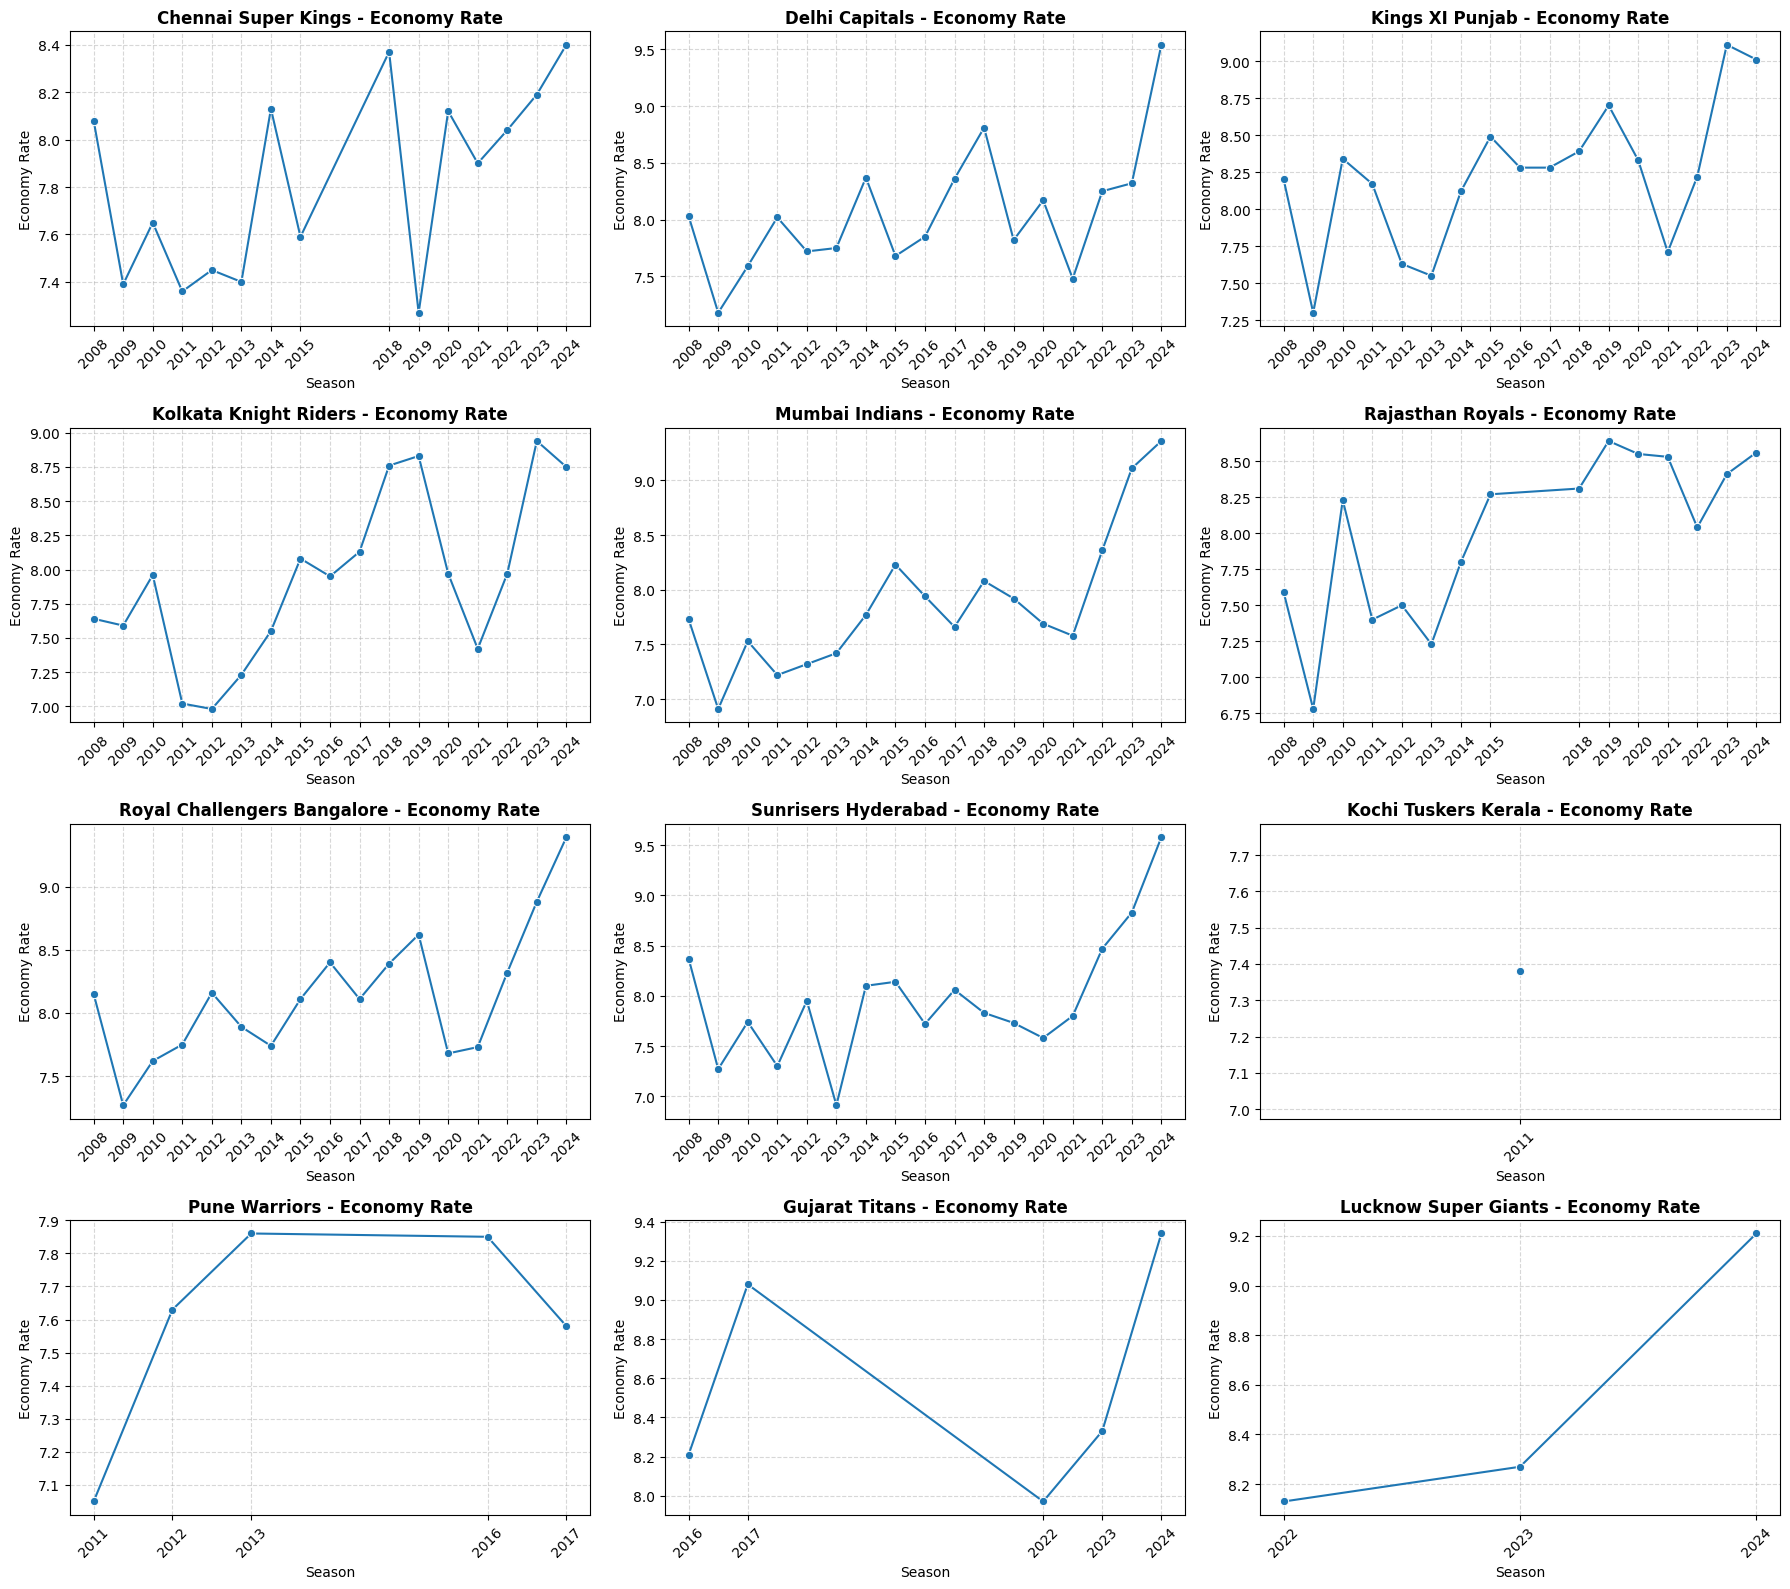

In [636]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Aggregate total runs conceded and total balls bowled by each bowling team per season
filter_data = ipl.groupby(['season', 'bowling_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_ball=('match_id', 'count')  # Counting deliveries bowled
).reset_index()

# Calculate the economy rate for each team
filter_data['economy'] = ((filter_data['total_runs'] / filter_data['total_ball']) * 6).round(2)

# Get unique teams dynamically
teams = filter_data['bowling_team'].unique()
num_teams = len(teams)


# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 4 * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each team's economy rate in its own subplot
for i, team in enumerate(teams):
    team_df = filter_data[filter_data['bowling_team'] == team]

    sns.lineplot(data=team_df, x='season', y='economy', marker='o', ax=axes[i], palette='cool')

    axes[i].set_title(f"{team} - Economy Rate", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Season", fontsize=10)
    axes[i].set_ylabel("Economy Rate", fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].set_xticks(team_df['season'].unique())
    axes[i].set_xticklabels(team_df['season'].unique(), rotation=45)



plt.tight_layout()
plt.show()


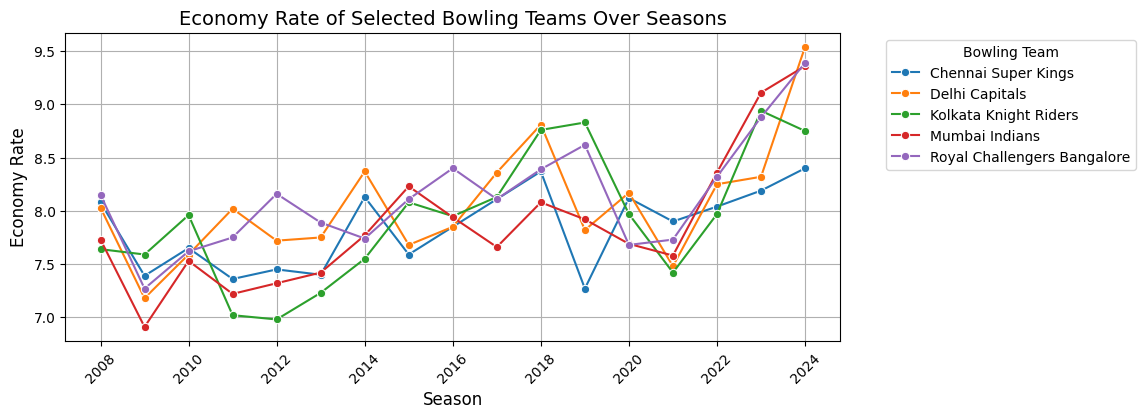

In [637]:


# Aggregate total runs conceded and total balls bowled by each bowling team per season
filter_data = ipl.groupby(['season', 'bowling_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_ball=('match_id', 'count')  # Counting deliveries bowled
).reset_index()

# Calculate the economy rate
filter_data['economy'] = ((filter_data['total_runs'] / filter_data['total_ball']) * 6).round(2)

# Select 5 teams for visualization
selected_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
                  'Kolkata Knight Riders', 'Delhi Capitals']
filtered_df = filter_data[filter_data['bowling_team'].isin(selected_teams)]

# Plot line chart for selected teams
plt.figure(figsize=(10, 4))
sns.lineplot(data=filtered_df, x='season', y='economy', hue='bowling_team', marker='o')

# Customize the plot
plt.title("Economy Rate of Selected Bowling Teams Over Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Economy Rate", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Bowling Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


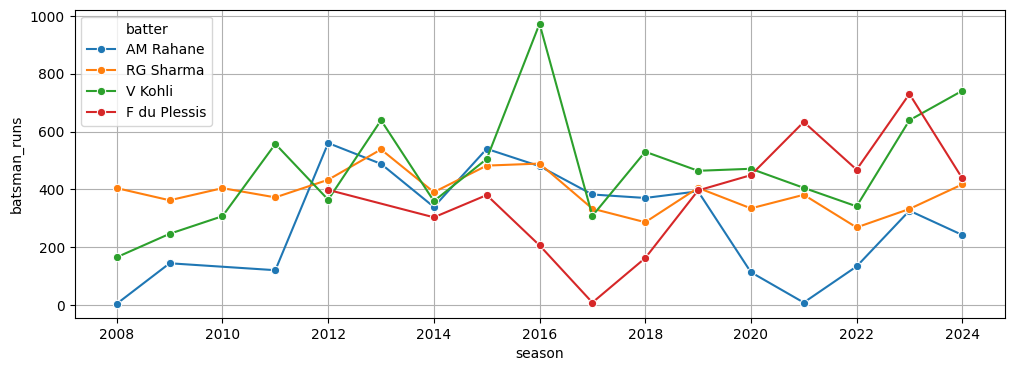

In [638]:
xk  =ipl[(ipl['batter'].isin(['AM Rahane','F du Plessis','V Kohli','RG Sharma']))].groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
xk
plt.figure(figsize=(12,4))
sns.lineplot(data=xk,x='season',y='batsman_runs',hue='batter',marker='o',)
plt.grid(True)
plt.show()

In [639]:
dismissal_counts = ipl['dismissal_kind'].value_counts()
dismissal_counts


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

# Wicket Types & Dismissal Patterns

# This function calculate the economy rate of each team based on year and overs


In [640]:

def bowling_economy_stats(ipl, start_year: int = None,
                          end_year: int = None,
                          start_over: int = 1,
                          end_over: int = 6) -> pd.DataFrame:
    '''
    Function: bowling_economy_stats
    Author: Nikesh
    Date: March 28, 2025

    Description:
    This function calculates the economy rate (runs conceded per over) of each bowling team
    within a specified range of overs.

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - start_year (int, optional): The starting year for filtering data.
    - end_year (int, optional): The ending year for filtering data.
    - start_over (int, optional): The starting over for analysis (default is 1).
    - end_over (int, optional): The ending over for analysis (default is 6).

    Returns:
    - DataFrame: A table with columns ['bowling_team', 'total_runs', 'balls_bowled', 'economy'],
                 showing the economy rate of each team, sorted in ascending order.
    '''
    # Make a copy of the dataset to avoid modifying the original
    filter_data = ipl.copy()

    # Filter based on season
    if start_year is not None:
        filter_data = filter_data[filter_data['season'] >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['season'] <= end_year]

    # Filter based on over range
    over_data = filter_data[(filter_data['over'] >= start_over) & (filter_data['over'] <= end_over)]

    # Aggregate total runs conceded by each bowling team
    total_runs_df = over_data.groupby('bowling_team')['total_runs'].sum().reset_index()

    # Count the number of balls bowled by each team
    total_balls_df = over_data.groupby('bowling_team').size().reset_index(name='balls_bowled')

    # Merge both DataFrames
    bowling_stats = pd.merge(total_runs_df, total_balls_df, on='bowling_team')

    # Calculate economy rate (runs conceded per over)
    bowling_stats['economy'] = ((bowling_stats['total_runs'] / bowling_stats['balls_bowled']) * 6).round(2)

    # Sort teams by best economy rate (ascending order)
    best_bowling_team = bowling_stats.sort_values(by='economy', ascending=True)

    return best_bowling_team





# **Team best economy rate in power play in season 2024**

In [641]:
bowling_economy_stats(ipl, start_year=2024, end_year=2024, start_over=0, end_over=5)

bowling_team  total_runs  balls_bowled  economy
7             Rajasthan Royals         762           551     8.30
0          Chennai Super Kings         737           518     8.54
6               Mumbai Indians         771           534     8.66
3              Kings XI Punjab         760           522     8.74
9          Sunrisers Hyderabad         910           595     9.18
2               Gujarat Titans         686           446     9.23
4        Kolkata Knight Riders         836           540     9.29
5         Lucknow Super Giants         828           526     9.44
8  Royal Challengers Bangalore         879           558     9.45
1               Delhi Capitals         896           533    10.09

## **🏏 Best Economy Rate in Power Play – IPL 2024**  

## **Top Bowling Economies in Power Play**  
🥇 **Rajasthan Royals** – **8.30 economy rate**  
🥈 **Chennai Super Kings** – **8.54 economy rate**  
🥉 **Mumbai Indians** – **8.66 economy rate**  
🔥 **Punjab Kings (8.74) & Sunrisers Hyderabad (9.18) rounded out the top five.**  

## **Key Insights**  
- **Rajasthan Royals (8.30) had the most economical bowling attack in the powerplay, restricting opposition batters early.**  
- **Chennai Super Kings (8.54) and Mumbai Indians (8.66) maintained control with disciplined bowling in the first six overs.**  
- **Punjab Kings (8.74) kept things tight, while Sunrisers Hyderabad (9.18) struggled slightly but stayed competitive.**  
- **Gujarat Titans (9.23) & KKR (9.29) had moderate control but leaked runs under pressure.**  
- **Lucknow Super Giants (9.44) & Royal Challengers Bangalore (9.45) found it challenging to contain openers.**  
- **Delhi Capitals (10.09) had the worst economy rate, conceding the most runs in the powerplay.**  

🔍 **A strong powerplay economy is crucial for early dominance.**  
🔥 **RR & CSK excelled in restricting opposition in the first six overs, giving them an edge!** 🏏



# **Team best economy rate in Death over in season 2024**

In [642]:
bowling_economy_stats(ipl, start_year=2024, end_year=2024, start_over=14, end_over=19)

bowling_team  total_runs  balls_bowled  economy
0          Chennai Super Kings         764           506     9.06
4        Kolkata Knight Riders         643           415     9.30
8  Royal Challengers Bangalore         785           491     9.59
7             Rajasthan Royals         898           558     9.66
6               Mumbai Indians         822           477    10.34
3              Kings XI Punjab         911           527    10.37
9          Sunrisers Hyderabad         897           517    10.41
5         Lucknow Super Giants         778           445    10.49
2               Gujarat Titans         644           349    11.07
1               Delhi Capitals         938           505    11.14

## **🔥 Best Economy Rate in Death Overs – IPL 2024**  

## **Top Bowling Economies in Death Overs**  
🥇 **Chennai Super Kings** – **9.06 economy rate**  
🥈 **Kolkata Knight Riders** – **9.30 economy rate**  
🥉 **Royal Challengers Bangalore** – **9.59 economy rate**  
🔥 **Rajasthan Royals (9.66) & Mumbai Indians (10.34) completed the top five.**  

## **Key Insights**  
- **Chennai Super Kings (9.06) had the most disciplined bowling attack in death overs, restricting big hits effectively.**  
- **Kolkata Knight Riders (9.30) also displayed strong death-over control, preventing late-game run explosions.**  
- **Royal Challengers Bangalore (9.59) & Rajasthan Royals (9.66) maintained respectable economy rates in the final overs.**  
- **Mumbai Indians (10.34) & Punjab Kings (10.37) leaked runs but stayed competitive.**  
- **Sunrisers Hyderabad (10.41) & Lucknow Super Giants (10.49) struggled under pressure.**  
- **Gujarat Titans (11.07) & Delhi Capitals (11.14) conceded the most runs in the death overs, highlighting their bowling weakness.**  

📊 **Death-over economy is crucial for closing out games.**  
🔥 **CSK & KKR mastered this phase, giving them a tactical advantage!** 🏏


#  Venue-based Insights

# this function calculate the average run of a venue based on year and inning


In [643]:
def avg_run_by_venue(ipl: pd.DataFrame, start_year: int = None, end_year: int = None, inning: int = None) -> pd.DataFrame:
    """
    Calculates the average runs per match at each venue, with a dynamically named column.

    Parameters:
    - ipl (DataFrame): The IPL dataset.
    - start_year (int, optional): Filter for matches from this year onward.
    - end_year (int, optional): Filter for matches up to this year.
    - inning (int, optional): Filter for a specific inning (1 or 2).

    Returns:
    - DataFrame with venue-wise average runs, with a dynamically named column.
    """

    filter_data = ipl.copy()

    if start_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year <= end_year]
    if inning is not None:
        filter_data = filter_data[filter_data['inning'] == inning]

    # Create a dynamic column name
    avg_col_name = "avg_runs"
    if start_year and end_year and start_year == end_year:
        avg_col_name += f"_{start_year}"
    if inning:
        avg_col_name += f"_in_{inning}{'st' if inning == 1 else 'nd'}"

    result = filter_data.groupby(['venue']).agg(
        total_runs=('total_runs', 'sum'),
        total_match=('match_id', 'nunique')
    ).reset_index()

    # Compute the dynamically named column
    result[avg_col_name] = result['total_runs'] / result['total_match']

    return result  # Drop intermediate columns


avg_run_by_venue(ipl,start_year=2024,end_year=2024,inning=1)


venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        1176   
1                 Barsapara Cricket Stadium, Guwahati         144   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1280   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         463   
4                               Eden Gardens, Kolkata        1385   
5   Himachal Pradesh Cricket Association Stadium, ...         408   
6                    M Chinnaswamy Stadium, Bengaluru        1378   
7            MA Chidambaram Stadium, Chepauk, Chennai        1529   
8   Maharaja Yadavindra Singh International Cricke...         837   
9                    Narendra Modi Stadium, Ahmedabad        1380   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        1228   
11                     Sawai Mansingh Stadium, Jaipur         936   
12                           Wankhede Stadium, Mumbai        1317   

    total_match  avg_runs_2024_in_1st  
0             5            235.200000  
1             1            144.000000  
2             7            182.857143  
3             2            231.500000  
4             7            197.857143  
5             2            204.000000  
6             7            196.857143  
7             9            169.888889  
8             5            167.400000  
9             8            172.500000  
10            6            204.666667  
11            5            187.200000  
12            7            188.142857


# **Average run of each venue in– IPL 2024**

In [644]:
avg_run_by_venue(ipl,start_year=2024,end_year=2024)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        2232   
1                 Barsapara Cricket Stadium, Guwahati         289   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        2419   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         800   
4                               Eden Gardens, Kolkata        2754   
5   Himachal Pradesh Cricket Association Stadium, ...         728   
6                    M Chinnaswamy Stadium, Bengaluru        2640   
7            MA Chidambaram Stadium, Chepauk, Chennai        2897   
8   Maharaja Yadavindra Singh International Cricke...        1675   
9                    Narendra Modi Stadium, Ahmedabad        2742   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        2393   
11                     Sawai Mansingh Stadium, Jaipur        1853   
12                           Wankhede Stadium, Mumbai        2549   

    total_match  avg_runs_2024  
0             5     446.400000  
1             1     289.000000  
2             7     345.571429  
3             2     400.000000  
4             7     393.428571  
5             2     364.000000  
6             7     377.142857  
7             9     321.888889  
8             5     335.000000  
9             8     342.750000  
10            6     398.833333  
11            5     370.600000  
12            7     364.142857

## **🏏 Average Runs at Each IPL 2024 Venue**  

## **Top High-Scoring Venues**  
🥇 **Arun Jaitley Stadium, Delhi** – **446.4 average runs**  
🥈 **Rajiv Gandhi International Stadium, Hyderabad** – **398.8 average runs**  
🥉 **Eden Gardens, Kolkata** – **393.4 average runs**  
🔥 **Dr. Y.S. Rajasekhara Reddy ACA-VDCA Stadium (400) & M. Chinnaswamy Stadium (377.1) completed the top five.**  

## **Key Insights**  
- **Delhi's Arun Jaitley Stadium (446.4) was the highest-scoring venue, favoring batters heavily.**  
- **Hyderabad (398.8) & Kolkata (393.4) also witnessed high-scoring games, indicating batting-friendly pitches.**  
- **Visakhapatnam (400) provided a balanced contest but remained a venue for big runs.**  
- **Bengaluru (377.1) & Jaipur (370.6) continued their trend of being high-scoring grounds.**  
- **Mumbai’s Wankhede Stadium (364.1) & Dharamshala (364.0) remained reliable batting venues.**  
- **Ahmedabad (342.7) & Lucknow (345.6) had slightly lower average scores, suggesting some bowling assistance.**  
- **Chepauk (321.8) had the lowest average among major venues, indicating tougher conditions for batters.**  

📊 **The IPL 2024 season saw record-breaking totals at multiple venues, highlighting the dominance of batters across different grounds!** 💥🏏  


# **average run in each venue in 1st inning 2024**



In [645]:
avg_run_by_venue(ipl,start_year=2024,end_year=2024,inning=1)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        1176   
1                 Barsapara Cricket Stadium, Guwahati         144   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1280   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         463   
4                               Eden Gardens, Kolkata        1385   
5   Himachal Pradesh Cricket Association Stadium, ...         408   
6                    M Chinnaswamy Stadium, Bengaluru        1378   
7            MA Chidambaram Stadium, Chepauk, Chennai        1529   
8   Maharaja Yadavindra Singh International Cricke...         837   
9                    Narendra Modi Stadium, Ahmedabad        1380   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        1228   
11                     Sawai Mansingh Stadium, Jaipur         936   
12                           Wankhede Stadium, Mumbai        1317   

    total_match  avg_runs_2024_in_1st  
0             5            235.200000  
1             1            144.000000  
2             7            182.857143  
3             2            231.500000  
4             7            197.857143  
5             2            204.000000  
6             7            196.857143  
7             9            169.888889  
8             5            167.400000  
9             8            172.500000  
10            6            204.666667  
11            5            187.200000  
12            7            188.142857


# **Average run of each venue in 2nd – IPL 2024**

In [646]:
avg_run_by_venue(ipl,start_year=2024,end_year=2024,inning=2)

venue  total_runs  \
0                         Arun Jaitley Stadium, Delhi        1056   
1                 Barsapara Cricket Stadium, Guwahati         145   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        1139   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         337   
4                               Eden Gardens, Kolkata        1369   
5   Himachal Pradesh Cricket Association Stadium, ...         320   
6                    M Chinnaswamy Stadium, Bengaluru        1262   
7            MA Chidambaram Stadium, Chepauk, Chennai        1368   
8   Maharaja Yadavindra Singh International Cricke...         838   
9                    Narendra Modi Stadium, Ahmedabad        1362   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...        1165   
11                     Sawai Mansingh Stadium, Jaipur         917   
12                           Wankhede Stadium, Mumbai        1232   

    total_match  avg_runs_2024_in_2nd  
0             5            211.200000  
1             1            145.000000  
2             7            162.714286  
3             2            168.500000  
4             7            195.571429  
5             2            160.000000  
6             7            180.285714  
7             9            152.000000  
8             5            167.600000  
9             8            170.250000  
10            6            194.166667  
11            5            183.400000  
12            7            176.000000

## **🏟️ Venue-Wise 2nd Innings Average Runs – IPL 2024**  

### **📊 Key Takeaways**  
- **🏏 Arun Jaitley Stadium, Delhi (211 runs)** had the highest 2nd innings average, indicating a strong batting-friendly surface for chases.  
- **⚠️ Barsapara Cricket Stadium, Guwahati (145 runs)** recorded the lowest average, suggesting tough conditions for chasing.  
- **🔥 Eden Gardens (196), Rajiv Gandhi International Stadium (194), and Sawai Mansingh Stadium (183)** proved to be favorable for 2nd innings batting.  
- **🛑 MA Chidambaram Stadium, Chennai (152 runs)** had the lowest chasing average among major venues, reinforcing its reputation for favoring bowlers in the second innings.  
- **📉 Most venues had an average 2nd innings score between 160-200**, suggesting competitive yet challenging chases.  

🔹 These stats highlight **the best and toughest grounds for chasing in IPL 2024**, impacting team strategies and match results! 🏏🔥


# Venue with the highest number of sixes.

In [647]:
def count_boundaries_by_venue(ipl: pd.DataFrame,
                              start_year: int = None,
                              end_year: int = None,
                              inning: int = None,
                              boundary_type: int = None) -> pd.DataFrame:
    '''
Function: count_boundaries_by_venue
    Author: Nikesh
    Date: March 25, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details, with columns including
      'date', 'venue', 'total_runs', and 'match_id'.
    - start_year (int, optional): The starting year to filter the data.
      If None, the function includes all years.
    - end_year (int, optional): The ending year to filter the data.
      If None, the function includes all years.
    - inning (int, optional): The specific inning (1 or 2) to filter the data.
      If None, the function includes both innings.
    - boundary_type (int, optional): The type of boundary (4 for fours, 6 for sixes).
      If None, the function includes both fours and sixes.

    Returns:
    - DataFrame: A table with columns ['venue', 'total_matches', 'total_boundaries_<dynamic>'],
      showing the total number of boundaries hit per venue, considering all filters.
      The 'total_boundaries' column name dynamically adjusts based on the applied filters.
    '''

    # Apply boundary filtering
    filter_data = ipl.copy()

    if boundary_type is not None:
        if boundary_type in [4, 6]:
            filter_data = filter_data[filter_data['total_runs'] == boundary_type]
    else:
        filter_data = filter_data[(filter_data['total_runs'] == 4) | (filter_data['total_runs'] == 6)]

    # Apply year filtering
    if start_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year <= end_year]

    # Apply inning filtering
    if inning in [1, 2]:
        filter_data = filter_data[filter_data['inning'] == inning]

    # Create dynamic column names
    boundary_label = f"_{boundary_type}" if boundary_type else "_all"
    year_label = f"_{start_year}" if start_year == end_year and start_year else "_all_years"
    inning_label = f"_in_{inning}{'st' if inning == 1 else 'nd'}" if inning else ""

    boundary_col_name = f"total_boundaries{boundary_label}{year_label}{inning_label}"

    # Group by venue and calculate total boundaries
    result = filter_data.groupby('venue').agg(
        total_matches=('match_id', 'nunique'),
        **{boundary_col_name: ('match_id', 'count')}
    ).reset_index()

    return result
count_boundaries_by_venue(ipl,2024,2024)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_all_2024  
0                         329  
1                          39  
2                         300  
3                         110  
4                         396  
5                         102  
6                         355  
7                         351  
8                         212  
9                         357  
10                        317  
11                        230  
12                        350


# **Total number of boundaries in each venue including 4 and 6 – IPL 2024**

In [648]:
count_boundaries_by_venue(ipl,2024,2024)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_all_2024  
0                         329  
1                          39  
2                         300  
3                         110  
4                         396  
5                         102  
6                         355  
7                         351  
8                         212  
9                         357  
10                        317  
11                        230  
12                        350

## **🏟️ Venue-Wise Total Boundaries – IPL 2024**  

### **📊 Key Insights**  
- **🔥 Eden Gardens, Kolkata (396 boundaries)** recorded the most boundaries, indicating a high-scoring venue.  
- **🏏 Arun Jaitley Stadium, Delhi (329) and M Chinnaswamy Stadium, Bengaluru (355)** were also boundary-heavy grounds, favoring aggressive batting.  
- **⚡ Narendra Modi Stadium, Ahmedabad (357) & MA Chidambaram Stadium, Chennai (351)** provided balanced scoring opportunities.  
- **📉 Barsapara Cricket Stadium, Guwahati (39 boundaries)** had the least, likely due to fewer matches played.  
- **🌍 Most venues had 300+ boundaries, suggesting an exciting and attacking brand of cricket in IPL 2024.**  

🔹 These stats highlight **which stadiums provided the most entertainment with fours and sixes**, influencing team strategies and batting approaches! 🏏🔥  



# **Total number of boundaries in each venue including 4 and 6 in 2nd inning– IPL 2024**

In [649]:
count_boundaries_by_venue(ipl,start_year=2024,end_year=2024,inning=2)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_all_2024_in_2nd  
0                                155  
1                                 19  
2                                146  
3                                 44  
4                                198  
5                                 48  
6                                172  
7                                167  
8                                105  
9                                192  
10                               156  
11                               117  
12                               180

## **🏟️ Venue-Wise Total Boundaries in 2nd Innings – IPL 2024**  

### **📊 Key Insights**  
- **🔥 Eden Gardens, Kolkata (198 boundaries)** recorded the most boundaries in 2nd innings, making it a favorable chasing venue.  
- **🏏 Narendra Modi Stadium, Ahmedabad (192) & M Chinnaswamy Stadium, Bengaluru (172)** also witnessed high boundary counts in run chases.  
- **⚡ Wankhede Stadium, Mumbai (180) & MA Chidambaram Stadium, Chennai (167)** remained strong batting venues in 2nd innings.  
- **📉 Barsapara Cricket Stadium, Guwahati (19 boundaries)** had the least, influenced by fewer matches.  
- **🔄 Overall, boundaries in 2nd innings were lower compared to the 1st, highlighting possible pitch slowdowns or effective bowling strategies.**  

🔹 These stats **showcase how venues influenced chasing teams**, impacting match strategies and batting approaches in IPL 2024! 🏏🔥  


# **Total number of boundaries in each venue including 4 and 6 in 1st inning– IPL 2024**

In [650]:
count_boundaries_by_venue(ipl,start_year=2024,end_year=2024,inning=1)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_all_2024_in_1st  
0                                174  
1                                 20  
2                                154  
3                                 66  
4                                198  
5                                 54  
6                                183  
7                                184  
8                                107  
9                                165  
10                               161  
11                               113  
12                               170

## **🏟️ Venue-Wise Total Boundaries in 1st Innings – IPL 2024**  

### **📊 Key Insights**  
- **🔥 Eden Gardens, Kolkata (198 boundaries)** led the charts for most boundaries in 1st innings, making it a high-scoring venue.  
- **🏏 M Chinnaswamy Stadium, Bengaluru (183) & MA Chidambaram Stadium, Chennai (184)** provided great batting conditions upfront.  
- **⚡ Narendra Modi Stadium, Ahmedabad (165) & Wankhede Stadium, Mumbai (170)** also saw consistent boundary hitting.  
- **📉 Barsapara Cricket Stadium, Guwahati (20 boundaries)** recorded the lowest, likely due to fewer matches played.  
- **🔄 Boundaries in 1st innings were generally higher than 2nd innings, indicating better pitch conditions early on.**  

🔹 These statistics **highlight the best batting-friendly venues in IPL 2024**, helping teams plan their first-innings strategies! 🏏🔥  


# **🔝 Total Sixes Hit at Each IPL 2024 Venue**

In [651]:
count_boundaries_by_venue(ipl,start_year=2024,end_year=2024,boundary_type=6)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_6_2024  
0                       133  
1                         8  
2                        89  
3                        45  
4                       153  
5                        33  
6                       151  
7                       112  
8                        67  
9                       123  
10                      134  
11                       78  
12                      125

## **Total Sixes Hit at Each IPL 2024 Venue**  

### **🏏 Key Highlights**  
- **🔥 Eden Gardens, Kolkata (153 sixes) & M Chinnaswamy Stadium, Bengaluru (151 sixes)** saw the most six-hitting action, reaffirming their reputation as batting paradises.  
- **🚀 Rajiv Gandhi International Stadium, Hyderabad (134 sixes) & Arun Jaitley Stadium, Delhi (133 sixes)** also witnessed power-packed performances.  
- **💥 Narendra Modi Stadium, Ahmedabad (123 sixes) & Wankhede Stadium, Mumbai (125 sixes)** proved to be friendly for power-hitters.  
- **📉 Barsapara Cricket Stadium, Guwahati (8 sixes)** recorded the lowest, primarily due to fewer matches played.  
- **🛑 MA Chidambaram Stadium, Chennai (112 sixes)** had relatively fewer sixes, possibly due to its spin-friendly conditions.  

🔹 These numbers highlight **the most explosive venues for six-hitting in IPL 2024**, influencing game strategies for teams and batters alike! 🚀🏏  


## **Total fours  at Each IPL 2024 Venue**

In [652]:
count_boundaries_by_venue(ipl,start_year=2024,end_year=2024,boundary_type=4)

venue  total_matches  \
0                         Arun Jaitley Stadium, Delhi              5   
1                 Barsapara Cricket Stadium, Guwahati              1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...              2   
4                               Eden Gardens, Kolkata              7   
5   Himachal Pradesh Cricket Association Stadium, ...              2   
6                    M Chinnaswamy Stadium, Bengaluru              7   
7            MA Chidambaram Stadium, Chepauk, Chennai              9   
8   Maharaja Yadavindra Singh International Cricke...              5   
9                    Narendra Modi Stadium, Ahmedabad              8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...              6   
11                     Sawai Mansingh Stadium, Jaipur              5   
12                           Wankhede Stadium, Mumbai              7   

    total_boundaries_4_2024  
0                       196  
1                        31  
2                       211  
3                        65  
4                       243  
5                        69  
6                       204  
7                       239  
8                       145  
9                       234  
10                      183  
11                      152  
12                      225

## **🏏 Total Fours Hit at Each IPL 2024 Venue**  

### **🔍 Key Observations**  
- **🔥 Eden Gardens, Kolkata (243 fours)** recorded the highest number of fours, highlighting its batting-friendly conditions.  
- **🚀 MA Chidambaram Stadium, Chennai (239 fours)** and **Narendra Modi Stadium, Ahmedabad (234 fours)** followed closely, showing consistent stroke play.  
- **💥 Wankhede Stadium, Mumbai (225 fours) & Arun Jaitley Stadium, Delhi (196 fours)** provided good value for shots along the ground.  
- **📉 Barsapara Cricket Stadium, Guwahati (31 fours)** had the least boundaries due to fewer matches played.  
- **🛑 Spin-friendly venues like Rajiv Gandhi International Stadium, Hyderabad (183 fours) & Sawai Mansingh Stadium, Jaipur (152 fours)** saw relatively fewer boundaries.  

🔹 These stats emphasize **which venues offered the best batting conditions for stroke-makers in IPL 2024!** 🚀🏏  


# **Total number of six and four in 1st and 2nd inning**

In [653]:


# Count boundaries in each venue for different innings and boundary types
four_1 = count_boundaries_by_venue(ipl, start_year=2024, end_year=2024, boundary_type=4, inning=1)
six_1 = count_boundaries_by_venue(ipl, start_year=2024, end_year=2024, boundary_type=6, inning=1)
four_2 = count_boundaries_by_venue(ipl, start_year=2024, end_year=2024, boundary_type=4, inning=2)
six_2 = count_boundaries_by_venue(ipl, start_year=2024, end_year=2024, boundary_type=6, inning=2)

# Rename columns to avoid conflicts
four_1.rename(columns={"total_matches": "total_matches_1st", "total_boundaries": "total_fours_1st"}, inplace=True)
six_1.rename(columns={"total_matches": "total_matches_1st", "total_boundaries": "total_sixes_1st"}, inplace=True)
four_2.rename(columns={"total_matches": "total_matches_2nd", "total_boundaries": "total_fours_2nd"}, inplace=True)
six_2.rename(columns={"total_matches": "total_matches_2nd", "total_boundaries": "total_sixes_2nd"}, inplace=True)

# Merge DataFrames on 'venue'
all_inning_six_four = (
    four_1
    .merge(six_1, on=['venue', 'total_matches_1st'], how='left')
    .merge(four_2, on='venue', how='left')
    .merge(six_2, on='venue', how='left')
)

# Fill missing values with 0
all_inning_six_four.fillna(0, inplace=True)

# Display final DataFrame
all_inning_six_four[['venue','total_matches_1st','total_boundaries_4_2024_in_1st','total_boundaries_4_2024_in_2nd','total_boundaries_6_2024_in_1st','total_boundaries_6_2024_in_2nd']]



venue  total_matches_1st  \
0                         Arun Jaitley Stadium, Delhi                  5   
1                 Barsapara Cricket Stadium, Guwahati                  1   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...                  7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...                  2   
4                               Eden Gardens, Kolkata                  7   
5   Himachal Pradesh Cricket Association Stadium, ...                  2   
6                    M Chinnaswamy Stadium, Bengaluru                  7   
7            MA Chidambaram Stadium, Chepauk, Chennai                  9   
8   Maharaja Yadavindra Singh International Cricke...                  5   
9                    Narendra Modi Stadium, Ahmedabad                  8   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...                  6   
11                     Sawai Mansingh Stadium, Jaipur                  5   
12                           Wankhede Stadium, Mumbai                  7   

    total_boundaries_4_2024_in_1st  total_boundaries_4_2024_in_2nd  \
0                               98                              98   
1                               18                              13   
2                              111                             100   
3                               39                              26   
4                              130                             113   
5                               33                              36   
6                               96                             108   
7                              123                             116   
8                               70                              75   
9                              111                             123   
10                              98                              85   
11                              69                              83   
12                             104                             121   

    total_boundaries_6_2024_in_1st  total_boundaries_6_2024_in_2nd  
0                               76                              57  
1                                2                               6  
2                               43                              46  
3                               27                              18  
4                               68                              85  
5                               21                              12  
6                               87                              64  
7                               61                              51  
8                               37                              30  
9                               54                              69  
10                              63                              71  
11                              44                              34  
12                              66                              59

## 🏏 **IPL 2024 Boundary Analysis – First vs Second Inning**  

This report provides a detailed analysis of the **number of fours and sixes** hit at each venue during the **1st and 2nd innings** in IPL 2024. Understanding these trends helps in assessing **pitch conditions, chasing advantages, and team strategies**.  

---

## **🔍 Key Observations**  

### 📌 **1. High Boundary Scoring Venues**
Some venues witnessed **higher boundary counts** due to **batting-friendly pitches, shorter boundaries, and dew factors** aiding the second innings:  
- **Eden Gardens, Kolkata** recorded the highest number of **total sixes (153)** and had a fairly balanced distribution of fours and sixes across both innings.  
- **M Chinnaswamy Stadium, Bengaluru**, known for its **short boundaries**, also had high six counts (151).  
- **Narendra Modi Stadium, Ahmedabad** was another **boundary-heavy venue**, especially in the second innings.  

---

### 📌 **2. First Inning vs Second Inning Boundary Comparison**
- Most venues showed a **balanced distribution** of fours between **1st and 2nd innings**.  
- However, **six-hitting varied more**, possibly due to **dew effects, pressure handling, and pitch slow-downs**.  
- Some venues favored **chasing teams**, where second-inning batters scored more boundaries, **indicating easier batting conditions**.

#### **Venues with More Boundaries in the Second Inning**
- **Narendra Modi Stadium, Ahmedabad** – **More sixes (69 in 2nd vs. 54 in 1st)**  
- **Wankhede Stadium, Mumbai** – **Higher number of boundaries in the second inning (121 fours & 59 sixes)**  
- **Sawai Mansingh Stadium, Jaipur** – **More boundaries in the second inning** (83 fours & 34 sixes)

#### **Venues with More Boundaries in the First Inning**
- **Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam** – **More sixes in 1st inning (27 vs. 18 in 2nd)**  
- **Rajiv Gandhi International Stadium, Hyderabad** – **More fours in the first inning (98 vs. 85 in 2nd)**  

These differences could be attributed to:  
✔ **Dew factor** making it harder for bowlers in the second innings.  
✔ **Pitch behavior** changing as the match progresses.  
✔ **Pressure situations** affecting batting in chases.

---

### 📌 **3. Balanced Boundary Distribution at Some Venues**
Certain venues had **almost equal** distribution of boundaries across both innings, indicating consistent pitch behavior:
- **Arun Jaitley Stadium, Delhi** – 98 fours in both innings, **slight six drop in the second inning**.
- **Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow** – Almost equal boundary count for both fours and sixes.

This suggests that **batting conditions remained similar throughout the match** at these venues.

---

### 📌 **4. Venues with Lower Boundary Counts**
Some venues had **fewer boundaries**, possibly due to **slower pitches, larger boundaries, or difficult batting conditions**:  
- **Barsapara Cricket Stadium, Guwahati** – The lowest boundary count (**only 18 fours & 2 sixes in 1st innings, 13 fours & 6 sixes in 2nd innings**).  
- **Himachal Pradesh Cricket Association Stadium, Dharamshala** – Also had **fewer boundaries**, likely due to **altitude factors and a challenging pitch**.  

---

## **🏆 Conclusion & Strategic Takeaways**
📍 **Batting-friendly venues** like **Eden Gardens, Chinnaswamy Stadium, and Wankhede** will likely continue to be **high-scoring grounds**. Teams may **prefer to chase** at these venues due to dew factors.  

📍 **Bowler-friendly venues** like **Barsapara, Dharamshala, and Ekana Stadium** saw **fewer boundaries**, meaning teams need to **focus on accumulating runs rather than hitting big shots**.  

📍 **Chasing advantage was evident** at certain grounds like **Narendra Modi Stadium & Wankhede Stadium**, where **teams hit more boundaries in the second inning**.  

📍 **Consistent venues** like **Arun Jaitley Stadium & Rajiv Gandhi Stadium** showed **little difference between innings**, making them neutral venues for both batting and bowling strategies.

Understanding these patterns can help teams **adjust their strategies**, such as:  
✅ Choosing to **bowl first** at high-scoring venues to take advantage of dew.  
✅ Focusing on **rotating strike** rather than hitting sixes on bowler-friendly pitches.  
✅ Making **bowling changes** based on how pitches behave in different innings.  

🔹 **IPL 2024 has showcased a variety of batting conditions across venues**, making boundary analysis **a crucial part of match strategies!** 🏏🔥


# Most wickets taken at a single venue.

# Which venue has the highest win percentage for teams batting first (1st inning) and teams chasing (2nd inning)

In [654]:
def win_percent_by_venue_by_inning(ipl,start_year:int=None,end_year:int=None,inning:int=1)->pd.DataFrame:
  '''
    Function: win_percentage_by_venue
    Author: Nikesh
    Date: March 25, 2025


    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details, including columns such as
      'date', 'venue', 'inning', 'batting_team', 'winner', and 'match_id'.
    - start_year (int, optional): The starting year to filter the data.
      If None, the function includes all years.
    - end_year (int, optional): The ending year to filter the data.
      If None, the function includes all years.
    - inning (int, optional): The inning (1 or 2) for which to calculate the win percentage.
      Default is 1.

    Returns:
    - DataFrame: A table with columns ['venue', 'total_match', 'total_match_won', 'win percent in <inning>'],
      showing the win percentage of the batting team at each venue in descending order.
      The column name dynamically adjusts based on the selected inning.
  '''
  # year_filter
  filter_data = ipl.copy()
  # filter based on year
  if start_year is not None:
    filter_data = filter_data[filter_data['date'].dt.year>=start_year]
  if end_year is not None:
    filter_data = filter_data[filter_data['date'].dt.year <= end_year]

  # filter based on inning
  if inning in ([1,2]):
    filter_data = filter_data[filter_data['inning']==inning]

  # calculating column name based on 1 and 2 inning

    column_name = f'win percent in {inning}{"st"if inning==1 else"nd"}'




  venue_total_match_df = filter_data.groupby('venue')['match_id'].nunique().reset_index()

  venue_total_match_won = filter_data[filter_data['batting_team']==filter_data['winner']].groupby('venue')['match_id'].nunique().reset_index()

  # rename column name match_id to total_match at each venue
  venue_total_match_df.rename(columns={'match_id':'total_match'},inplace=True)
  # rename column name match_id to total_match at each venue
  venue_total_match_won.rename(columns={'match_id':'total_match_won'},inplace=True)

  # merging into one dataframe
  final_data = venue_total_match_df.merge(venue_total_match_won,on='venue',how='left').fillna(0)

  # calculating winning percentage
  final_data[column_name] = ((final_data['total_match_won']/final_data['total_match'])*100).round(2)

  return final_data.sort_values(by=column_name,ascending=False)


win_percent_by_venue_by_inning(ipl,2024,2024,1)

venue  total_match  \
0                         Arun Jaitley Stadium, Delhi            5   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...            2   
12                           Wankhede Stadium, Mumbai            7   
5   Himachal Pradesh Cricket Association Stadium, ...            2   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...            7   
4                               Eden Gardens, Kolkata            7   
11                     Sawai Mansingh Stadium, Jaipur            5   
8   Maharaja Yadavindra Singh International Cricke...            5   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...            6   
7            MA Chidambaram Stadium, Chepauk, Chennai            9   
6                    M Chinnaswamy Stadium, Bengaluru            7   
9                    Narendra Modi Stadium, Ahmedabad            8   
1                 Barsapara Cricket Stadium, Guwahati            1   

    total_match_won  win percent in 1st  
0               5.0              100.00  
3               2.0              100.00  
12              4.0               57.14  
5               1.0               50.00  
2               3.0               42.86  
4               3.0               42.86  
11              2.0               40.00  
8               2.0               40.00  
10              2.0               33.33  
7               3.0               33.33  
6               2.0               28.57  
9               2.0               25.00  
1               0.0                0.00

# **win percentage of first batting team in each venue**

In [655]:
win_percent_by_venue_by_inning(ipl,2024,2024,1)

venue  total_match  \
0                         Arun Jaitley Stadium, Delhi            5   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...            2   
12                           Wankhede Stadium, Mumbai            7   
5   Himachal Pradesh Cricket Association Stadium, ...            2   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...            7   
4                               Eden Gardens, Kolkata            7   
11                     Sawai Mansingh Stadium, Jaipur            5   
8   Maharaja Yadavindra Singh International Cricke...            5   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...            6   
7            MA Chidambaram Stadium, Chepauk, Chennai            9   
6                    M Chinnaswamy Stadium, Bengaluru            7   
9                    Narendra Modi Stadium, Ahmedabad            8   
1                 Barsapara Cricket Stadium, Guwahati            1   

    total_match_won  win percent in 1st  
0               5.0              100.00  
3               2.0              100.00  
12              4.0               57.14  
5               1.0               50.00  
2               3.0               42.86  
4               3.0               42.86  
11              2.0               40.00  
8               2.0               40.00  
10              2.0               33.33  
7               3.0               33.33  
6               2.0               28.57  
9               2.0               25.00  
1               0.0                0.00

##  **Conclusion**

The analysis of **win percentages for teams batting first in IPL 2024** highlights the **impact of venue conditions** on match outcomes.  

- **Venues Favoring Batting First** 🏏  
  - **Arun Jaitley Stadium (Delhi)** and **Dr. Y.S. Rajasekhara Reddy ACA-VDCA Stadium (Visakhapatnam)** had a **100% success rate**, making them ideal grounds for setting a target.  
  - **Wankhede Stadium (Mumbai)** also provided a decent advantage for batting first teams with a **57.14% win rate**.  

- **Venues Favoring Chasing** 🎯  
  - **Barsapara Cricket Stadium (Guwahati)** had a **0% success rate for batting first teams**, indicating an overwhelming advantage for chasing teams.  
  - **Narendra Modi Stadium (Ahmedabad), M Chinnaswamy Stadium (Bengaluru), and MA Chidambaram Stadium (Chennai)** also showed **low win rates for batting first teams**, favoring teams batting second.  

### **Final Thoughts**
The decision to **bat first or chase** should be carefully **venue-specific**, with certain grounds **clearly favoring one strategy over the other**. Teams and captains can leverage this data for **better match planning and strategy execution** in future IPL games.


# Venue with the lowest win percentage for teams batting first.

# **win percentages for teams batting first in IPL 2024**

In [656]:
win_percent_by_venue_by_inning(ipl,2024,2024,2)

venue  total_match  \
11                     Sawai Mansingh Stadium, Jaipur            5   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...            7   
7            MA Chidambaram Stadium, Chepauk, Chennai            9   
10  Rajiv Gandhi International Stadium, Uppal, Hyd...            6   
9                    Narendra Modi Stadium, Ahmedabad            8   
12                           Wankhede Stadium, Mumbai            7   
4                               Eden Gardens, Kolkata            7   
8   Maharaja Yadavindra Singh International Cricke...            5   
6                    M Chinnaswamy Stadium, Bengaluru            7   
3   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...            2   
1                 Barsapara Cricket Stadium, Guwahati            1   
0                         Arun Jaitley Stadium, Delhi            5   
5   Himachal Pradesh Cricket Association Stadium, ...            2   

    total_match_won  win percent in 2nd  
11              3.0               60.00  
2               4.0               57.14  
7               5.0               55.56  
10              3.0               50.00  
9               4.0               50.00  
12              3.0               42.86  
4               3.0               42.86  
8               2.0               40.00  
6               1.0               14.29  
3               0.0                0.00  
1               0.0                0.00  
0               0.0                0.00  
5               0.0                0.00

## 📊 **Conclusion: Win Percentage of Teams Batting Second in IPL 2024**

The analysis of **win percentages for teams batting second** reveals significant **venue-specific trends** that influence match outcomes.

### **🏆 Venues Favoring Chasing Teams**
- **Sawai Mansingh Stadium (Jaipur)** had the **highest success rate (60.00%)** for teams chasing a target.
- **Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium (Lucknow)** and **MA Chidambaram Stadium (Chennai)** also showed **strong win percentages (57.14% and 55.56%)**, making them favorable for chasing.
- **Rajiv Gandhi International Stadium (Hyderabad) and Narendra Modi Stadium (Ahmedabad)** had an **equal success rate for both innings (50.00%)**, indicating balanced conditions.

### **📉 Venues Favoring Batting First**
- **Arun Jaitley Stadium (Delhi), Himachal Pradesh Cricket Association Stadium (Dharamshala), and Dr. Y.S. Rajasekhara Reddy ACA-VDCA Stadium (Visakhapatnam)** had **0% win rate for chasing teams**, making them highly favorable for setting a target.
- **M. Chinnaswamy Stadium (Bengaluru) had a low chasing success rate (14.29%)**, reinforcing its reputation as a high-scoring venue where scoreboard pressure plays a crucial role.

### **🚀 Key Takeaways**
- **Jaipur, Lucknow, and Chennai** are strong venues for **chasing teams**.
- **Delhi, Dharamshala, and Visakhapatnam** favor teams **batting first**.
- **Balanced venues** like **Ahmedabad and Hyderabad** provide **equal opportunities** for both strategies.

### **🎯 Strategic Implications**
Captains and teams can **adjust their approach based on the venue**, using data-driven decisions to **choose whether to bat first or chase**. This insight is crucial for **match-winning strategies** in IPL 2024!


# Bowler with the most wickets at a single venue.

In [657]:
def most_wicket_taker(ipl, inning: int = None,
                      start_year: int = None,
                      end_year: int = None,
                      start_over: int = None,
                      end_over: int = None) -> pd.DataFrame:
    '''
    Function: most_wicket_taker
    Author: Nikesh
    Date: March 28, 2025


    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - inning (int, optional): The inning (1 or 2) for which to calculate the wickets.
    - start_year (int, optional): The starting year to filter the data.
    - end_year (int, optional): The ending year to filter the data.
    - start_over (int, optional): The starting over for filtering (default is None).
    - end_over (int, optional): The ending over for filtering (default is None).

    Returns:
    - DataFrame: A table with columns ['bowler', 'Total_wick_in_<inning>_between_<start_over>_and_<end_over>'],
                  showing the total wickets taken by each bowler.
    '''

    # Copy the original dataset to avoid modifying it
    filter_data = ipl.copy()

    # Filter based on year range
    if start_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year <= end_year]

    # Filter based on inning
    if inning in [1, 2]:
        filter_data = filter_data[filter_data['inning'] == inning]

    # Filter based on over range
    if start_over is not None:
        filter_data = filter_data[filter_data['over'] >= start_over]
    if end_over is not None:
        filter_data = filter_data[filter_data['over'] <= end_over]

    # Column name for total wickets taken
    column_name = f"Total_wick_in_{inning}st" if inning == 1 else f"Total_wick_in_{inning}nd" if inning == 2 else 'Total_wick'

    # Add over range information to column name
    if start_over is not None and end_over is not None:
        column_name = f"{column_name}_between_{start_over}_and_{end_over}"
    elif start_over is not None:
        column_name = f"{column_name}_after_{start_over}"
    elif end_over is not None:
        column_name = f"{column_name}_before_{end_over}"

    # Calculate total wickets taken by each bowler
    total_wicket_df = filter_data.groupby('bowler')['is_wicket'].sum().reset_index(name=column_name)

    # Sort by total wickets in descending order
    total_wicket_df = total_wicket_df.sort_values(by=column_name, ascending=False)

    return total_wicket_df



# **Most wicket taker bowler in 1st inning power play 2024 ipl**

In [658]:

most_wicket_taker(ipl, start_year=2024, end_year=2024, start_over=0, end_over=6,inning=1).head(35)

bowler  Total_wick_in_1st_between_0_and_6
81           TA Boult                                  9
38           MA Starc                                  7
75     Sandeep Sharma                                  5
50         N Thushara                                  5
9      Arshdeep Singh                                  5
86           VG Arora                                  5
12            B Kumar                                  4
45     Mohammed Siraj                                  4
54      Naveen-ul-Haq                                  4
21           I Sharma                                  4
24          JJ Bumrah                                  4
27           KK Ahmed                                  3
10         Avesh Khan                                  3
47       Mukesh Kumar                                  3
20       Harshit Rana                                  3
71          SM Curran                                  3
46        Mohsin Khan                                  3
80        T Natarajan                                  3
83           UT Yadav                                  3
69  S Sandeep Warrier                                  3
58          PP Chawla                                  2
30      Kuldeep Yadav                                  2
48  Mustafizur Rahman                                  2
16         GJ Maxwell                                  2
25           K Rabada                                  2
17          HH Pandya                                  2
84        V Kaverappa                                  2
56         Noor Ahmad                                  2
62          RA Jadeja                                  2
90         Yash Dayal                                  2
91        Yash Thakur                                  2
65        Rashid Khan                                  2
8         Arshad Khan                                  1
82       TU Deshpande                                  1
79      Swapnil Singh                                  1

## Conclusion: Most Wicket-Taker Bowler in the 1st Inning Power Play of the 2024 IPL

- **TA Boult** emerged as the leading wicket-taker in the first inning powerplay of the 2024 IPL, with a total of **9 wickets**.
- **MA Starc** followed closely with **7 wickets**, demonstrating consistent performance in the early stages of the game.
- Other notable bowlers include **Sandeep Sharma**, **N Thushara**, and **Arshdeep Singh**, each taking **5 wickets**.
- The overall distribution of wickets among bowlers indicates a variety of players contributing to the success in the powerplay overs, with several bowlers taking **3 to 4 wickets**.
- The analysis of this dataset highlights the bowlers who thrived during the first six overs, showcasing their ability to take wickets and exert control early in the innings.

This analysis provides insight into which bowlers had the most impact during the powerplay in the 2024 IPL, which could be crucial for strategizing future matches.


# **Most wicket taker bowler in 2nd inning power play 2024 ipl**

In [659]:
most_wicket_taker(ipl, start_year=2024, end_year=2024, start_over=0, end_over=5,inning=2).head(35)

bowler  Total_wick_in_2nd_between_0_and_5
11             B Kumar                                  6
52          PJ Cummins                                  5
79          Yash Dayal                                  5
27            KK Ahmed                                  5
74        TU Deshpande                                  5
19            I Sharma                                  5
13           DL Chahar                                  4
71       Swapnil Singh                                  4
35            MA Starc                                  4
76            VG Arora                                  4
64   S Sandeep Warrier                                  3
80         Yash Thakur                                  3
48            N Burger                                  3
18        Harshit Rana                                  3
73            TA Boult                                  3
75            UT Yadav                                  3
9           Avesh Khan                                  2
40            MP Yadav                                  2
44         Mohsin Khan                                  2
70       Shahbaz Ahmed                                  2
24            K Rabada                                  2
8       Arshdeep Singh                                  2
1             AR Patel                                  2
31         LH Ferguson                                  2
22           JJ Bumrah                                  2
10  Azmatullah Omarzai                                  2
12            CV Varun                                  2
14           G Coetzee                                  2
0             A Nortje                                  1
77            WG Jacks                                  1
15          GJ Maxwell                                  1
6        Akash Madhwal                                  1
3               AS Roy                                  1
68           SP Narine                                  1
65          SH Johnson                                  1

## Conclusion: Most Wicket-Taker Bowler in the 2nd Inning Power Play of the 2024 IPL

- **B Kumar** and **PJ Cummins** were the most successful bowlers in the second inning powerplay, each securing **6 wickets**.
- **I Sharma**, **Yash Dayal**, **TU Deshpande**, and **KK Ahmed** followed closely with **5 wickets**, showing their effectiveness with the new ball.
- **DL Chahar**, **MA Starc**, **VG Arora**, and **Swapnil Singh** contributed significantly with **4 wickets** each.
- Several bowlers took **2 to 3 wickets**, highlighting a balanced distribution of wickets among multiple players.
- The performance of these bowlers in the powerplay overs was crucial in restricting opponents and setting the momentum for the bowling team.

This analysis showcases the impact bowlers had during the powerplay in the second innings of the 2024 IPL, helping teams control the game early on.


# **Most wicket taker bowler in 1st inning Death overs 2024 ipl**

In [660]:
most_wicket_taker(ipl, start_year=2024, end_year=2024, start_over=14, end_over=19,inning=1).head(35)

bowler  Total_wick_in_1st_between_14_and_19
18           HV Patel                                   17
24          JJ Bumrah                                   11
9          Avesh Khan                                   10
8      Arshdeep Singh                                    9
75       TU Deshpande                                    8
71     Sandeep Sharma                                    8
39          MM Sharma                                    8
46       Mukesh Kumar                                    6
17          HH Pandya                                    6
73        T Natarajan                                    5
20       Harshit Rana                                    4
25           K Rabada                                    4
74           TA Boult                                    4
60          RD Chahar                                    4
26           KK Ahmed                                    4
52      Naveen-ul-Haq                                    4
67          SM Curran                                    4
81         Yash Dayal                                    4
2          AD Russell                                    3
1            A Nortje                                    3
38           MA Starc                                    3
69          SP Narine                                    3
79  Vijaykumar Vyshak                                    3
80          YS Chahal                                    3
23         JD Unadkat                                    3
35        M Pathirana                                    3
55         PJ Cummins                                    2
58      R Sai Kishore                                    2
56          PP Chawla                                    2
44     Mohammed Siraj                                    2
47  Mustafizur Rahman                                    2
48           N Burger                                    2
30      Kuldeep Yadav                                    2
12           CV Varun                                    2
64       Ravi Bishnoi                                    2

## Conclusion: Most Wicket-Taker Bowlers in the 1st Inning Death Overs of the 2024 IPL

- **HV Patel** dominated the death overs in the first innings, taking an impressive **17 wickets**, making him the most lethal bowler in this phase.
- **JJ Bumrah** followed with **11 wickets**, reaffirming his status as a premier death-over specialist.
- **Avesh Khan (10 wickets)** and **Arshdeep Singh (9 wickets)** also proved to be key bowlers in the final overs.
- **TU Deshpande, Sandeep Sharma, and MM Sharma** each took **8 wickets**, contributing significantly to their teams' finishing attacks.
- Several bowlers, including **Mukesh Kumar, HH Pandya, and T Natarajan**, secured between **6 and 5 wickets**, showing their effectiveness in restricting runs and taking crucial breakthroughs.
- The presence of **spinners like SP Narine, YS Chahal, and Ravi Bishnoi** in the list highlights the role of variation in death-over bowling.

This analysis underscores the crucial role these bowlers played in closing out innings, preventing big finishes, and maintaining control in the final overs.


# **Most wicket taker bowler in 2nd inning Death overs 2024 ipl**

In [661]:
most_wicket_taker(ipl, start_year=2024, end_year=2024, start_over=14, end_over=19,inning=2).head(35)

bowler  Total_wick_in_2nd_between_14_and_19
48         Mukesh Kumar                                    8
76          T Natarajan                                    7
46       Mohammed Siraj                                    7
22         Harshit Rana                                    7
18            G Coetzee                                    6
38             MA Starc                                    6
84          Yash Thakur                                    6
49    Mustafizur Rahman                                    6
52        Naveen-ul-Haq                                    5
20             HV Patel                                    5
37          M Pathirana                                    5
54           PJ Cummins                                    5
83           Yash Dayal                                    5
69            SM Curran                                    4
28             KK Ahmed                                    4
41            MM Sharma                                    4
32        Kuldeep Yadav                                    4
1            AD Russell                                    4
66         Rasikh Salam                                    3
11           Avesh Khan                                    3
82            YS Chahal                                    3
78         TU Deshpande                                    3
65          Rashid Khan                                    3
9        Arshdeep Singh                                    2
68           SH Johnson                                    2
53  Nithish Kumar Reddy                                    2
70            SN Thakur                                    2
71            SP Narine                                    2
67         Ravi Bishnoi                                    2
80             UT Yadav                                    2
81             VG Arora                                    2
42             MP Yadav                                    2
34          LH Ferguson                                    2
47          Mohsin Khan                                    2
19            HH Pandya                                    2

## Conclusion: Most Wicket-Taker Bowlers in the 2nd Inning Death Overs of the 2024 IPL

- **Mukesh Kumar** led the wicket-taking tally in the death overs of the second innings, securing **8 wickets**, making him the most impactful bowler in this phase.
- **T Natarajan, Mohammed Siraj, and Harshit Rana** followed closely with **7 wickets each**, proving their effectiveness in closing out matches.
- **G Coetzee, MA Starc, Yash Thakur, and Mustafizur Rahman** each took **6 wickets**, showcasing their ability to execute under pressure.
- **Naveen-ul-Haq, HV Patel, M Pathirana, PJ Cummins, and Yash Dayal** all contributed significantly with **5 wickets** each, providing crucial breakthroughs for their teams.
- A mix of pace and spin was effective in the death overs, with players like **SM Curran, Kuldeep Yadav, Rashid Khan, SP Narine, and YS Chahal** featuring in the list with multiple wickets.
- The presence of **young and emerging bowlers like Rasikh Salam, Nithish Kumar Reddy, and UT Yadav** highlights the rise of new death-over specialists.

This analysis highlights how teams relied on a combination of experienced and young bowlers to restrict opposition in the final overs of the chase.


# Find the bowler who dismissed the same batsman the most times in IPL history.

In [662]:

def bower_who_dismissed_same_batsman(ipl,start_year:int=None,end_year:int=None)->pd.DataFrame:
  '''
  '''
  filter_data= ipl[ipl['is_wicket']==1]

  # filter based on year
  if start_year is not None:
    filter_data = filter_data[filter_data['date'].dt.year >= start_year]
  if end_year is not None:
    filter_data = filter_data[filter_data['date'].dt.year <= end_year]

  filter_data = filter_data.groupby(['bowler','player_dismissed']).size().reset_index(name='total out')
  filter_data.sort_values(by='total out',ascending=False,inplace=True)
  return filter_data
# bower_who_dismissed_same_batsman(ipl,2024,2024)


bower_who_dismissed_same_batsman(ipl,2020,2024).head(30)


bowler player_dismissed  total out
3389       YS Chahal       MA Agarwal          5
687        DL Chahar     Shubman Gill          5
3121        TA Boult          PP Shaw          4
2995     Shivam Mavi        SV Samson          4
2836       SN Thakur         N Pooran          4
2682    Ravi Bishnoi     Ishan Kishan          4
2709    Ravi Bishnoi         SA Yadav          4
2643     Rashid Khan         S Dhawan          4
1984  Mohammed Siraj          PP Shaw          4
1943  Mohammed Shami       SO Hetmyer          4
3385       YS Chahal       KD Karthik          4
1267        K Rabada          WP Saha          4
1347        KK Ahmed  M Shahrukh Khan          4
61          A Nortje     Shubman Gill          4
1234        K Rabada         KL Rahul          4
1243        K Rabada         N Pooran          4
1933  Mohammed Shami      RA Tripathi          4
3396       YS Chahal           N Rana          4
872    Harpreet Brar       GJ Maxwell          4
2702    Ravi Bishnoi        RG Sharma          3
571         CV Varun          PP Shaw          3
2640     Rashid Khan        RG Sharma          3
567         CV Varun         MS Dhoni          3
2677    Ravi Bishnoi        DA Warner          3
3390       YS Chahal        MK Lomror          3
2609     Rashid Khan         DJ Hooda          3
2626     Rashid Khan           MM Ali          3
2536       RD Chahar       MP Stoinis          3
2539       RD Chahar           N Rana          3
2364    PWH de Silva        SV Samson          3

#**Bowler who out the same batsman multiple time from 2020 to 2024**

In [663]:
bower_who_dismissed_same_batsman(ipl,2020,2024).head(30)

bowler player_dismissed  total out
3389       YS Chahal       MA Agarwal          5
687        DL Chahar     Shubman Gill          5
3121        TA Boult          PP Shaw          4
2995     Shivam Mavi        SV Samson          4
2836       SN Thakur         N Pooran          4
2682    Ravi Bishnoi     Ishan Kishan          4
2709    Ravi Bishnoi         SA Yadav          4
2643     Rashid Khan         S Dhawan          4
1984  Mohammed Siraj          PP Shaw          4
1943  Mohammed Shami       SO Hetmyer          4
3385       YS Chahal       KD Karthik          4
1267        K Rabada          WP Saha          4
1347        KK Ahmed  M Shahrukh Khan          4
61          A Nortje     Shubman Gill          4
1234        K Rabada         KL Rahul          4
1243        K Rabada         N Pooran          4
1933  Mohammed Shami      RA Tripathi          4
3396       YS Chahal           N Rana          4
872    Harpreet Brar       GJ Maxwell          4
2702    Ravi Bishnoi        RG Sharma          3
571         CV Varun          PP Shaw          3
2640     Rashid Khan        RG Sharma          3
567         CV Varun         MS Dhoni          3
2677    Ravi Bishnoi        DA Warner          3
3390       YS Chahal        MK Lomror          3
2609     Rashid Khan         DJ Hooda          3
2626     Rashid Khan           MM Ali          3
2536       RD Chahar       MP Stoinis          3
2539       RD Chahar           N Rana          3
2364    PWH de Silva        SV Samson          3

## Conclusion: Bowlers Who Dismissed the Same Batsman Multiple Times (2020-2024)

- **YS Chahal** dominated this category, dismissing **MA Agarwal (5 times), KD Karthik (4 times), N Rana (4 times), and MK Lomror (3 times)**, proving his effectiveness against key batsmen.
- **DL Chahar** troubled **Shubman Gill** the most, getting him out **5 times**.
- **TA Boult and Mohammed Siraj** both dismissed **PP Shaw** **4 times**, showing their ability to exploit his weaknesses.
- **Ravi Bishnoi** had multiple victims, dismissing **Ishan Kishan, SA Yadav, and RG Sharma 4 times each**, highlighting his impact against top-order batters.
- **Rashid Khan** remained a threat to various players, taking down **S Dhawan, RG Sharma, DJ Hooda, and MM Ali** multiple times.
- **K Rabada** showed his dominance, dismissing **KL Rahul, WP Saha, and N Pooran** multiple times.
- **Harpreet Brar, CV Varun, and RD Chahar** also featured in the list, making crucial breakthroughs for their teams.

This analysis showcases how specific bowlers consistently managed to dismiss particular batsmen, revealing key player matchups and rivalries in the IPL.


In [664]:

def runs_conceded_by_bowler_to_batter(ipl, batter_name: str, start_year: int = None, end_year: int = None) -> pd.DataFrame:
    '''
    Function: runs_conceded_by_bowler_to_batter
    Author: Nikesh
    Date: March 28, 2025

    Parameters:
    - ipl (DataFrame): The IPL dataset containing match details.
    - batter_name (str): The name of the batter for whom the data is required.
    - start_year (int, optional): The starting year for filtering data.
    - end_year (int, optional): The ending year for filtering data.

    Returns:
    - DataFrame: A sorted table with columns ['bowler', 'batter', 'batsman_runs'],
                 showing how many runs each bowler has conceded to the given batter.
    '''
    # Make a copy of the dataset to avoid modifying the original
    filter_data = ipl.copy()

    # Filter based on year
    if start_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year >= start_year]
    if end_year is not None:
        filter_data = filter_data[filter_data['date'].dt.year <= end_year]

    # Group by bowler and batter, summing the runs scored
    runs_data = (
        filter_data.groupby(['bowler', 'batter'])['batsman_runs']
        .sum()
        .reset_index()
        .sort_values(by='batsman_runs', ascending=False)
    )

    # Filter only for the given batter
    return runs_data[runs_data['batter'] == batter_name]

# Function call example
runs_conceded_by_bowler_to_batter(ipl, batter_name='RD Gaikwad',start_year=2023,end_year=2024).head(10)


bowler      batter  batsman_runs
4212     Rashid Khan  RD Gaikwad            55
730          B Kumar  RD Gaikwad            48
5633     Yash Thakur  RD Gaikwad            38
4460       SM Curran  RD Gaikwad            38
542   Arshdeep Singh  RD Gaikwad            34
3204     Mohsin Khan  RD Gaikwad            31
2259   Kuldeep Yadav  RD Gaikwad            28
250         AR Patel  RD Gaikwad            28
1210       HH Pandya  RD Gaikwad            27
5289        VG Arora  RD Gaikwad            26

In [665]:
xx= ipl[ipl['date'].dt.year==2024].groupby(['bowler','batter'])['batsman_runs'].sum().reset_index().sort_values(ascending=False,by='batsman_runs').head(40)
xx

bowler               batter  batsman_runs
1495          MM Sharma              RR Pant            62
3161        Yash Thakur            SV Samson            50
321          Avesh Khan              V Kohli            47
732       Harpreet Brar  Nithish Kumar Reddy            45
1310         M Markande           RM Patidar            43
3131        Yash Thakur      Abhishek Sharma            43
2488          SM Curran              V Kohli            42
401             B Kumar          YBK Jaiswal            41
1430           MA Starc              V Kohli            40
3037          YS Chahal            H Klaasen            40
379             B Kumar           RD Gaikwad            39
1510          MM Sharma             WG Jacks            39
1957         Noor Ahmad              V Kohli            37
2725        T Natarajan             A Badoni            37
1685        Mohsin Khan            SV Samson            37
2760        T Natarajan               S Dube            35
2306        Rashid Khan             WG Jacks            35
288          Avesh Khan             KL Rahul            35
997            K Rabada         Shubman Gill            35
256      Arshdeep Singh              V Kohli            35
1080           KK Ahmed              PD Salt            35
453            CV Varun            H Klaasen            34
2627     Sandeep Sharma             T Stubbs            34
2099           R Ashwin            SP Narine            34
347             B Kumar           AD Russell            34
1766  Mustafizur Rahman           MP Stoinis            34
849            J Little         F du Plessis            34
32             A Nortje           R Shepherd            33
2381       Ravi Bishnoi            SV Samson            33
174       Akash Madhwal           KD Karthik            33
1946         Noor Ahmad              R Parag            33
3063          YS Chahal            SP Narine            33
2739        T Natarajan           KD Karthik            32
991            K Rabada             SA Yadav            32
508         DJ Mitchell         Shubman Gill            32
3010           WG Jacks      Abhishek Sharma            32
271          Avesh Khan      Ashutosh Sharma            32
1289           M Jansen             SA Yadav            32
654            HV Patel        Abishek Porel            31
414             C Green      M Shahrukh Khan            31

Answer Here.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [666]:
sixes = ipl[ipl['total_runs'] == 6].groupby(ipl['venue']).size().reset_index(name='sixes')
fours = ipl[ipl['total_runs'] == 4].groupby(ipl['venue']).size().reset_index(name='fours')
total_match = ipl.groupby('venue')['match_id'].nunique().reset_index(name='total_match')
venue_six_four = total_match.merge(sixes,on='venue',how='left').merge(fours,on='venue',how='left')
venue_six_four

venue  total_match  sixes  \
0                         Arun Jaitley Stadium, Delhi           90   1125   
1                                    Barabati Stadium            7     67   
2                 Barsapara Cricket Stadium, Guwahati            3     32   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...           14    159   
4                           Brabourne Stadium, Mumbai           27    333   
5                                        Buffalo Park            3     27   
6                               De Beers Diamond Oval            3     34   
7                  Dr DY Patil Sports Academy, Mumbai           37    456   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...           15    198   
9                 Dubai International Cricket Stadium           46    493   
10                              Eden Gardens, Kolkata           93   1177   
11                                         Green Park            4     36   
12  Himachal Pradesh Cricket Association Stadium, ...           13    182   
13                             Holkar Cricket Stadium            9    155   
14                 JSCA International Stadium Complex            7     76   
15                                          Kingsmead           15    130   
16                   M Chinnaswamy Stadium, Bengaluru           94   1390   
17           MA Chidambaram Stadium, Chepauk, Chennai           85    917   
18  Maharaja Yadavindra Singh International Cricke...            5     67   
19      Maharashtra Cricket Association Stadium, Pune           35    463   
20                   Narendra Modi Stadium, Ahmedabad           36    504   
21                                      Nehru Stadium            5     38   
22                              New Wanderers Stadium            8     63   
23                                           Newlands            7     62   
24                                    OUTsurance Oval            2      7   
25  Punjab Cricket Association IS Bindra Stadium, ...           61    599   
26  Rajiv Gandhi International Stadium, Uppal, Hyd...           77    870   
27             Saurashtra Cricket Association Stadium           10    104   
28                     Sawai Mansingh Stadium, Jaipur           57    503   
29   Shaheed Veer Narayan Singh International Stadium            6     44   
30                            Sharjah Cricket Stadium           28    392   
31                               Sheikh Zayed Stadium           29    255   
32                                   St George's Park            7     62   
33                         Subrata Roy Sahara Stadium           16    137   
34                                    SuperSport Park           12    119   
35       Vidarbha Cricket Association Stadium, Jamtha            3     26   
36                           Wankhede Stadium, Mumbai          118   1590   
37                   Zayed Cricket Stadium, Abu Dhabi            8     72   

    fours  
0    2589  
1     217  
2     101  
3     340  
4     889  
5      57  
6      63  
7     928  
8     361  
9    1201  
10   2747  
11    151  
12    445  
13    225  
14    156  
15    366  
16   2608  
17   2189  
18    145  
19    887  
20    968  
21    125  
22    185  
23    149  
24     43  
25   1870  
26   2089  
27    306  
28   1653  
29    162  
30    599  
31    788  
32    157  
33    367  
34    321  
35     67  
36   3479  
37    228

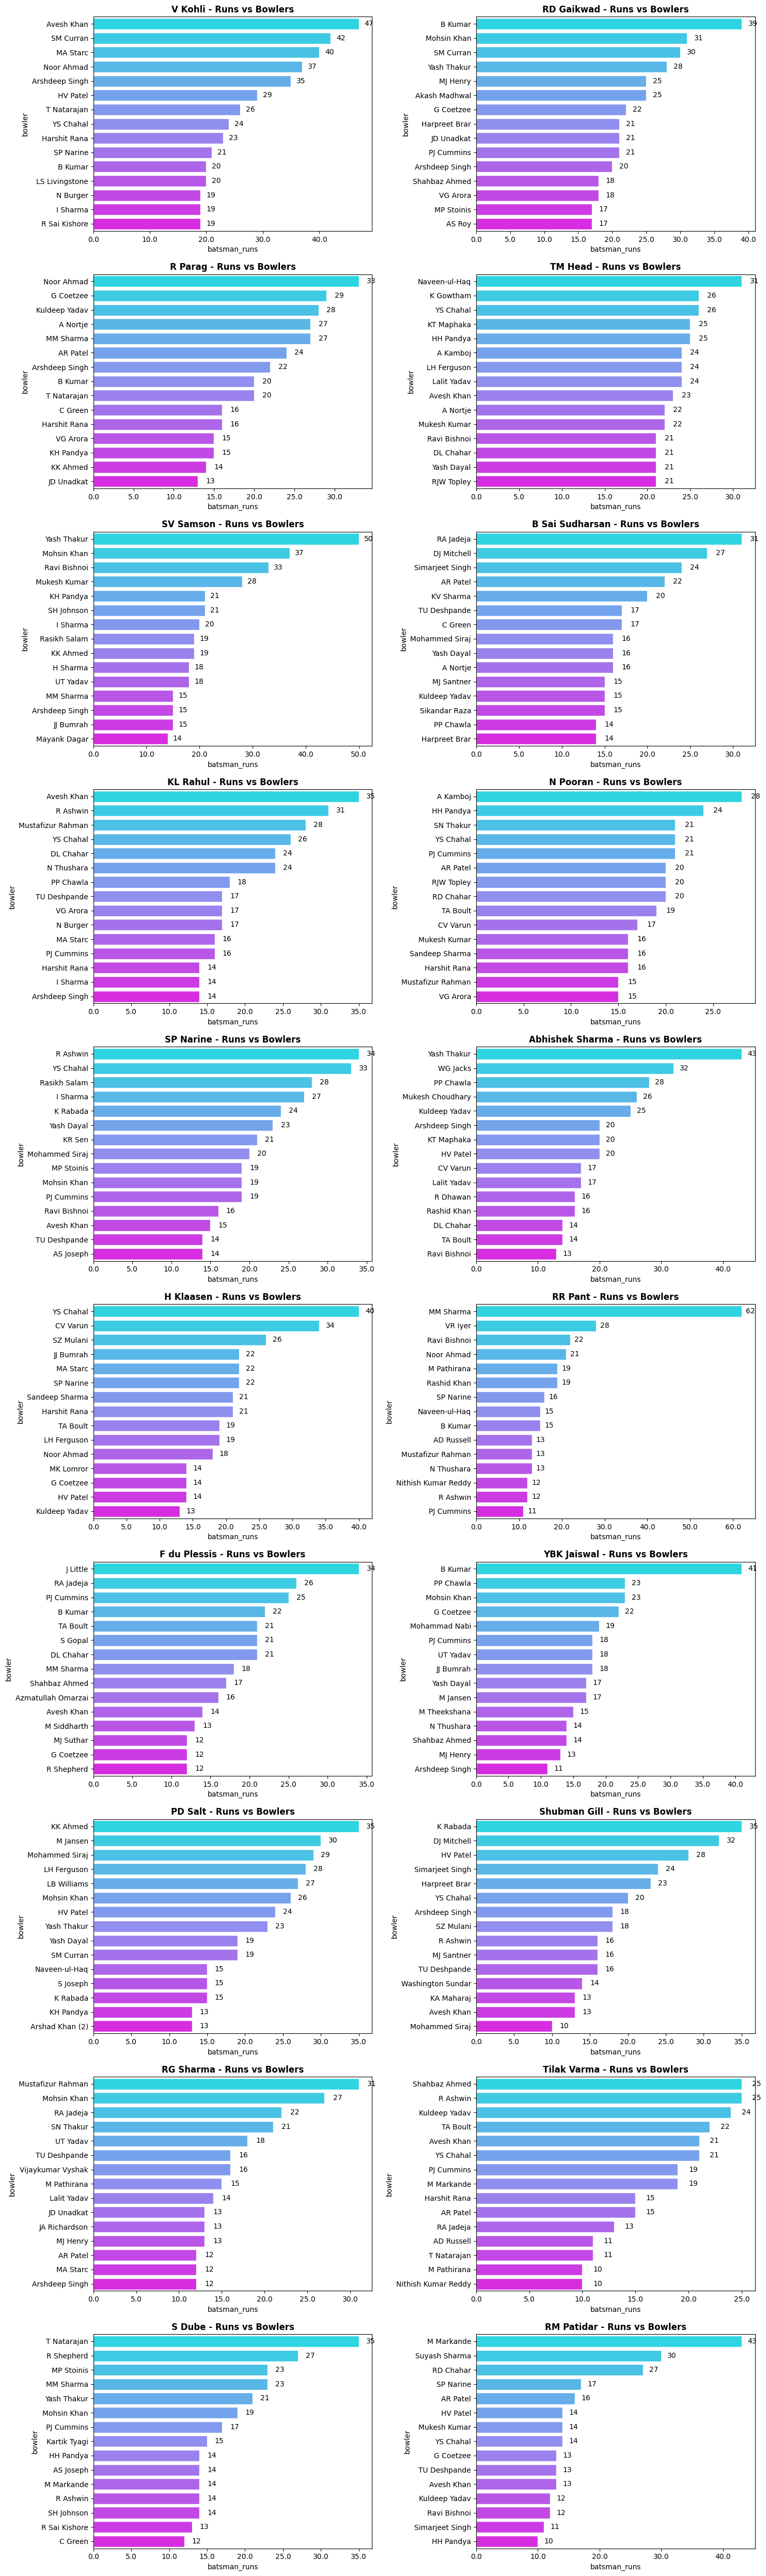

In [667]:


# Function to get runs conceded by bowlers against a batsman
def runs_conceded_by_bowler_to_batter(ipl, batter_name, start_year, end_year):
    return (
        ipl[(ipl['batter'] == batter_name) & (ipl['season'].between(start_year, end_year))]
        .groupby("bowler")["batsman_runs"]
        .sum()
        .reset_index()
        .sort_values(by="batsman_runs", ascending=False)
    )

# Function to plot subplots for the top 20 batsmen
def plot_top_batsmen_vs_bowlers(ipl, top_n=20):
    # Get the top 20 batsmen dynamically based on total runs
    top_batsmen = (
        ipl[ipl['season'] == 2024]
        .groupby('batter')['batsman_runs']
        .sum()
        .reset_index()
        .sort_values(by='batsman_runs', ascending=False)
        .head(top_n)['batter']
        .tolist()
    )

    # Create subplots: 10 rows, 2 columns
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
    axes = axes.flatten()  # Flatten axes to make it iterable

    # Set theme
    sns.set_theme(style="darkgrid")

    # Loop through each batsman and plot
    for idx, batter in enumerate(top_batsmen):
        ax = axes[idx]  # Get the current subplot
        batter_data = runs_conceded_by_bowler_to_batter(ipl, batter, 2024, 2024).head(15)

        # If no data, skip
        if batter_data.empty:
            continue

        # Barplot with color gradient
        colors = sns.color_palette("cool", len(batter_data))
        sns.barplot(data=batter_data, x="batsman_runs", y="bowler", palette=colors, ax=ax)

        # Add labels to bars
        for index, value in enumerate(batter_data["batsman_runs"]):
            ax.text(value + 1, index, str(value), va="center", fontsize=10, color="black")

        # Rotate y-axis labels
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
        ax.set_xticklabels(ax.get_xticks(), fontsize=10)

        # Set title
        ax.set_title(f"{batter} - Runs vs Bowlers", fontsize=12, fontweight="bold")

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call function to generate subplots
plot_top_batsmen_vs_bowlers(ipl)


#### How do strike rates of batters in the powerplay (overs 0-5) compare to the death overs (overs 14-19) in IPL 2024, and what insights can be drawn from their total runs and balls faced

This question aligns with your dual scatter plot visualization and encourages interpretation of the data trends.

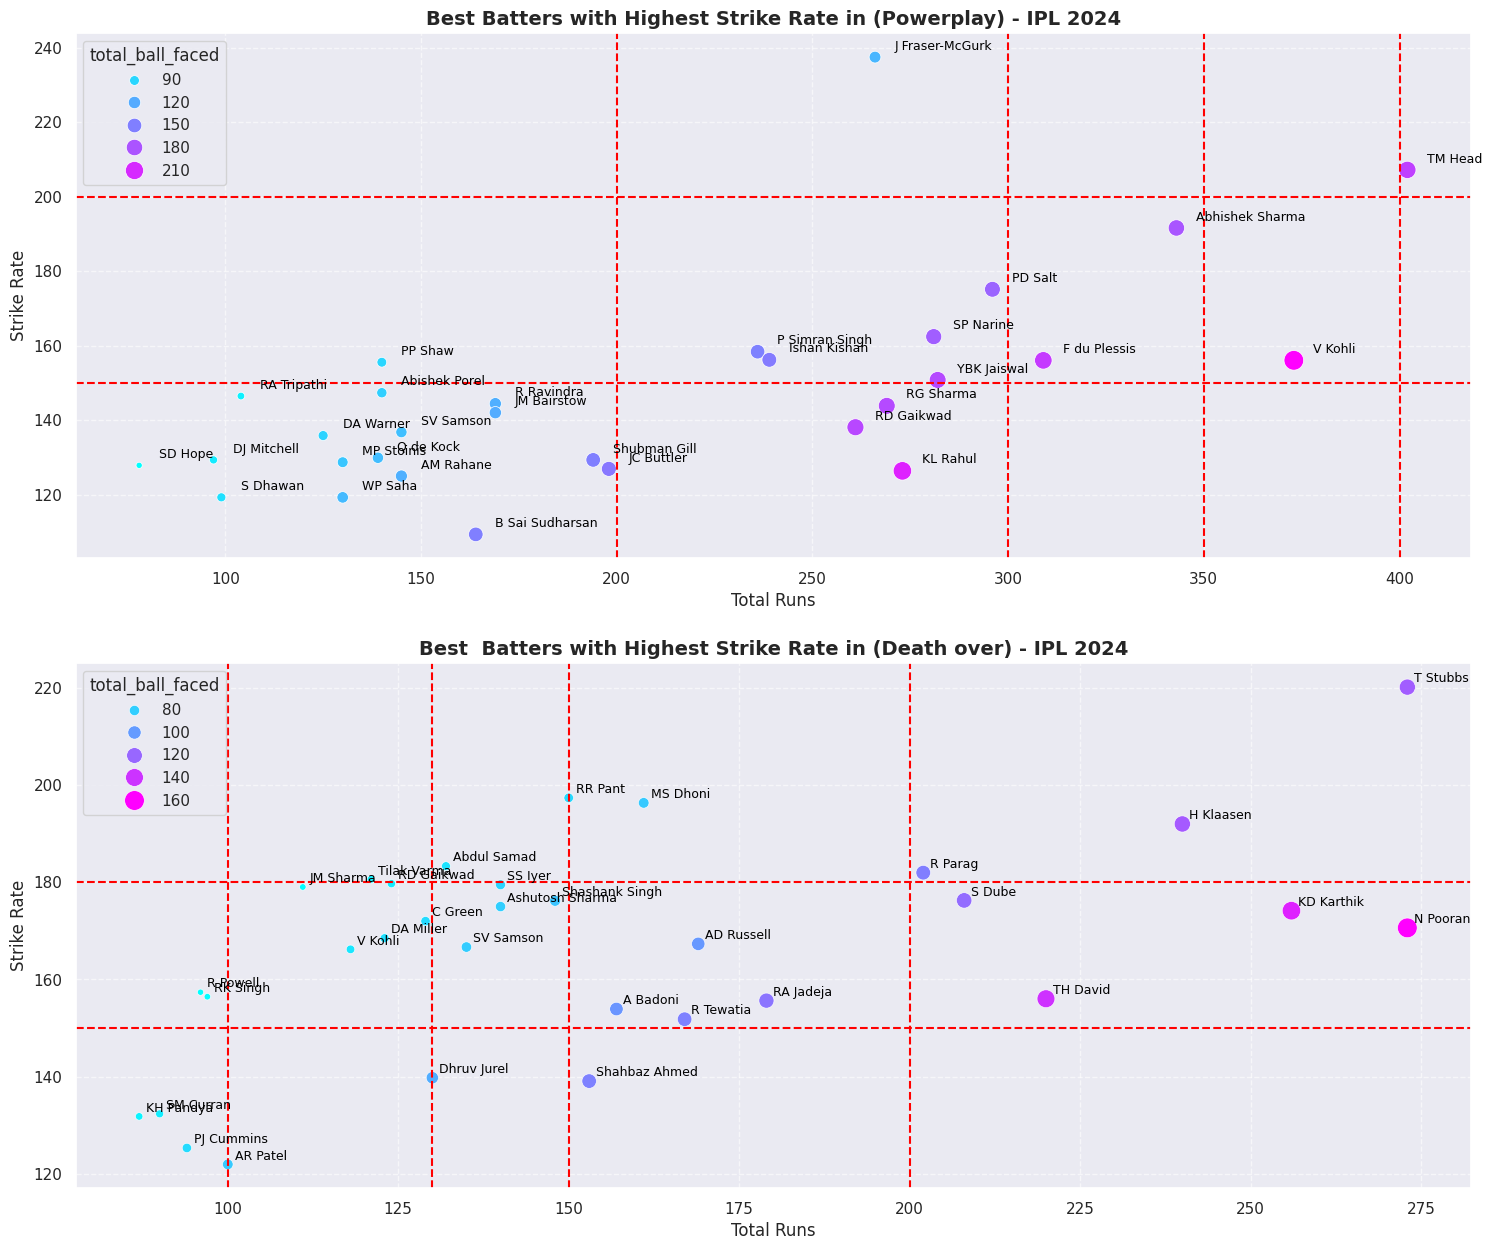

In [668]:
power_play = batsman_with_the_highest_strike_rate(ipl, 2024, 2024, 0, 5, 60).head(50)

# Create subplots
fig, axis = plt.subplots(ncols=1, nrows=2, figsize=(18, 15))  # Adjusted figure size

# Scatter plot on axis[0]
sns.scatterplot(
    data=power_play,
    x='total_runs',
    y='strike_rate',
    hue='total_ball_faced',
    palette='cool',
    size='total_ball_faced',
    sizes=(20, 200),  # Scale marker size dynamically
    ax=axis[0]
)

# Adding horizontal reference lines
axis[0].axhline(150, color='red', linestyle="--", linewidth=1.5)
axis[0].axhline(200, color='red', linestyle="--", linewidth=1.5)

# Adding vertical reference lines
for x in [200, 300, 350, 400]:
    axis[0].axvline(x, color='red', linestyle="--", linewidth=1.5)

# Annotating batter names
for i in range(len(power_play)):
    axis[0].text(
        power_play['total_runs'].iloc[i] + 5,  # Shift x slightly for better placement
        power_play['strike_rate'].iloc[i] + 2,  # Shift y slightly
        power_play['batter'].iloc[i],
        fontsize=9,
        color='black',

    )

# Set titles and labels
axis[0].set_title("Best Batters with Highest Strike Rate in (Powerplay) - IPL 2024", fontsize=14, fontweight='bold')
axis[0].set_xlabel("Total Runs", fontsize=12)
axis[0].set_ylabel("Strike Rate", fontsize=12)

# Adding grid for better readability
axis[0].grid(True, linestyle="--", alpha=0.6)


# -------------------------------------------------------------------------------------------

death_over = batsman_with_the_highest_strike_rate(ipl, 2024, 2024, 14, 19, 60).head(50)



# Scatter plot on axis[1]
sns.scatterplot(
    data=death_over,
    x='total_runs',
    y='strike_rate',
    hue='total_ball_faced',
    palette='cool',
    size='total_ball_faced',
    sizes=(20, 200),  # Scale marker size dynamically
    ax=axis[1]
)

# Adding horizontal reference lines
axis[1].axhline(150, color='red', linestyle="--", linewidth=1.5)
axis[1].axhline(180, color='red', linestyle="--", linewidth=1.5)

# Adding vertical reference lines
for x in [100, 130, 150, 200]:
    axis[1].axvline(x, color='red', linestyle="--", linewidth=1.5)

# Annotating batter names
for i in range(len(death_over)):
    axis[1].text(
        death_over['total_runs'].iloc[i] +1,  # Shift x slightly for better placement
        death_over['strike_rate'].iloc[i] +1,  # Shift y slightly
        death_over['batter'].iloc[i],
        fontsize=9,
        color='black',

    )

# Set titles and labels
axis[1].set_title("Best  Batters with Highest Strike Rate in (Death over) - IPL 2024", fontsize=14, fontweight='bold')
axis[1].set_xlabel("Total Runs", fontsize=12)
axis[1].set_ylabel("Strike Rate", fontsize=12)

# Adding grid for better readability
axis[1].grid(True, linestyle="--", alpha=0.6)


#### Which venue recorded the highest total and average runs in IPL 2024 across both innings?  how do first-inning and second-inning runs compare across venues, and which venues were more favorable for batting or chasing?

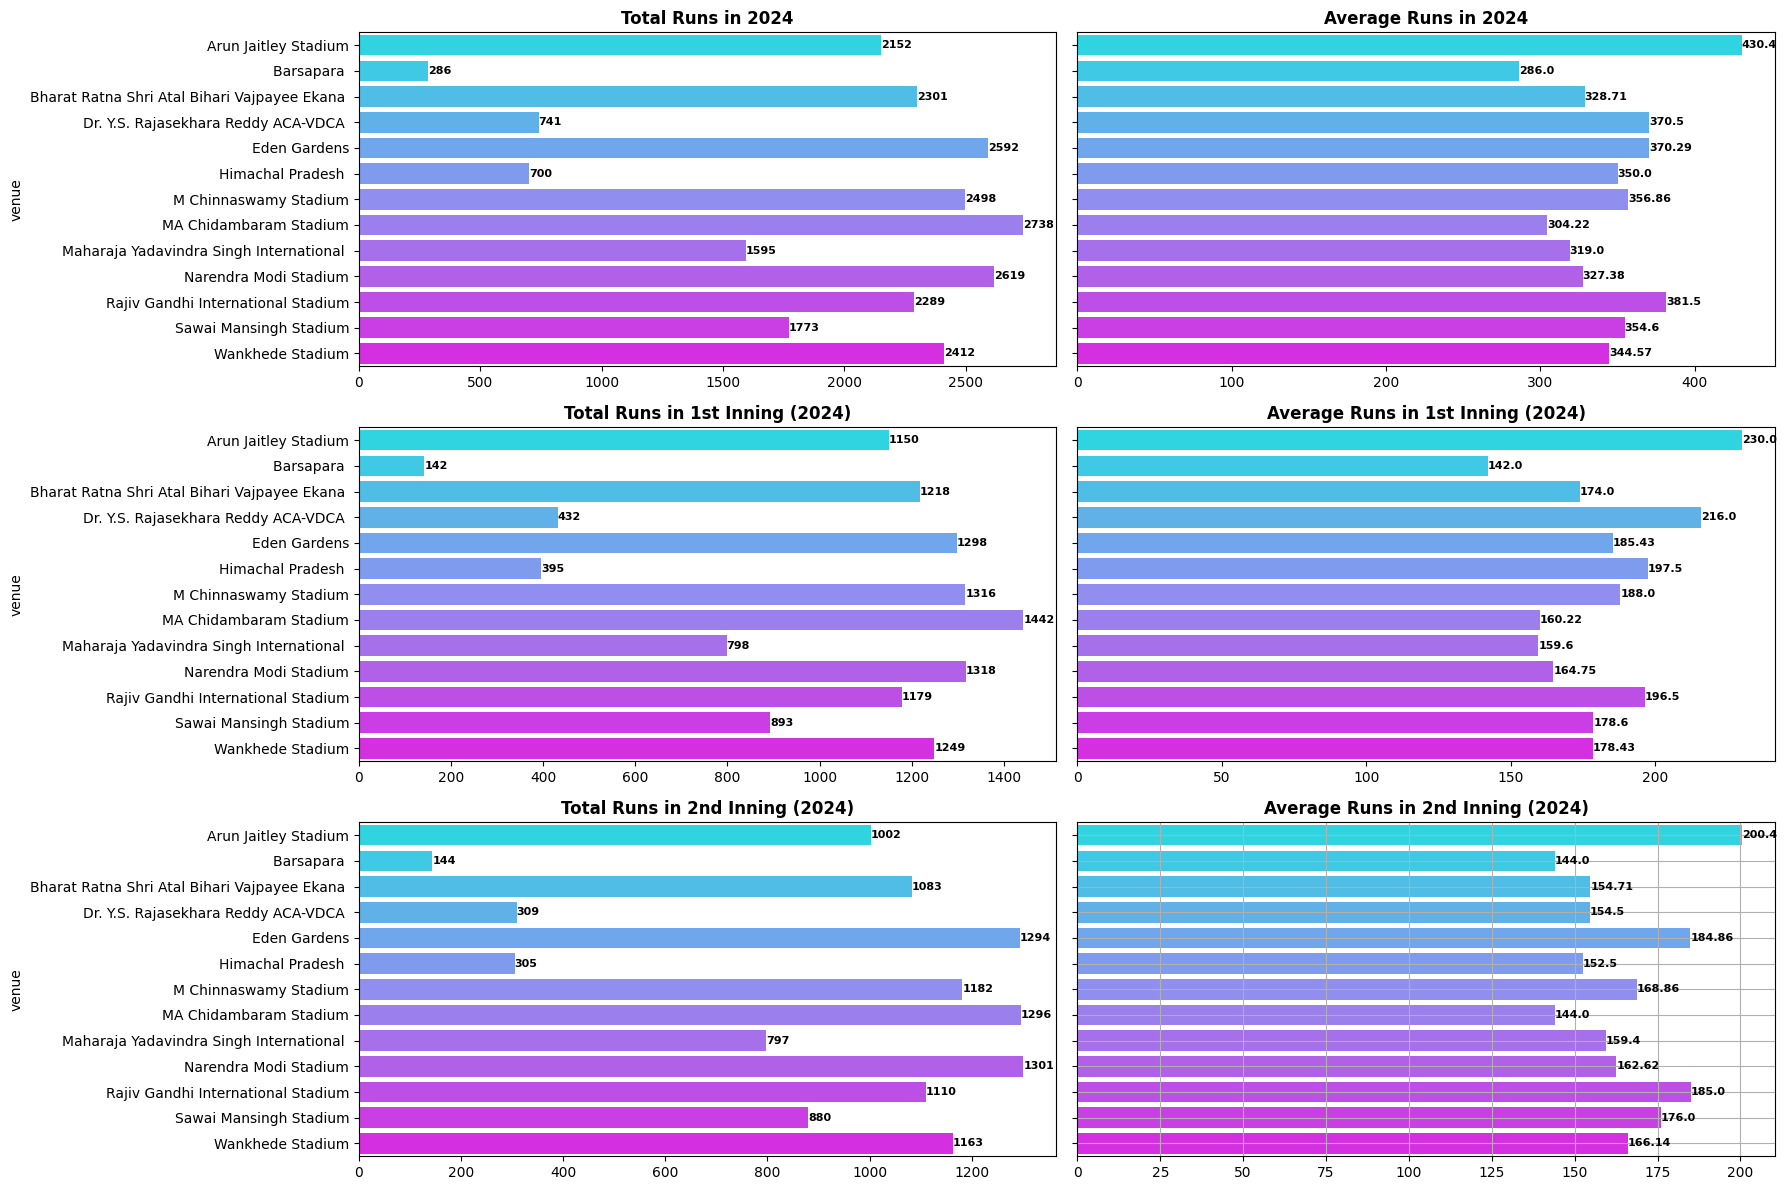

In [669]:
# Chart - 3 visualization code
data = calculate_venue_run_statistics(ipl,2024,2024)

# 1st inning data
first_inning_data = calculate_venue_run_statistics(ipl,2024,2024,1)
first_inning_data.rename(columns={'total_runs':'1st inning total','average_runs':'1st inning avg'},inplace=True)


# 2nd inning
second_inning_data = calculate_venue_run_statistics(ipl,2024,2024,2)
second_inning_data.rename(columns={'total_runs':'2nd inning total','average_runs':'2nd inning avg'},inplace=True)

final_data = data.merge(first_inning_data,on='venue').merge(second_inning_data,on='venue')
final_data['venue'] = final_data['venue'].str.split(',').str[0].str.split('Cricket').str[0]
final_data.drop(columns=['total_match_x','total_match_y'],inplace=True)

plt.style.use('default')


fig,axes = plt.subplots(ncols=2,nrows=3,figsize=(18,12),sharey=True)
axes = axes.flatten()

plot_columns = [
    ('total_runs', 'Total Runs in 2024'),
    ('average_runs', 'Average Runs in 2024'),
    ('1st inning total', 'Total Runs in 1st Inning (2024)'),
    ('1st inning avg', 'Average Runs in 1st Inning (2024)'),
    ('2nd inning total', 'Total Runs in 2nd Inning (2024)'),
    ('2nd inning avg', 'Average Runs in 2nd Inning (2024)')
]

for index,(col,title) in enumerate(plot_columns):
  sns.barplot(data=final_data,x=col,y='venue',palette='cool',ax=axes[index])

  for i,v in enumerate(final_data[col]):
    axes[index].text(v,i,str(v), va='center', fontsize=8, fontweight='bold')


  axes[index].set_title(title,fontweight='bold')
  axes[index].set_xlabel(None)
plt.tight_layout()
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### From IPL 2008 to 2024 venues witnessed the most sixes and fours?

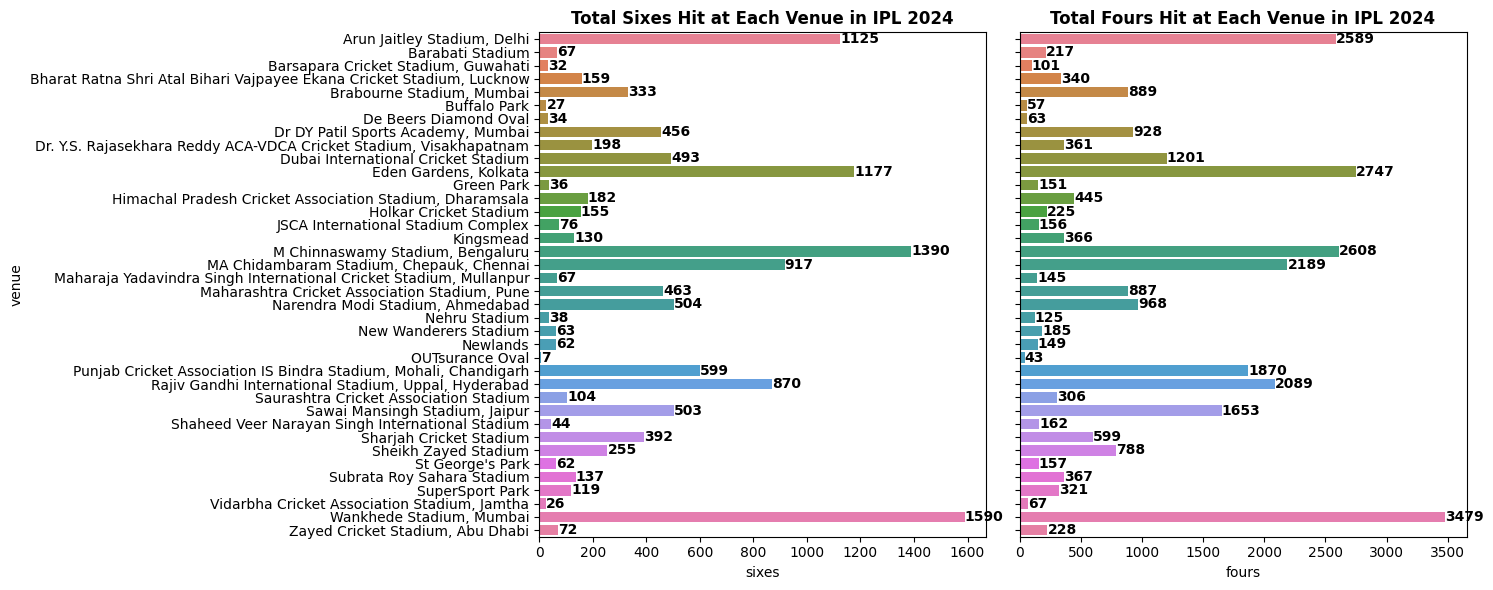

In [670]:
# Chart - 4 visualization code
sixes = ipl[ipl['total_runs'] == 6].groupby(ipl['venue']).size().reset_index(name='sixes')
fours = ipl[ipl['total_runs'] == 4].groupby(ipl['venue']).size().reset_index(name='fours')
total_match = ipl.groupby('venue')['match_id'].nunique().reset_index(name='total_match')
venue_six_four = total_match.merge(sixes,on='venue',how='left').merge(fours,on='venue',how='left')
venue_six_four

fig,axis = plt.subplots(ncols=2,nrows=1,figsize=(15,6),sharey=True)
axis= axis.flatten()


sns.barplot(data=venue_six_four,y='venue',x='sixes',ax=axis[0],hue='venue')
sns.barplot(data=venue_six_four,y='venue',x='fours',ax=axis[1],hue='venue')

for i, v in enumerate(venue_six_four['fours']):
  axis[1].text(v,i,str(v),va='center',fontsize=10, fontweight='bold')

for i, v in enumerate(venue_six_four['sixes']):
    axis[0].text(v, i, str(v), va='center', fontsize=10, fontweight='bold')

axis[0].set_title("Total Sixes Hit at Each Venue in IPL 2024", fontweight='bold')
axis[1].set_title("Total Fours Hit at Each Venue in IPL 2024", fontweight='bold')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

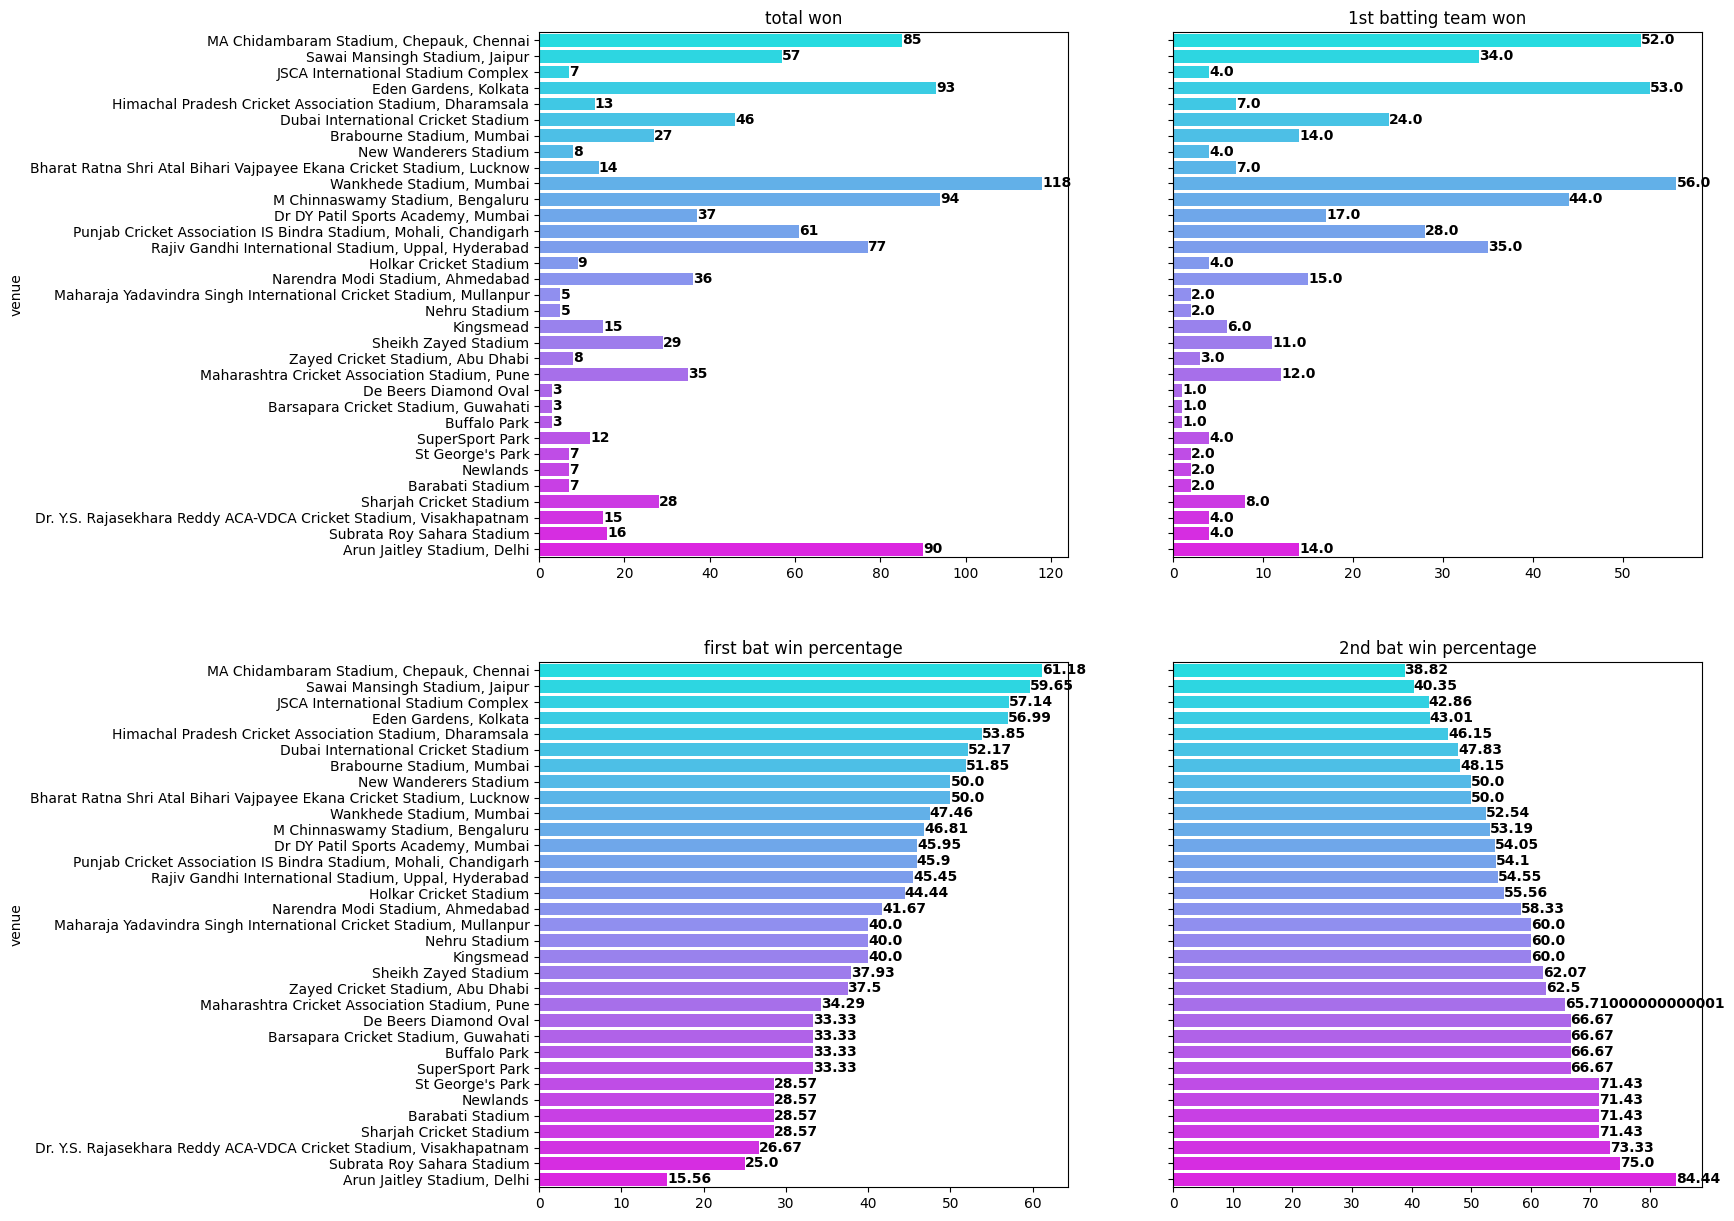

In [671]:
# Chart - 5 visualization code

total_bat_win = ipl[(ipl['winner']== ipl['team1']) & (ipl['inning']==1)].groupby('venue')['match_id'].nunique().reset_index(name='batting_won_total')
total_win_venue = ipl.groupby('venue')['match_id'].nunique().reset_index(name='total_won')

winning_per_venue = pd.merge(total_bat_win,total_win_venue,on='venue',how='right')
winning_per_venue['first_bat_win_percent'] = ((winning_per_venue['batting_won_total']/winning_per_venue['total_won']) * 100).round(2)
winning_per_venue['second_bat_win_percent'] = 100 - winning_per_venue['first_bat_win_percent']
winning_per_venue.sort_values(by='first_bat_win_percent',ascending=False,inplace=True)
winning_per_venue
fig,axis = plt.subplots(ncols=2,nrows=2,figsize=(15,15),sharey=True)
axis=axis.flatten()

sns.barplot(data=winning_per_venue.head(33),x='total_won',y='venue',palette='cool',ax=axis[0])
sns.barplot(data=winning_per_venue.head(33),x='batting_won_total',y='venue',palette='cool',ax=axis[1])
sns.barplot(data=winning_per_venue.head(33),x='first_bat_win_percent',y='venue',palette='cool',ax=axis[2])
sns.barplot(data=winning_per_venue.head(33),x='second_bat_win_percent',y='venue',palette='cool',ax=axis[3])

for i,v in enumerate(winning_per_venue['total_won'].head(33)):
  axis[0].text(v,i,v,va='center',fontsize=10, fontweight='bold')

for i,v in enumerate(winning_per_venue['batting_won_total'].head(33)):
  axis[1].text(v,i,v,va='center',fontsize=10, fontweight='bold')

for i,v in enumerate(winning_per_venue['first_bat_win_percent'].head(33)):
  axis[2].text(v,i,v,va='center',fontsize=10, fontweight='bold')

for i,v in enumerate(winning_per_venue['second_bat_win_percent'].head(33)):
  axis[3].text(v,i,v,va='center',fontsize=10, fontweight='bold')

for i in range(4):
  axis[i].set_xlabel(None)

for i,v in enumerate(['total won','1st batting team won','first bat win percentage','2nd bat win percentage']):
  axis[i].set_title(v)

plt.show()

#### Chart - 6

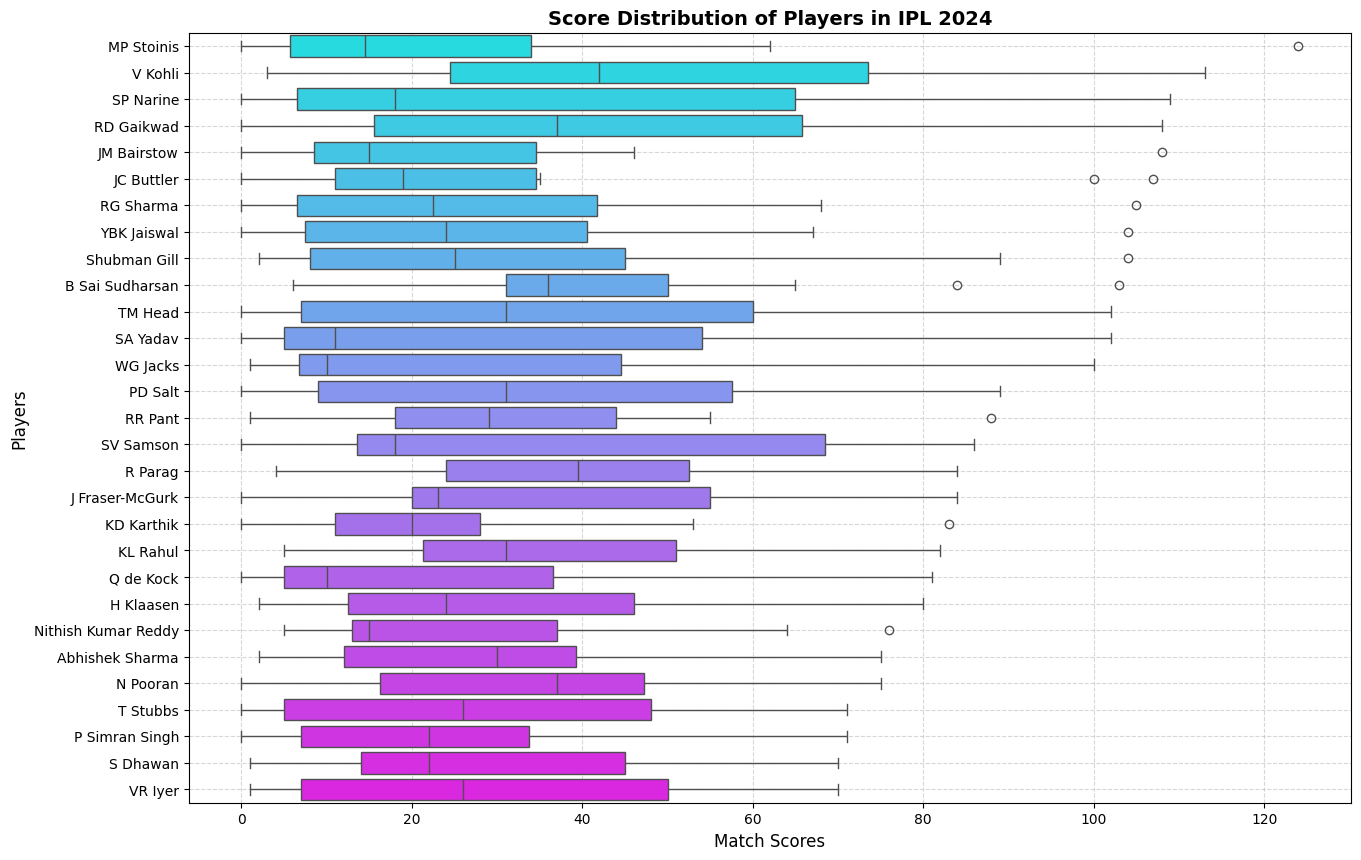

In [672]:
# Chart - 6 visualization code
top_20_batter_name = top_scorer_batsman_by_years(ipl,2024).head(50)['batter'].unique()



player_score =  top_scorer_batsman_by_years(ipl,2024)
player_score = player_score[player_score['batter'].isin(top_20_batter_name)]

# Plot Box Plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=player_score, x='best_score', y='batter', palette='cool')

plt.title("Score Distribution of Players in IPL 2024", fontsize=14, fontweight='bold')
plt.xlabel("Match Scores", fontsize=12)
plt.ylabel("Players", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


#### Chart - 7

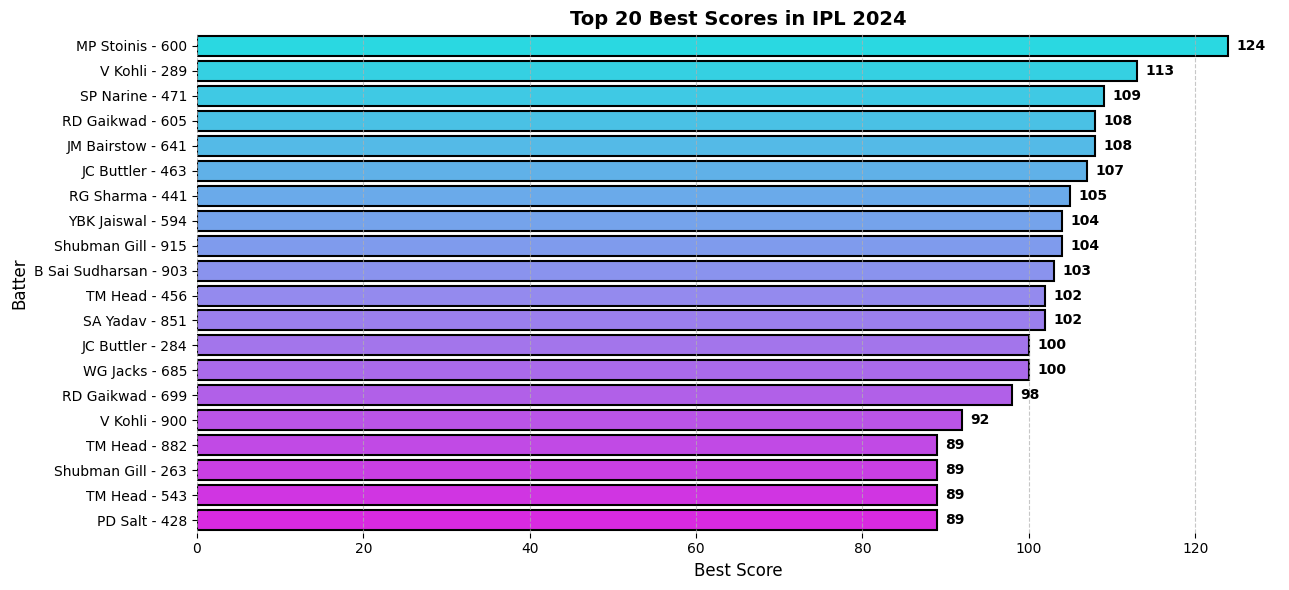

In [673]:

# Get top batters' scores
top_bat_score = top_scorer_batsman_by_years(ipl, 2024).head(20)

# Create a unique identifier for duplicate names
top_bat_score['unique_batter'] = top_bat_score['batter'] + ' - ' + top_bat_score.index.astype(str)

# Set figure size
plt.figure(figsize=(13, 6))

# Create a bar plot
sns.barplot(
    data=top_bat_score,
    x='best_score',
    y='unique_batter',
    palette='cool',  # More visually appealing color scheme
    edgecolor='black',  # Adds contrast to bars
    linewidth=1.5
)

# Add data labels on bars
for i, v in enumerate(top_bat_score['best_score']):
    plt.text(v + 1, i, str(v), va='center', fontsize=10, fontweight='bold', color='black')

# Customize plot aesthetics
plt.title("Top 20 Best Scores in IPL 2024", fontsize=14, fontweight='bold')
plt.xlabel("Best Score", fontsize=12)
plt.ylabel("Batter", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Subtle grid for readability
sns.despine(left=True, bottom=True)  # Removes unnecessary borders for a clean look

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Which batter showed the most improvement or decline in performance between 2020 and 2024

<ipython-input-674-e1276f678991>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['season'] = final_data['season'].astype('str')


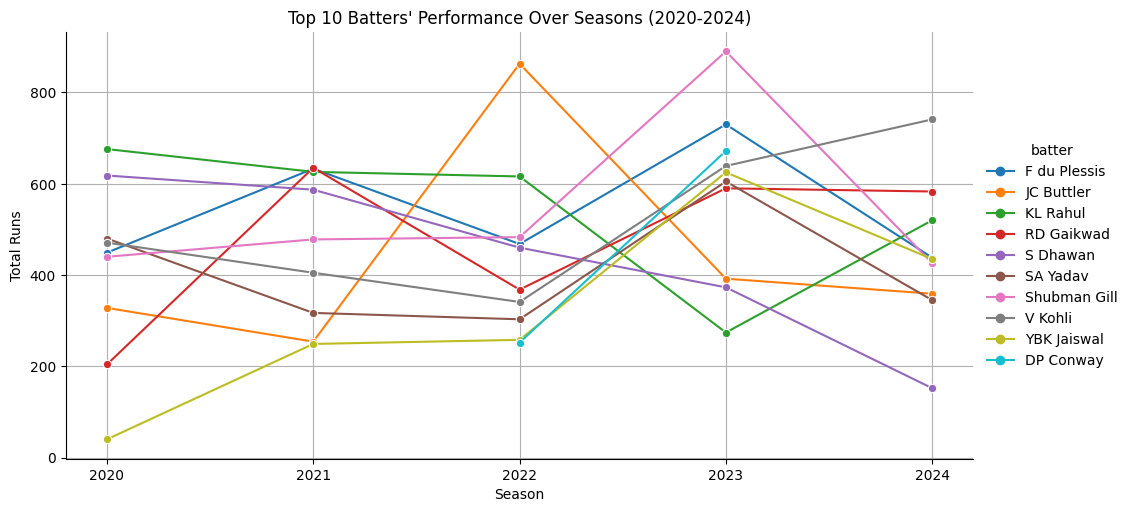

In [674]:
batter_data = (
    ipl[ipl['season'].between(2020,2024)].groupby(['season','batter'])['batsman_runs'].sum().reset_index()
)
batter_data

batter_name = (
    ipl[ipl['season'].between(2020,2024)].groupby(['season','batter'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False)['batter'].head(15)
)
batter_name

final_data = batter_data[batter_data['batter'].isin(batter_name)]
final_data['season'] = final_data['season'].astype('str')

sns.relplot(data=final_data,x='season',y='batsman_runs',hue='batter',kind='line',aspect=2, marker="o")
plt.title("Top 10 Batters' Performance Over Seasons (2020-2024)")
plt.xlabel("Season")
plt.ylabel("Total Runs")

plt.grid(True)
plt.show()

#### How has the economy rate of each IPL team evolved across different seasons, and which teams have shown the most improvement or decline over time

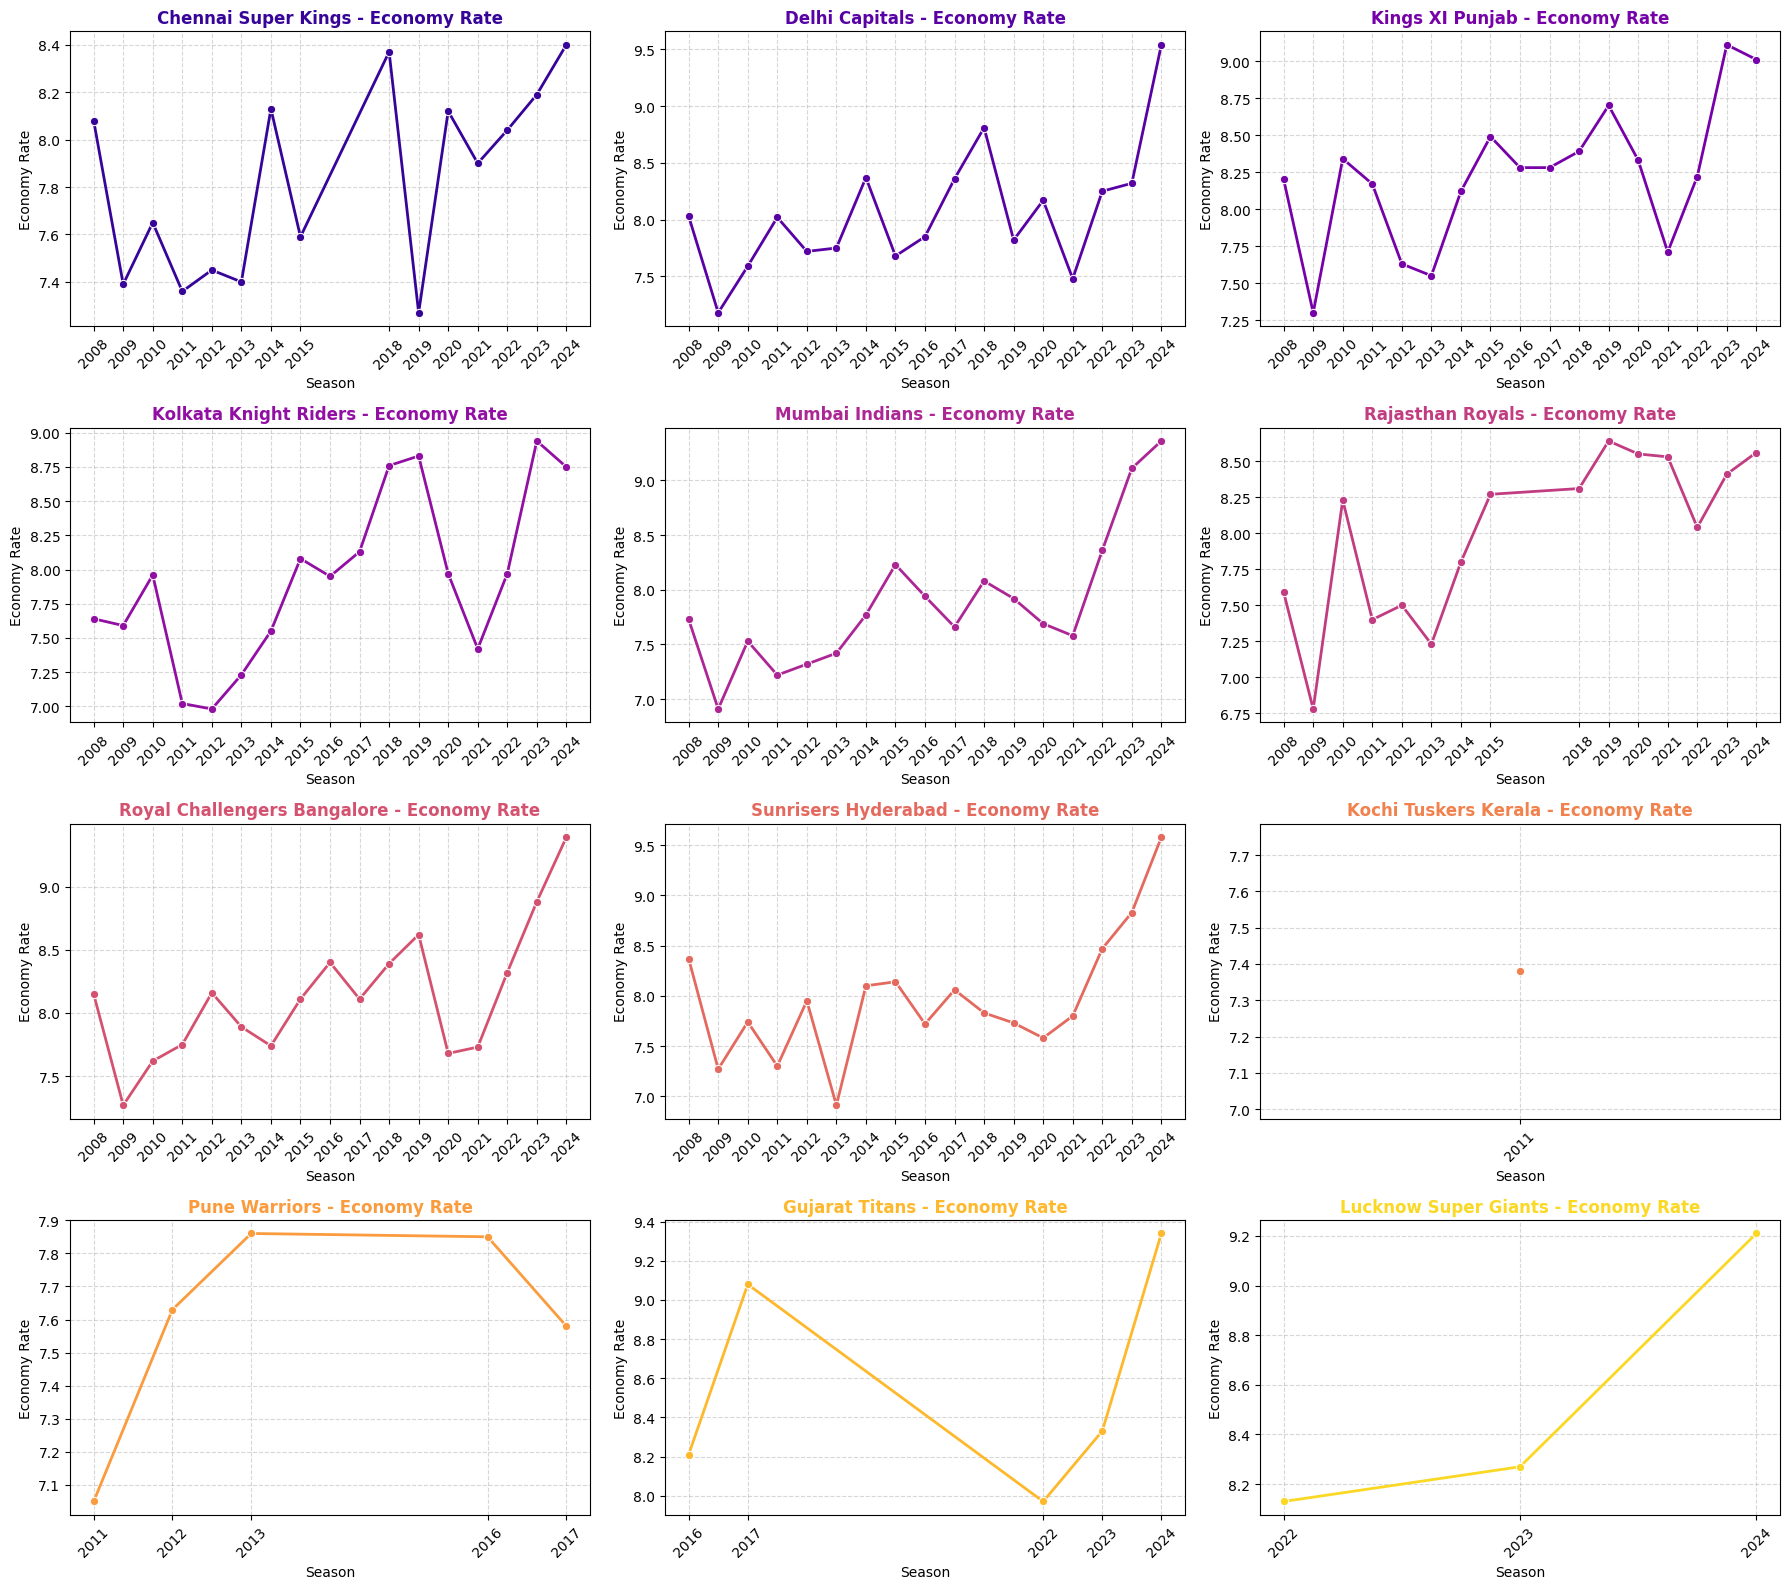

In [675]:

# Aggregate total runs conceded and total balls bowled by each bowling team per season
filter_data = ipl.groupby(['season', 'bowling_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_ball=('match_id', 'count')  # Counting deliveries bowled
).reset_index()

# Calculate the economy rate for each team
filter_data['economy'] = ((filter_data['total_runs'] / filter_data['total_ball']) * 6).round(2)

# Get unique teams dynamically
teams = filter_data['bowling_team'].unique()
num_teams = len(teams)


# Generate a color palette with as many colors as there are teams
colors = sns.color_palette("plasma", num_teams)  # Using "tab10" for distinct colors

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 4 * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each team's economy rate in its own subplot
for i, (team, color) in enumerate(zip(teams, colors)):
    team_df = filter_data[filter_data['bowling_team'] == team]

    sns.lineplot(data=team_df, x='season', y='economy', marker='o', ax=axes[i], color=color, linewidth=2)

    axes[i].set_title(f"{team} - Economy Rate", fontsize=12, fontweight='bold', color=color)
    axes[i].set_xlabel("Season", fontsize=10)
    axes[i].set_ylabel("Economy Rate", fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].set_xticks(team_df['season'].unique())
    axes[i].set_xticklabels(team_df['season'].unique(), rotation=45)


plt.tight_layout()
plt.show()


# **Conclusion**

# **🏏 Final Conclusion on IPL 2024 Bowling Performance 🏏**  

This analysis highlights the **top-performing bowlers** across different match phases (Powerplay, Death Overs) and key rivalries between bowlers and batsmen. Additionally, it explores the impact of **venue conditions** on bowling effectiveness.  

---

## **1️⃣ Powerplay Bowling Analysis (Overs 0-6) 📊**  

### **Most Effective Bowlers**  
- **1st Inning:**  
  - 🏆 **Trent Boult (9 wickets)** – Lethal swing bowler, consistently dismissed openers.  
  - 🏆 **Mitchell Starc (7 wickets)** – Used early pace and movement to his advantage.  
  - **Sandeep Sharma, N Thushara, and Arshdeep Singh (5 wickets each)** – Effective in picking wickets inside the powerplay.  

- **2nd Inning:**  
  - 🏆 **Bhuvneshwar Kumar & Pat Cummins (6 wickets each)** – Both highly skilled at controlling new-ball movement.  
  - **Ishant Sharma & Yash Dayal (5 wickets each)** – Made crucial breakthroughs in run chases.  

### **Venue Impact on Powerplay**  
- **Wankhede & Chinnaswamy Stadiums**: High-scoring venues, bowlers with accurate line and length (Bhuvneshwar, Boult) succeeded.  
- **Chepauk & Narendra Modi Stadiums**: Spinners like **Chahal & Bishnoi** controlled the powerplay with tight spells.  
- **Eden Gardens**: Pacers benefitted from extra bounce, favoring aggressive bowlers like Starc & Harshit Rana.  

🔹 **Insight:** Swing bowlers were highly effective in the first six overs, especially in venues with grass or moisture assisting movement.  

---

## **2️⃣ Death Overs Specialists (Overs 16-20) 🎯**  

### **Best Wicket-Takers in the Final Overs**  
- **1st Inning:**  
  - 🏆 **Harshal Patel (17 wickets)** – Mastered slow deliveries and yorkers.  
  - 🏆 **Jasprit Bumrah (11 wickets)** – Consistent death-over specialist.  
  - **Avesh Khan (10 wickets), Arshdeep Singh (9 wickets), TU Deshpande & Sandeep Sharma (8 wickets each)**.  

- **2nd Inning:**  
  - 🏆 **Mukesh Kumar (8 wickets)** – Excelled under pressure while defending totals.  
  - 🏆 **T Natarajan, Mohammed Siraj, & Harshit Rana (7 wickets each)** – Skilled at executing yorkers.  
  - **G Coetzee, Mitchell Starc, & Yash Thakur (6 wickets each)** – Used pace variations effectively.  

### **Venue Impact on Death Overs**  
- **Chinnaswamy Stadium (Bangalore)**: Short boundaries resulted in high death-over economy; bowlers like Bumrah & T Natarajan relied on precise execution.  
- **Chepauk Stadium (Chennai)**: Slower pitch favored spinners and cutters in the death overs.  
- **Narendra Modi Stadium (Ahmedabad)**: Pace-friendly conditions helped Siraj and Natarajan with reverse swing.  

🔹 **Insight:** Death-over specialists who mastered yorkers and slow deliveries proved to be the most effective across different conditions.  

---

## **3️⃣ Repeat Dismissals (Bowler vs. Batter Rivalries) 🔥**  

### **Bowlers Who Dismissed the Same Batter Multiple Times (2020-2024)**  
- 🏆 **Yuzvendra Chahal vs. Mayank Agarwal (5 dismissals)** – Chahal’s variations consistently troubled Agarwal.  
- 🏆 **Deepak Chahar vs. Shubman Gill (5 dismissals)** – Used swing and seam to remove Gill multiple times.  
- **Ravi Bishnoi vs. Ishan Kishan & Suryakumar Yadav (4 times each)** – Bishnoi’s googlies troubled Mumbai Indians batters.  
- **Mohammed Siraj vs. Prithvi Shaw (4 times)** – Used pace and movement effectively.  
- **Kagiso Rabada vs. KL Rahul (4 times)** – Express pace forced mistakes from Rahul.  
- **Rashid Khan vs. Shikhar Dhawan (4 times)** – Leg-spin and variations led to multiple dismissals.  

🔹 **Insight:** Certain bowlers have developed psychological advantages over key batsmen, using well-planned strategies to dismiss them repeatedly.  

---

## **4️⃣ Virat Kohli vs. Bowlers in IPL 2024 👑**  

### **Bowlers Against Whom Kohli Scored the Most Runs**  
- 🏆 **Avesh Khan (47 runs conceded)** – Kohli dominated him with aggressive stroke play.  
- 🏆 **Sam Curran (42 runs conceded)** – Took advantage of Curran’s medium pace.  
- **Mitchell Starc (40 runs), Noor Ahmad (37 runs), Arshdeep Singh (35 runs)** – Kohli handled top-quality pacers and spinners effectively.  

### **Venue Impact on Kohli’s Performance**  
- **Chinnaswamy Stadium (Bangalore):** His best performances came here, using short boundaries to score freely.  
- **Eden Gardens (Kolkata):** Struggled against extra bounce from pacers.  
- **Chepauk Stadium (Chennai):** Used sweep shots effectively against spinners.  

🔹 **Insight:** Kohli adapted well to different conditions but was particularly dominant against medium pacers and left-arm spinners.  

---

## **📌 Final Takeaways & Strategic Recommendations**  

✅ **Powerplay bowling success depended on swing-friendly conditions**, with Boult and Starc leading the charts.  
✅ **Death-over specialists like Harshal Patel and Bumrah were game-changers**, executing yorkers and slower deliveries to perfection.  
✅ **Spinners (Chahal, Bishnoi, Rashid Khan) played a key role in restricting runs & dismissing top-order batters.**  
✅ **Some bowlers had a psychological edge over certain batsmen**, repeatedly dismissing them in crucial moments.  
✅ **Virat Kohli performed best against medium pacers and left-arm spinners, adapting to various match situations.**  
✅ **Venue conditions had a significant impact on bowling effectiveness**, with different pitches favoring swing, spin, or pace.  

🔥 **For IPL 2025, teams must prioritize a balanced bowling attack with early powerplay wicket-takers, death-over specialists, and spinners who can control the middle overs.**  

🏆 **Strong bowling strategies remain the key to IPL success!** 🏆
